In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import MDAnalysis as mda
import MDAnalysis.analysis.pca as pca
from MDAnalysis import Universe
from MDAnalysis.analysis.align import _fit_to
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale
from io import StringIO
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn import datasets

/Users/kwangilkim/anaconda3/envs/scrapping/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. 물 공급한날, 물공급하지않은날

## 산점도

In [4]:
## 4. 산점도 그래프
def visualize_feed_scatter(base_file_name):
    ##R 값에 대해 반복문을 수행
    ##CSV 파일에서 비오는 날과 먹이를 준 날의 데이터를 읽음
    df = pd.read_csv(f'./concatraw_12/extracted_watered_{base_file_name}.csv')
    df_feed = pd.read_csv(f'./concatraw_12/extracted_unwatered_{base_file_name}.csv')

    ##날짜와 값을 추출
    x = df['date'].values
    y = df['Raw'].values
    X = df_feed['date'].values
    Y = df_feed['Raw'].values

    ##평균 계산
    mean_y = round(sum(y)/len(y))
    mean_Y = round(sum(Y)/len(Y))

    ##새로운 그래프 생성
    plt.figure(figsize=(4,4))

    ##산점도의 원의 반지름
    circle_radius = 12

    ##큰 원으로 평균 값을 표시 (현재 4개 기준임)
    plt.scatter([2, 7], [mean_y, mean_Y], s=circle_radius*1000, color='blue', alpha=0.2)

    ##생목과 고사목 데이터를 그림
    plt.scatter(x,y, alpha=1.0, c='green', label='watered')
    plt.scatter(X,Y, alpha=1.0, c='red', label='unwatered')

    ##y축 범위 설정
    plt.ylim(mean_y-150, mean_Y+150)

    ##제목 및 라벨 설정
    plt.title(f'Differences in sensor values when waterd\n{base_file_name}')
    plt.xlabel('date')
    plt.ylabel('Raw')

    ##x축 라벨 회전
    plt.xticks(rotation=45)
    ##그리드 추가
    plt.grid()
    ##범례 추가
    plt.legend()
    ##그래프 출력
    plt.show()


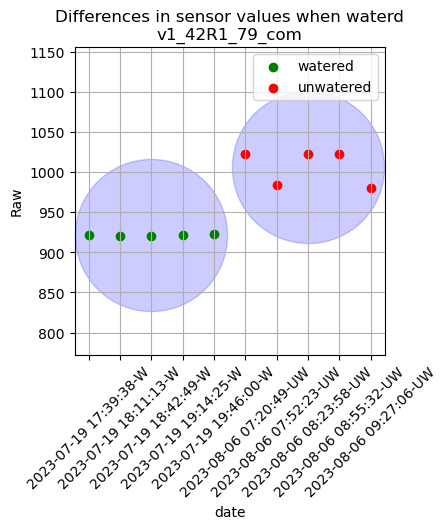

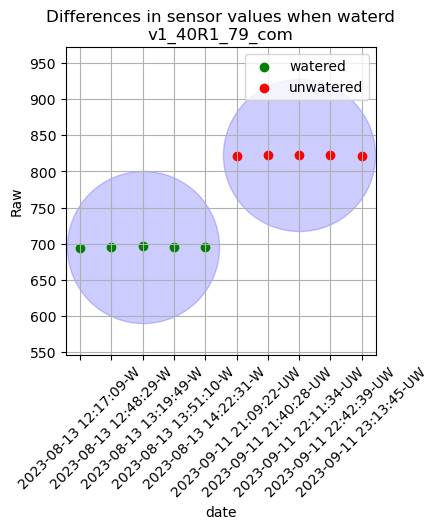

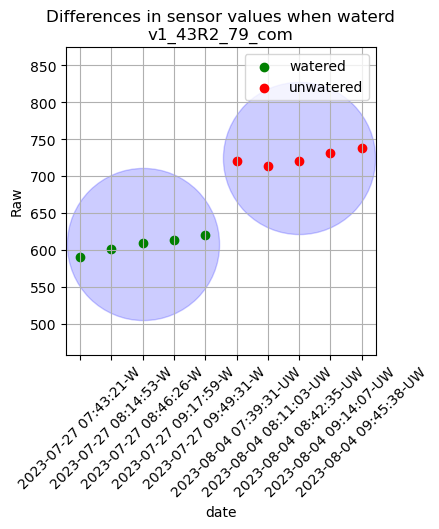

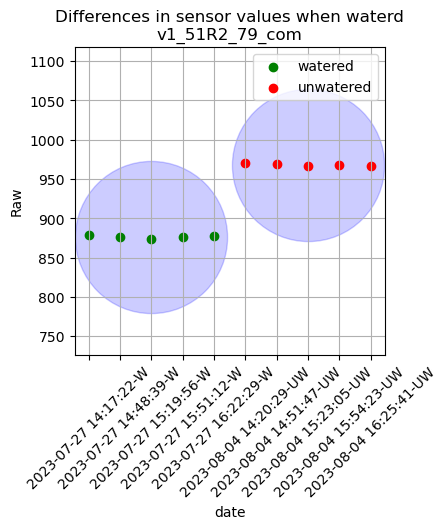

In [5]:
visualize_feed_scatter('v1_42R1_79_com')
visualize_feed_scatter('v1_40R1_79_com')
visualize_feed_scatter('v1_43R2_79_com')
visualize_feed_scatter('v1_51R2_79_com')

## 주성분 분석

### PCA

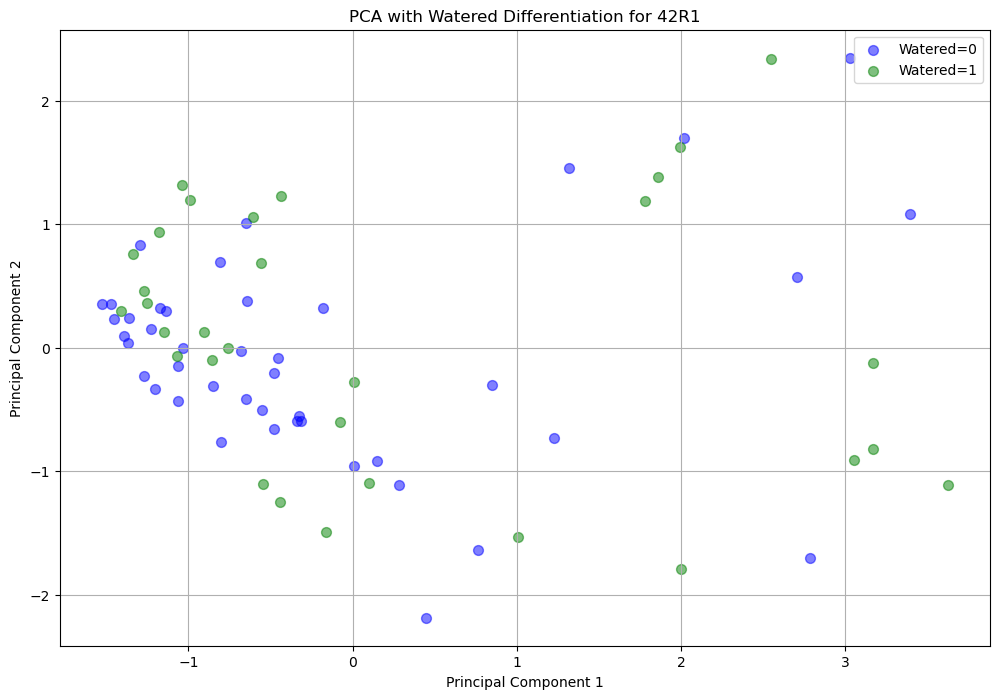

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/perday_42R1_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)
# 결측치를 선형으로 보간
df1 = df1.interpolate(method='linear')

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA with Watered Differentiation for 42R1')

# watered 값에 따른 색상 지정
colors = {0: 'b', 1: 'g'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=50, 
               label=f'Watered={watered}')

ax.legend()
ax.grid()
plt.show()


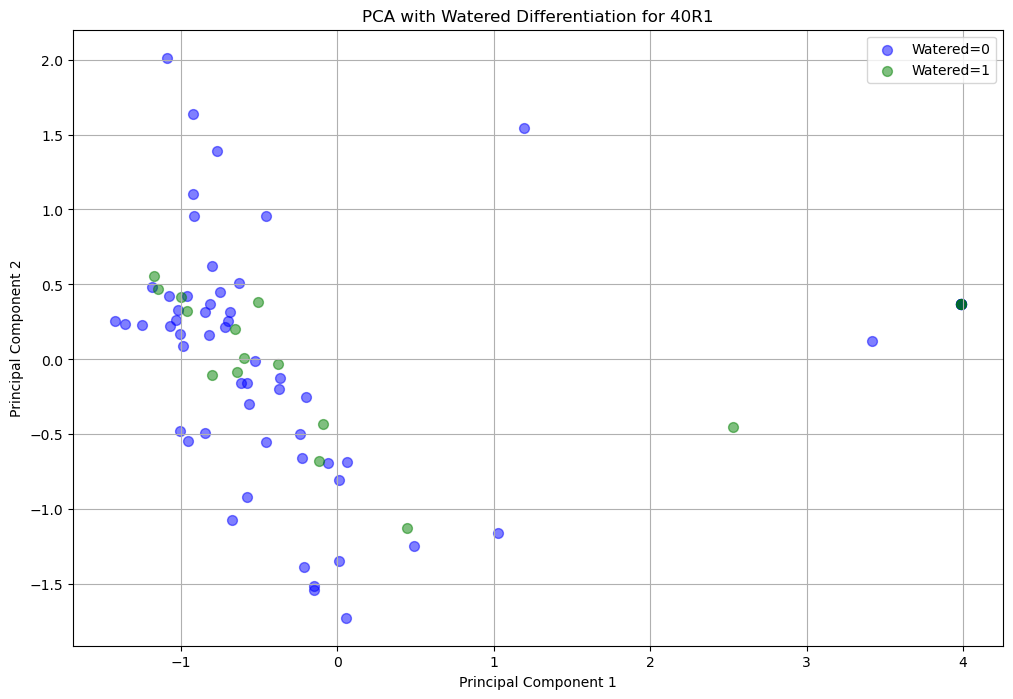

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/perday_40R1_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)
# 결측치를 선형으로 보간
df1 = df1.interpolate(method='linear')

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA with Watered Differentiation for 40R1')

# watered 값에 따른 색상 지정
colors = {0: 'b', 1: 'g'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=50, 
               label=f'Watered={watered}')

ax.legend()
ax.grid()
plt.show()


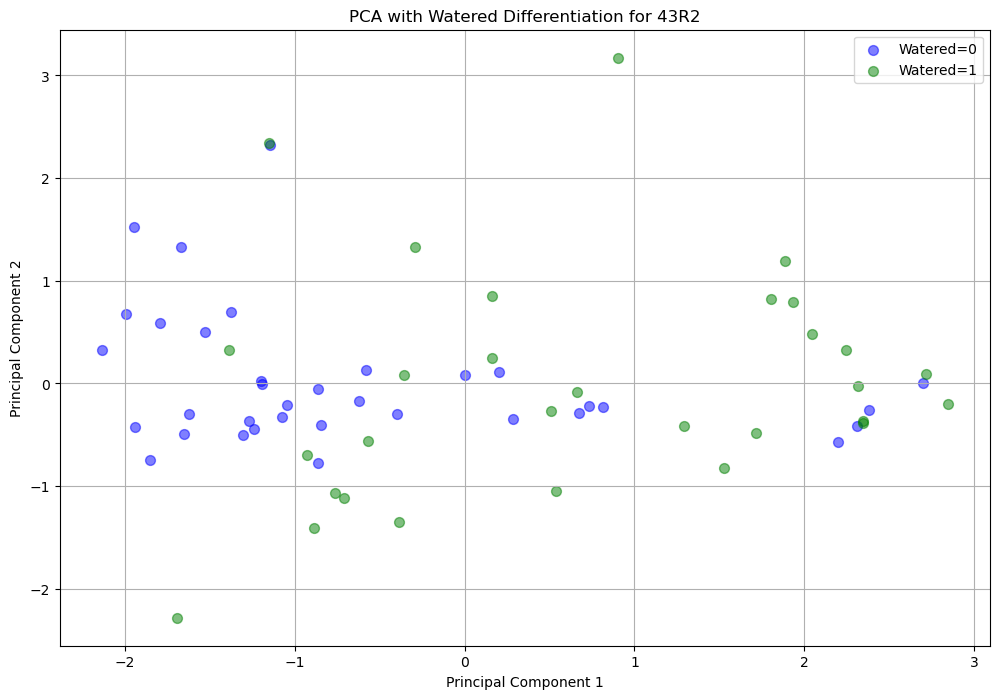

In [309]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/perday_43R2_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)
# 결측치를 선형으로 보간
df1 = df1.interpolate(method='linear')

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA with Watered Differentiation for 43R2')

# watered 값에 따른 색상 지정
colors = {0: 'b', 1: 'g'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=50, 
               label=f'Watered={watered}')

ax.legend()
ax.grid()
plt.show()


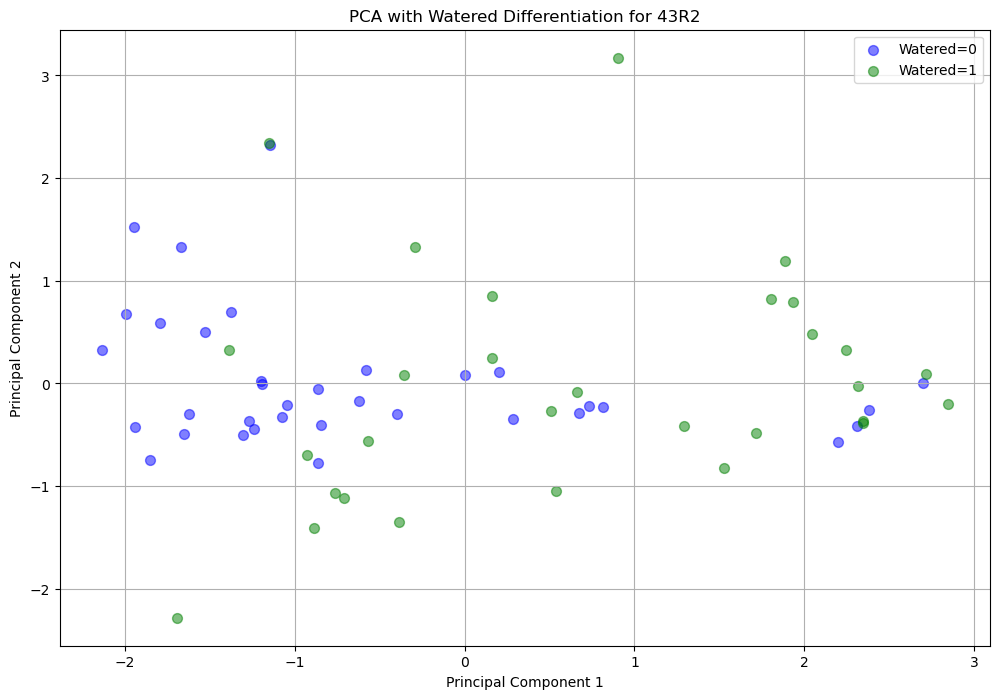

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/perday_43R2_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)
# 결측치를 선형으로 보간
df1 = df1.interpolate(method='linear')

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA with Watered Differentiation for 43R2')

# watered 값에 따른 색상 지정
colors = {0: 'b', 1: 'g'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=50, 
               label=f'Watered={watered}')

ax.legend()
ax.grid()
plt.show()


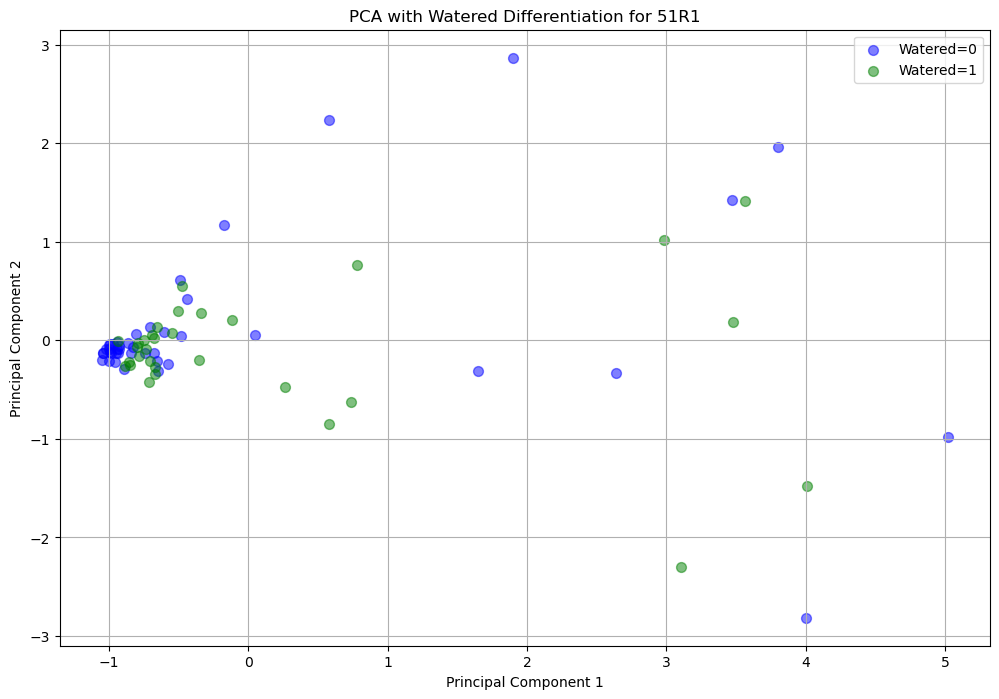

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/perday_51R1_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)
# 결측치를 선형으로 보간
df1 = df1.interpolate(method='linear')

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA with Watered Differentiation for 51R1')

# watered 값에 따른 색상 지정
colors = {0: 'b', 1: 'g'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=50, 
               label=f'Watered={watered}')

ax.legend()
ax.grid()
plt.show()


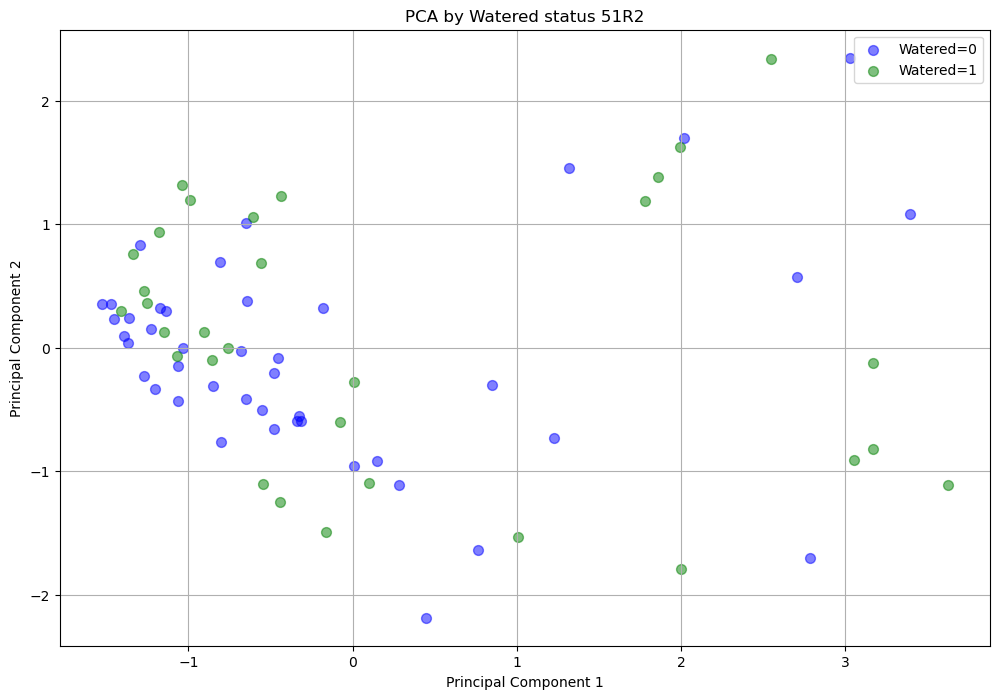

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/perday_51R2_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)
# 결측치를 선형으로 보간
df1 = df1.interpolate(method='linear')

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA by Watered status 51R2')

# watered 값에 따른 색상 지정
colors = {0: 'b', 1: 'g'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=50, 
               label=f'Watered={watered}')

ax.legend()
ax.grid()
plt.show()


### MDA

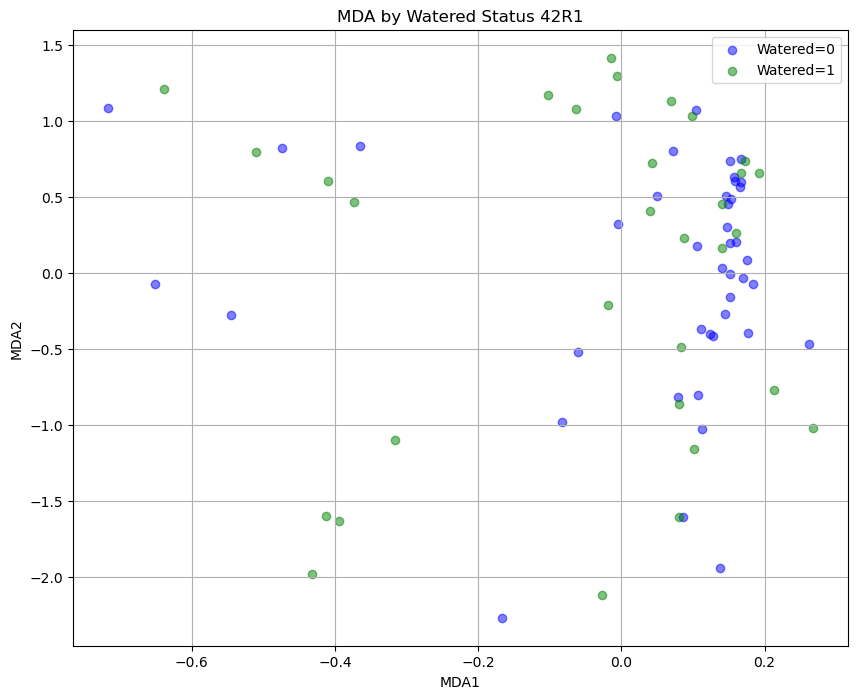

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/perday_42R1_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['b', 'g']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Watered=0', 'Watered=1']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('MDA by Watered Status 42R1')
plt.legend()
plt.show()

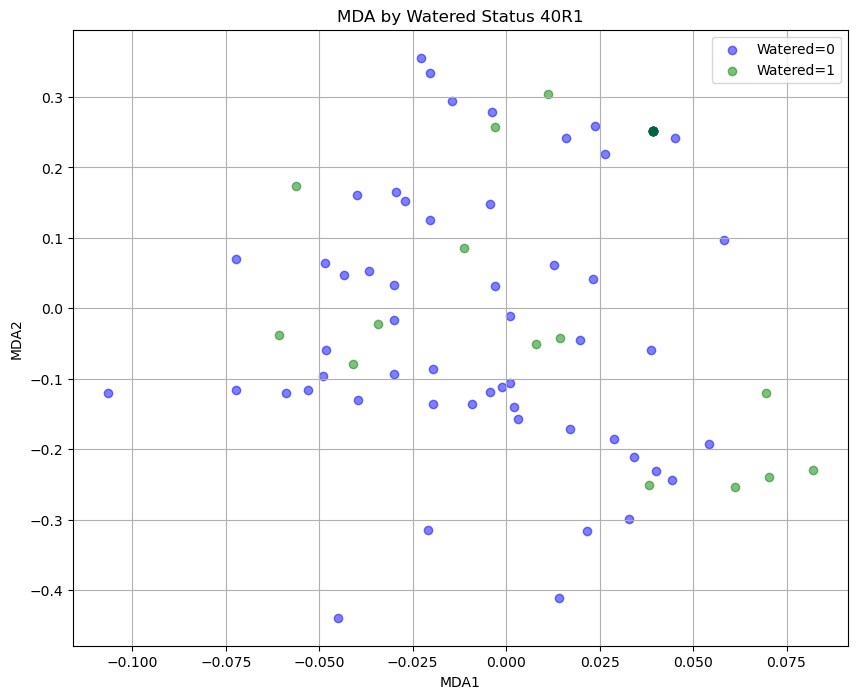

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/perday_40R1_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['b', 'g']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Watered=0', 'Watered=1']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('MDA by Watered Status 40R1')
plt.legend()
plt.show()

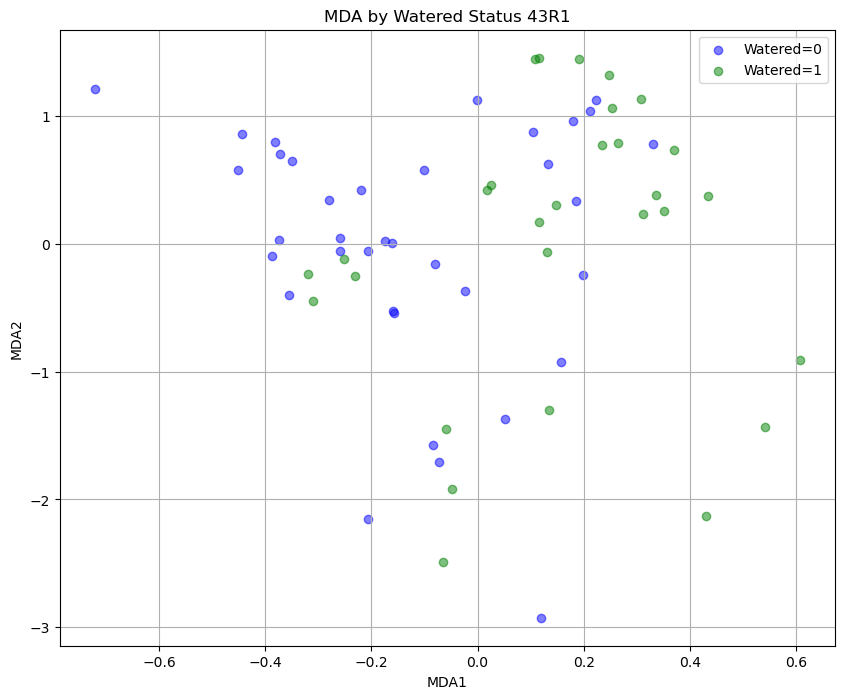

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/perday_43R1_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['b', 'g']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Watered=0', 'Watered=1']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('MDA by Watered Status 43R1')
plt.legend()
plt.show()

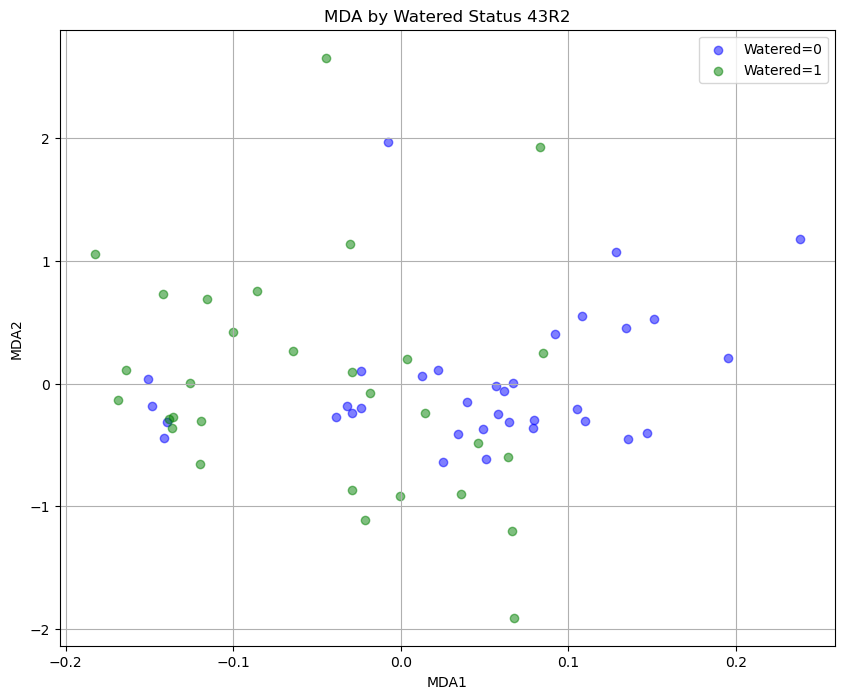

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/perday_43R2_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['b', 'g']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Watered=0', 'Watered=1']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('MDA by Watered Status 43R2')
plt.legend()
plt.show()

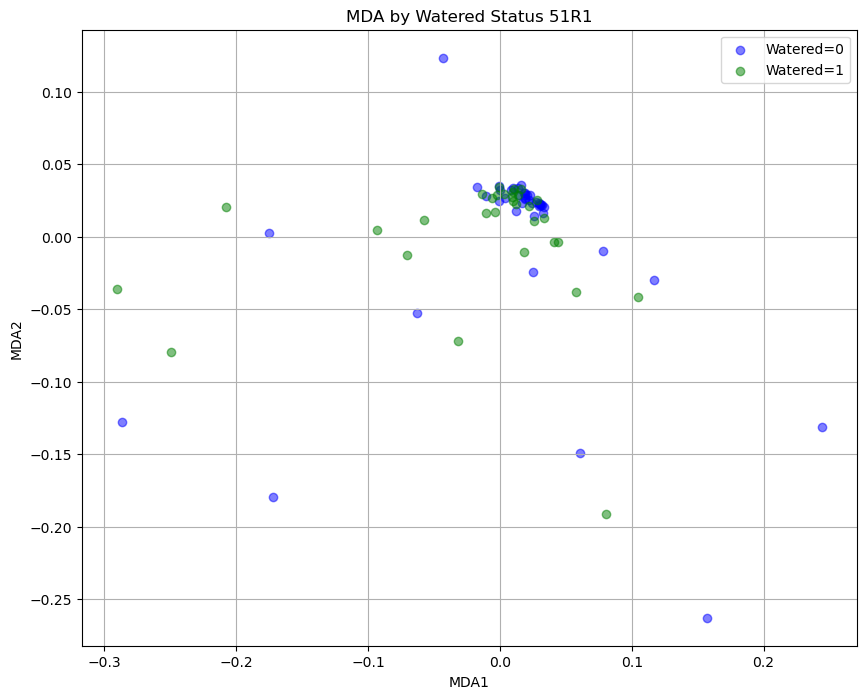

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/perday_51R1_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['b', 'g']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Watered=0', 'Watered=1']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('MDA by Watered Status 51R1')
plt.legend()
plt.show()

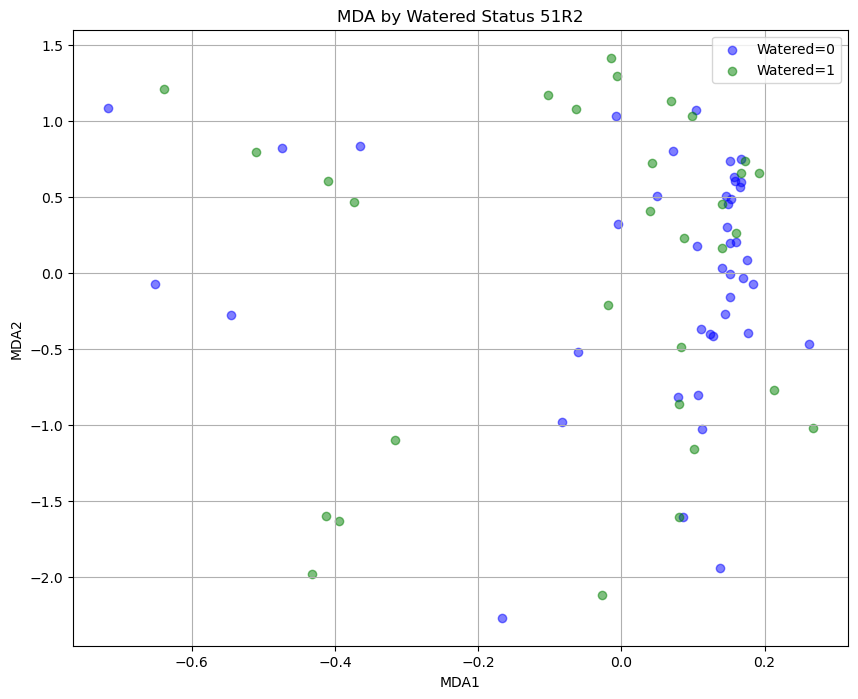

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/perday_51R2_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['b', 'g']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Watered=0', 'Watered=1']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('MDA by Watered Status 51R2')
plt.legend()
plt.show()

### U-map

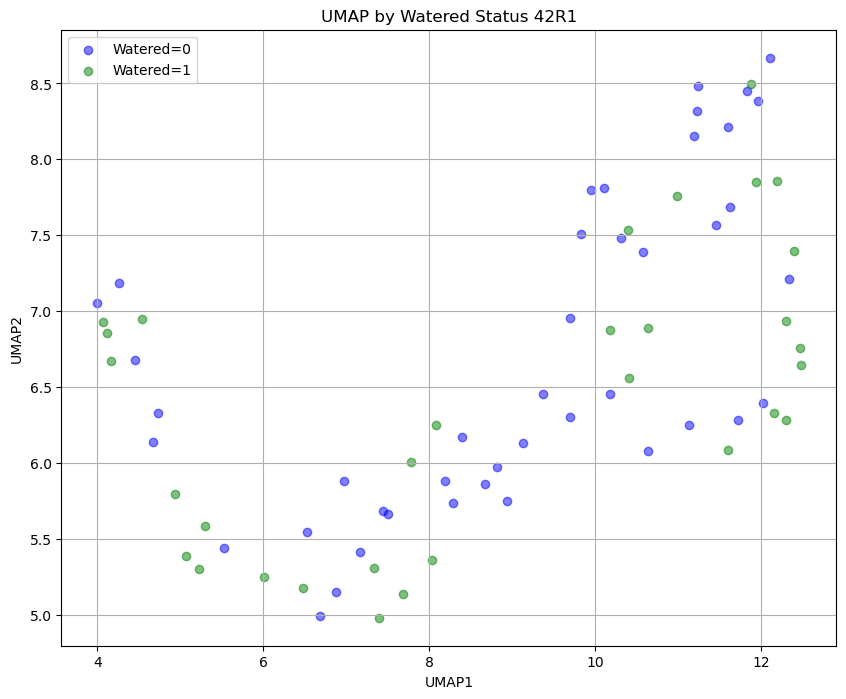

In [33]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/perday_42R1_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP by Watered Status 42R1')
plt.legend()
plt.show()


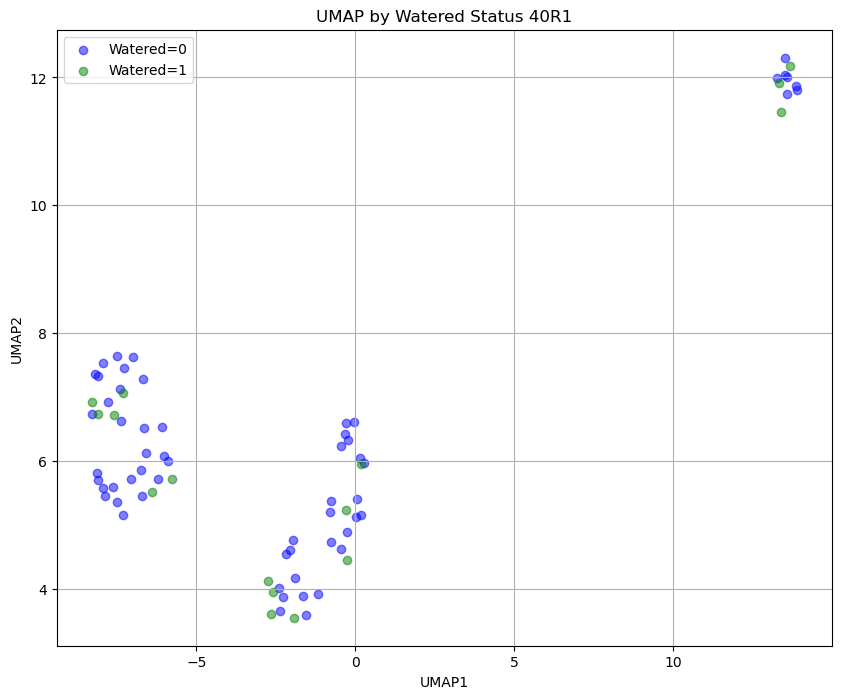

In [34]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/perday_40R1_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP by Watered Status 40R1')
plt.legend()
plt.show()


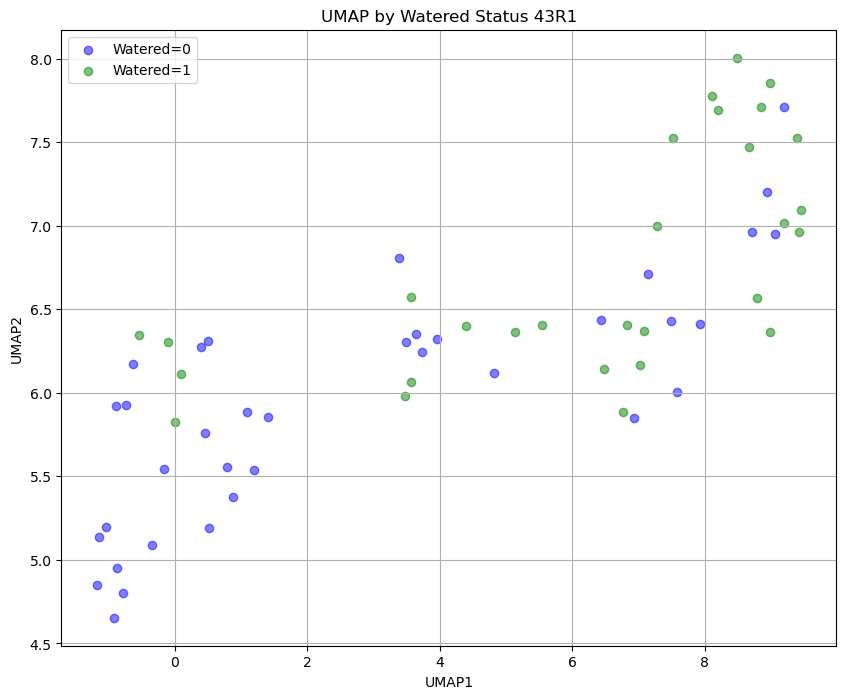

In [35]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/perday_43R1_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP by Watered Status 43R1')
plt.legend()
plt.show()


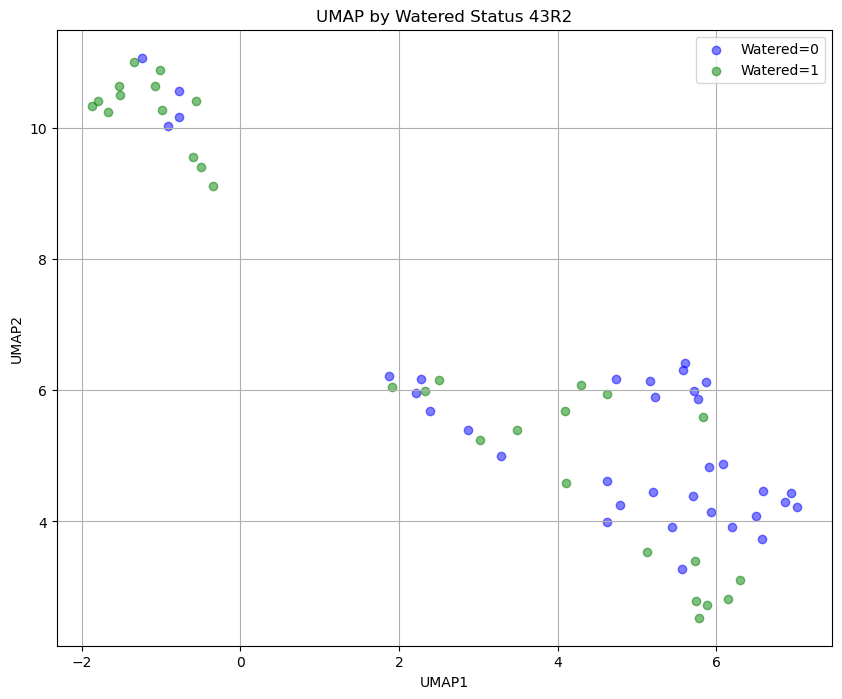

In [36]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/perday_43R2_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP by Watered Status 43R2')
plt.legend()
plt.show()


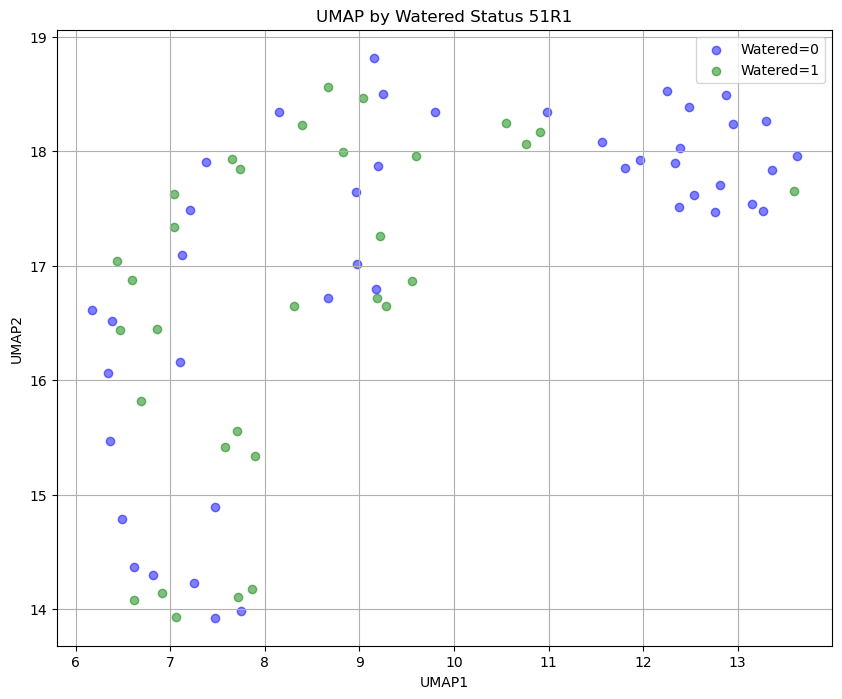

In [37]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/perday_51R1_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP by Watered Status 51R1')
plt.legend()
plt.show()


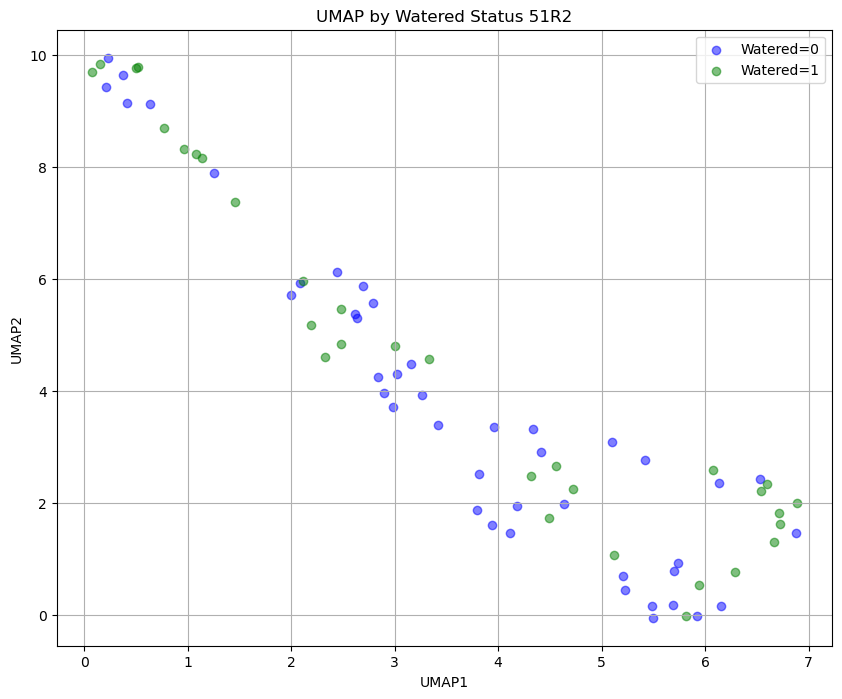

In [38]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/perday_51R2_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP by Watered Status 51R2')
plt.legend()
plt.show()


### T-sne

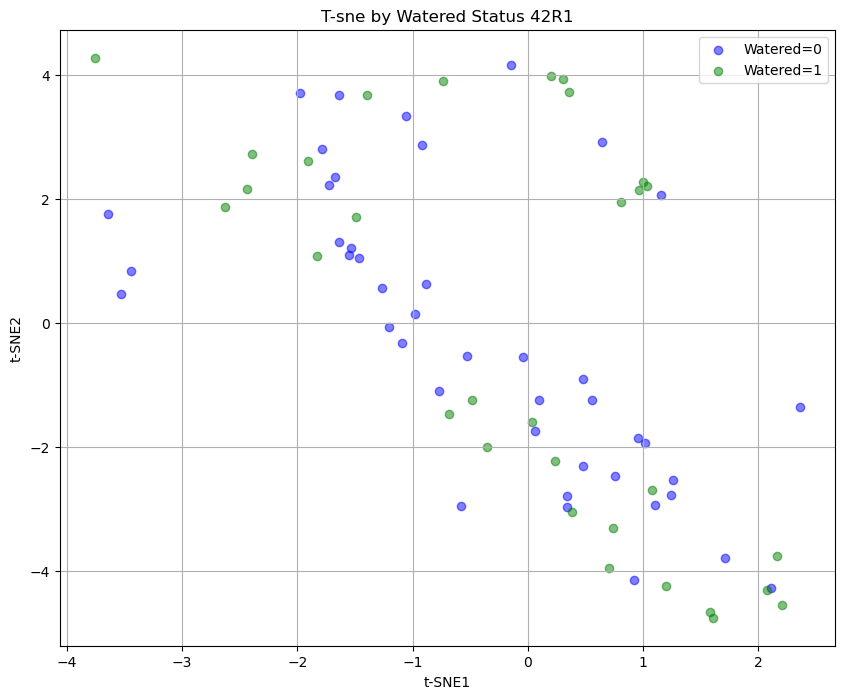

In [46]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/perday_42R1_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status 42R1')
plt.legend()
plt.show()


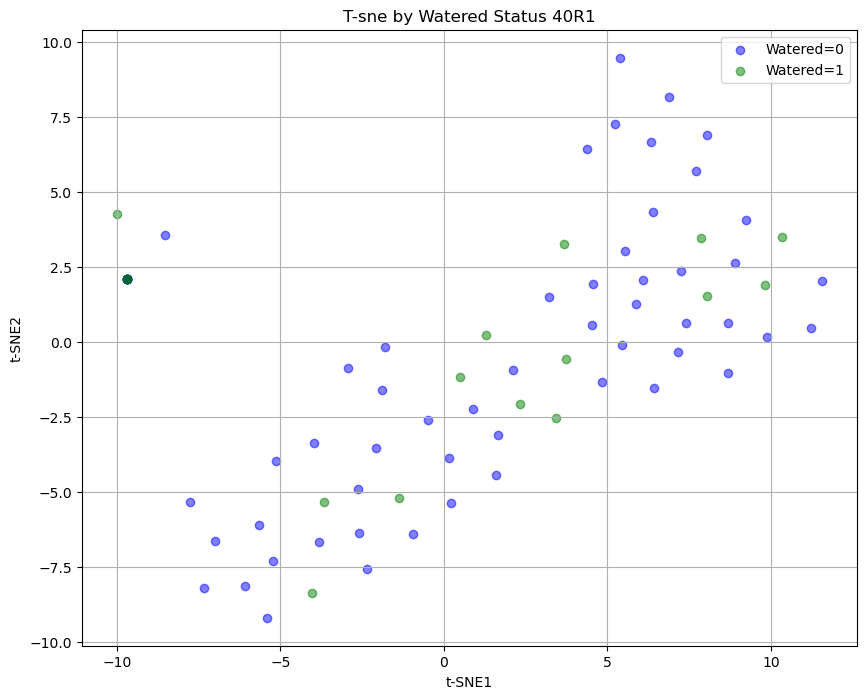

In [47]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/perday_40R1_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status 40R1')
plt.legend()
plt.show()


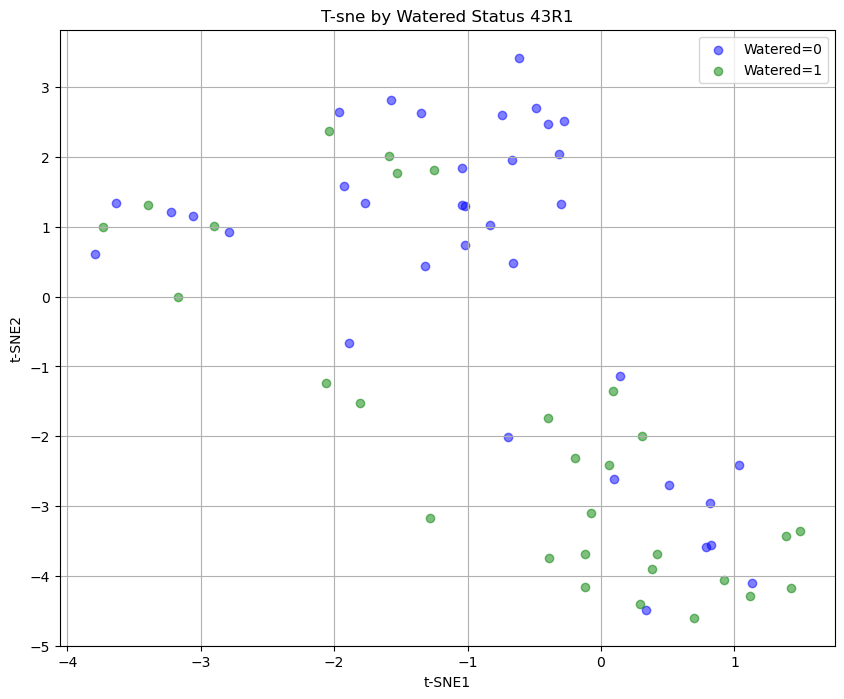

In [48]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/perday_43R1_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status 43R1')
plt.legend()
plt.show()


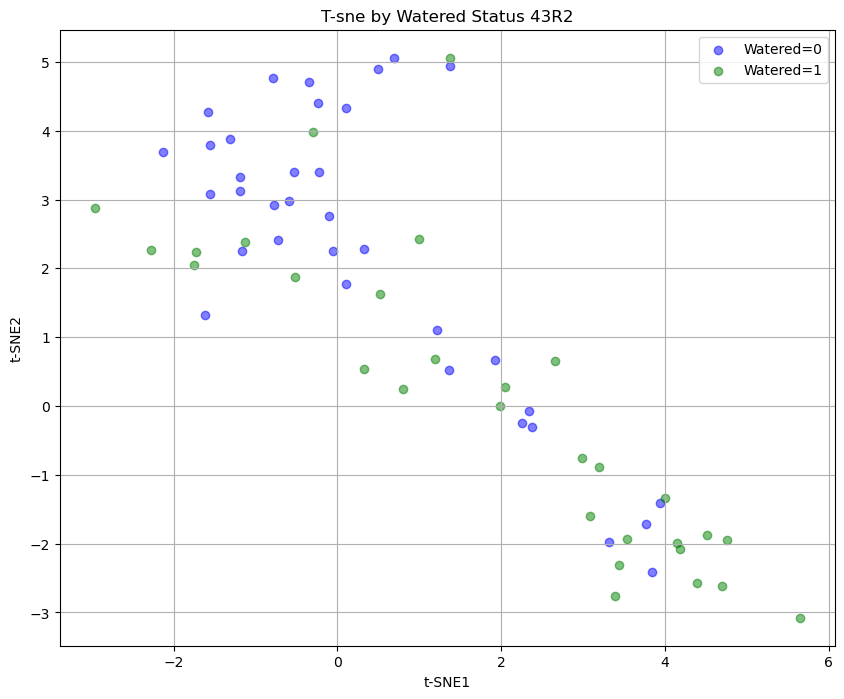

In [49]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/perday_43R2_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status 43R2')
plt.legend()
plt.show()


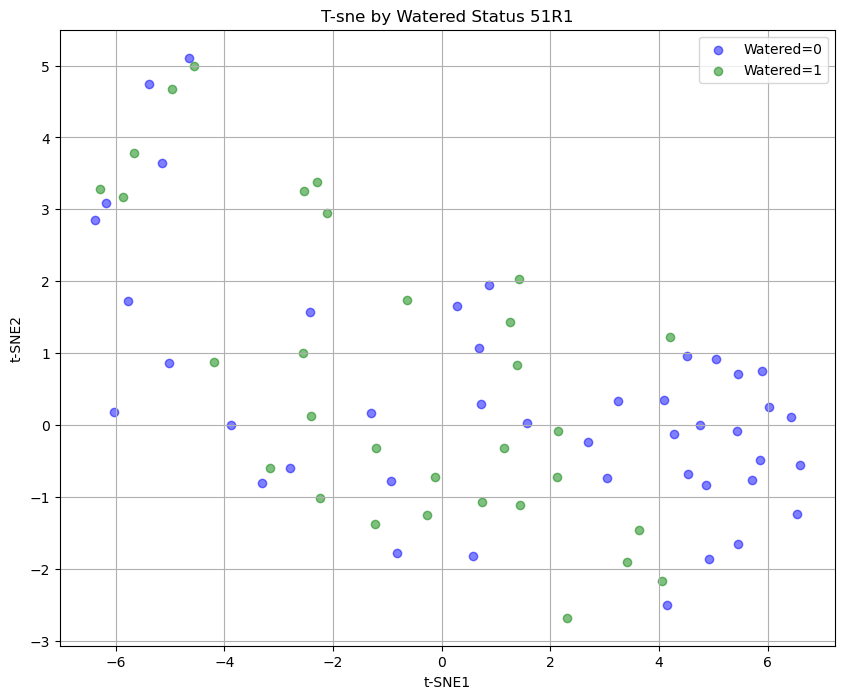

In [50]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/perday_51R1_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status 51R1')
plt.legend()
plt.show()


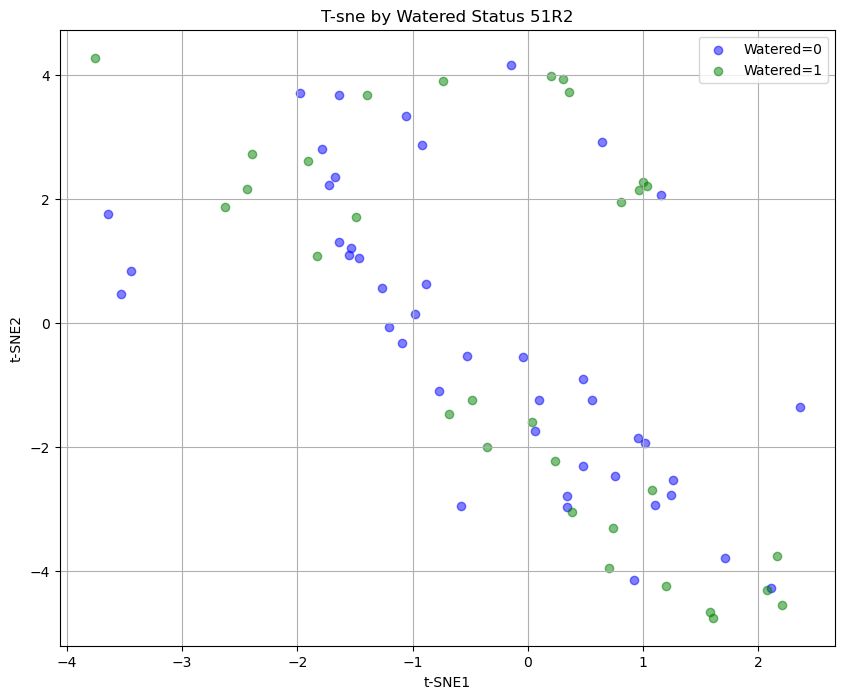

In [51]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/perday_51R2_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status 51R2')
plt.legend()
plt.show()


## 주성분분석_2

### 데이터 만들기

In [69]:
df = pd.read_csv('./concatraw_12/v1_43R1_79_com.csv')
df = df.iloc[115:390, :]
df.to_csv('./concatraw_12/forfeatureanalysis_43R1_79_com.csv', index=False)

df1 = pd.read_csv('./concatraw_12/v1_43R2_79_com.csv')
df1 = df1.iloc[115:390, :]
df1.to_csv('./concatraw_12/forfeatureanalysis_43R2_79_com.csv', index=False)

df2 = pd.read_csv('./concatraw_12/v1_51R1_79_com.csv')
df2 = df2.iloc[115:390, :]
df2.to_csv('./concatraw_12/forfeatureanalysis_51R1_79_com.csv', index=False)

df3 = pd.read_csv('./concatraw_12/v1_51R2_79_com.csv')
df3 = df3.iloc[115:390, :]
df3.to_csv('./concatraw_12/forfeatureanalysis_51R2_79_com.csv', index=False)

df4 = pd.read_csv('./concatraw_12/v1_40R1_79_com.csv')
df4 = df4.iloc[1142:1471, :]
df4.to_csv('./concatraw_12/forfeatureanalysis_40R1_79_com.csv', index=False)

df5 = pd.read_csv('./concatraw_12/v1_42R1_79_com.csv')
df5 = df5.iloc[2376:2654, :]
df5.to_csv('./concatraw_12/forfeatureanalysis_42R1_79_com.csv', index=False)


### PCA

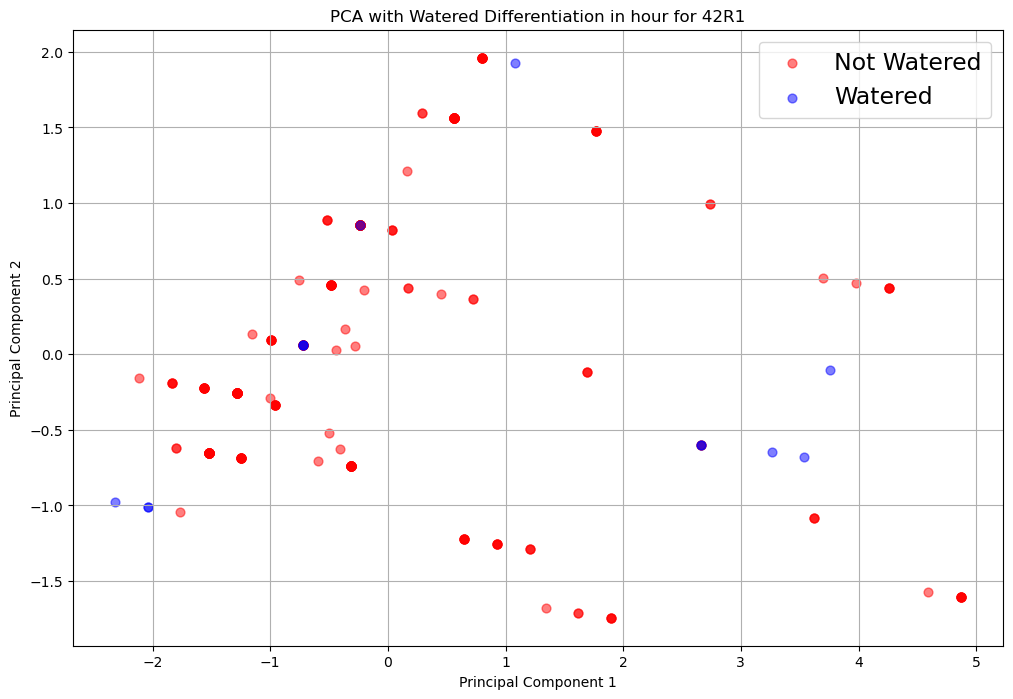

In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_42R1_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA with Watered Differentiation in hour for 42R1')

# watered 값에 따른 색상 지정
colors = {0: 'r', 1: 'b'}
labels = {0: 'Not Watered', 1: 'Watered'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=40, 
               label=labels[watered])

ax.legend(fontsize=17)
ax.grid()
plt.show()


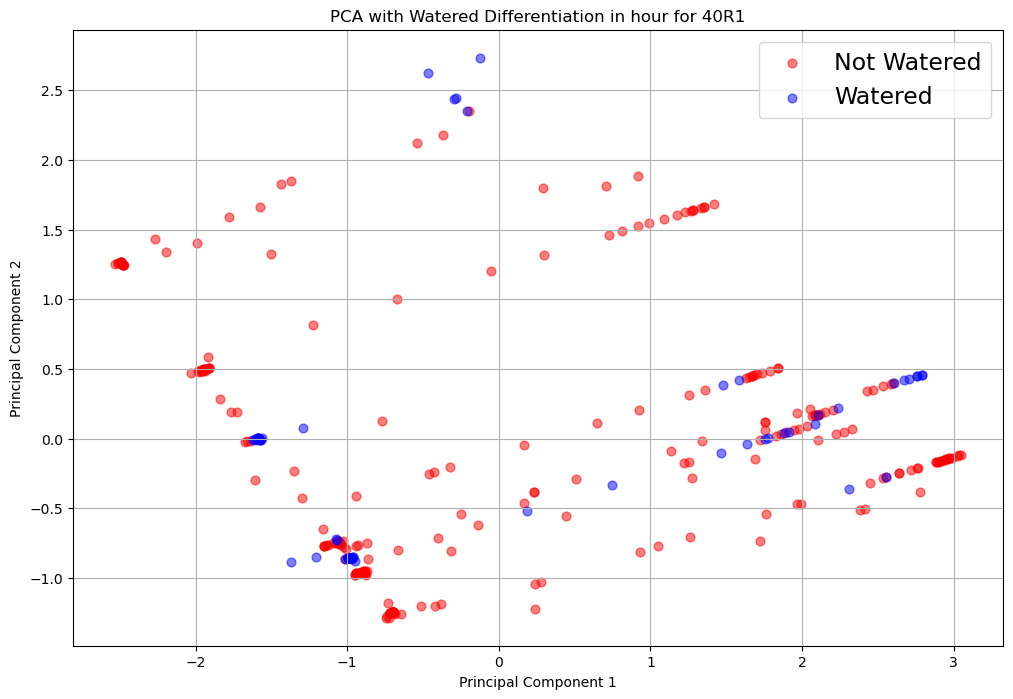

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_40R1_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA with Watered Differentiation in hour for 40R1')

# watered 값에 따른 색상 지정
colors = {0: 'r', 1: 'b'}
labels = {0: 'Not Watered', 1: 'Watered'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=40, 
               label=labels[watered])

ax.legend(fontsize=17)
ax.grid()
plt.show()


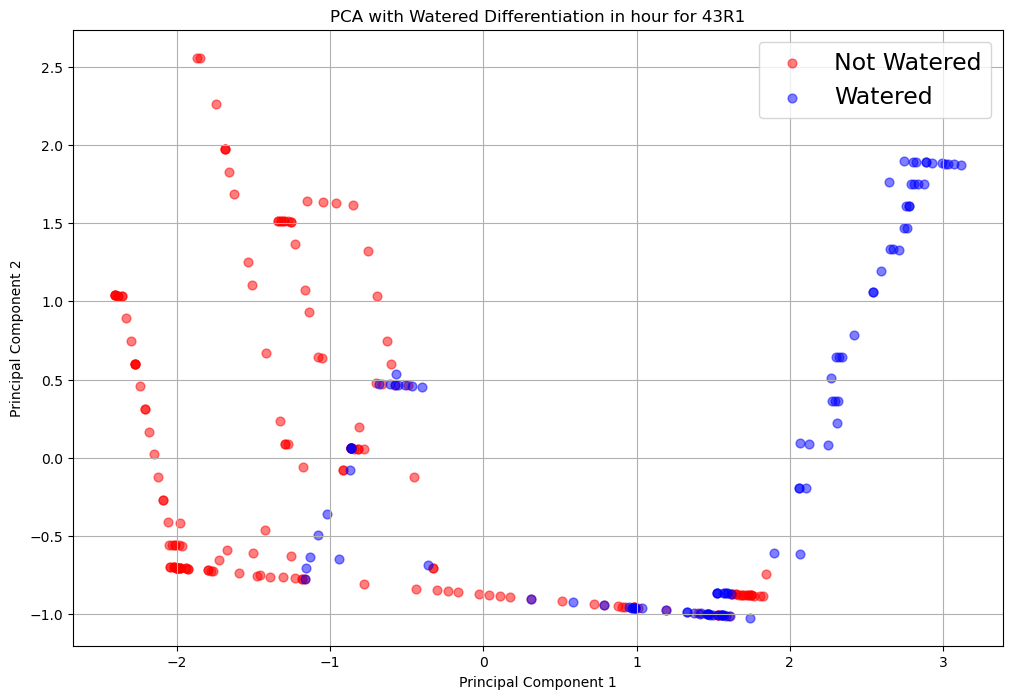

In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_43R1_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA with Watered Differentiation in hour for 43R1')

# watered 값에 따른 색상 지정
colors = {0: 'r', 1: 'b'}
labels = {0: 'Not Watered', 1: 'Watered'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=40, 
               label=labels[watered])

ax.legend(fontsize=17)
ax.grid()
plt.show()


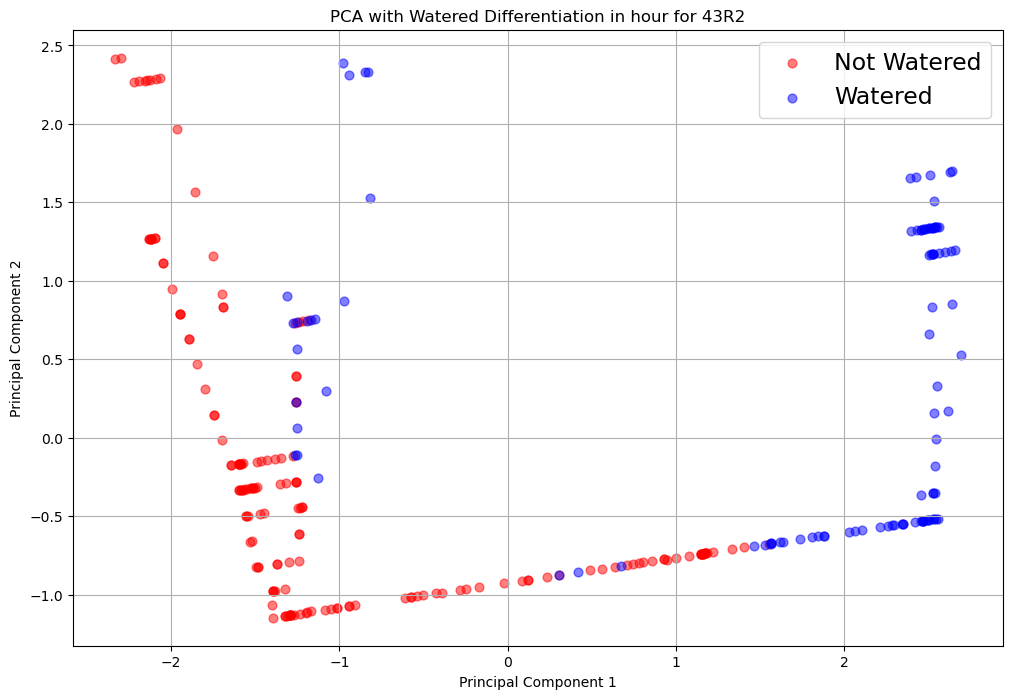

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_43R2_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA with Watered Differentiation in hour for 43R2')

# watered 값에 따른 색상 지정
colors = {0: 'r', 1: 'b'}
labels = {0: 'Not Watered', 1: 'Watered'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=40, 
               label=labels[watered])

ax.legend(fontsize=17)
ax.grid()
plt.show()


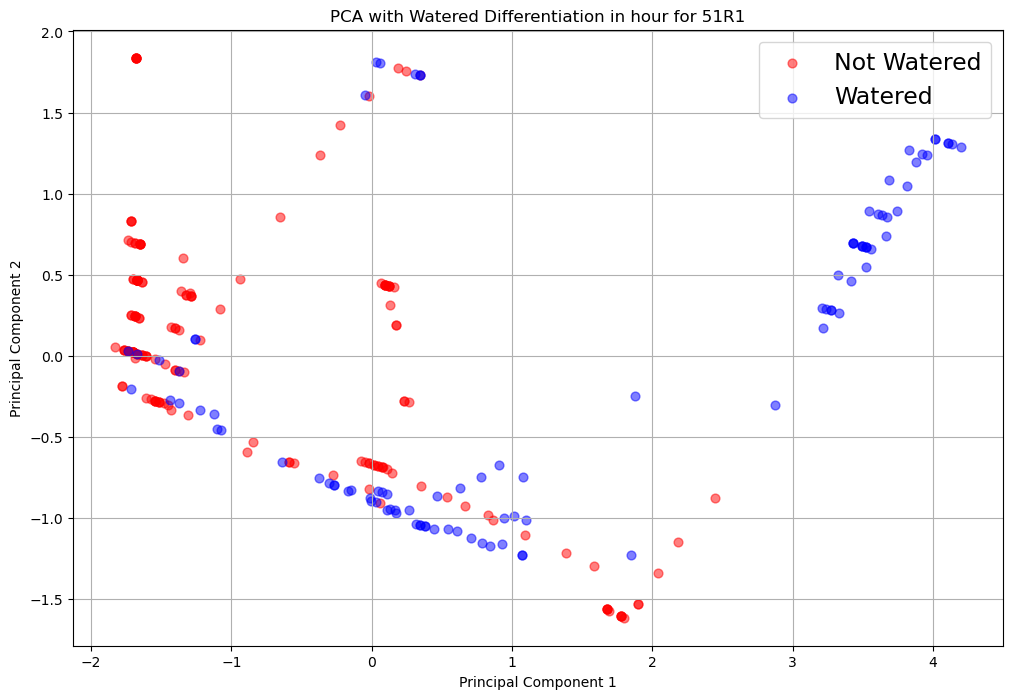

In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_51R1_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA with Watered Differentiation in hour for 51R1')

# watered 값에 따른 색상 지정
colors = {0: 'r', 1: 'b'}
labels = {0: 'Not Watered', 1: 'Watered'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=40, 
               label=labels[watered])

ax.legend(fontsize=17)
ax.grid()
plt.show()


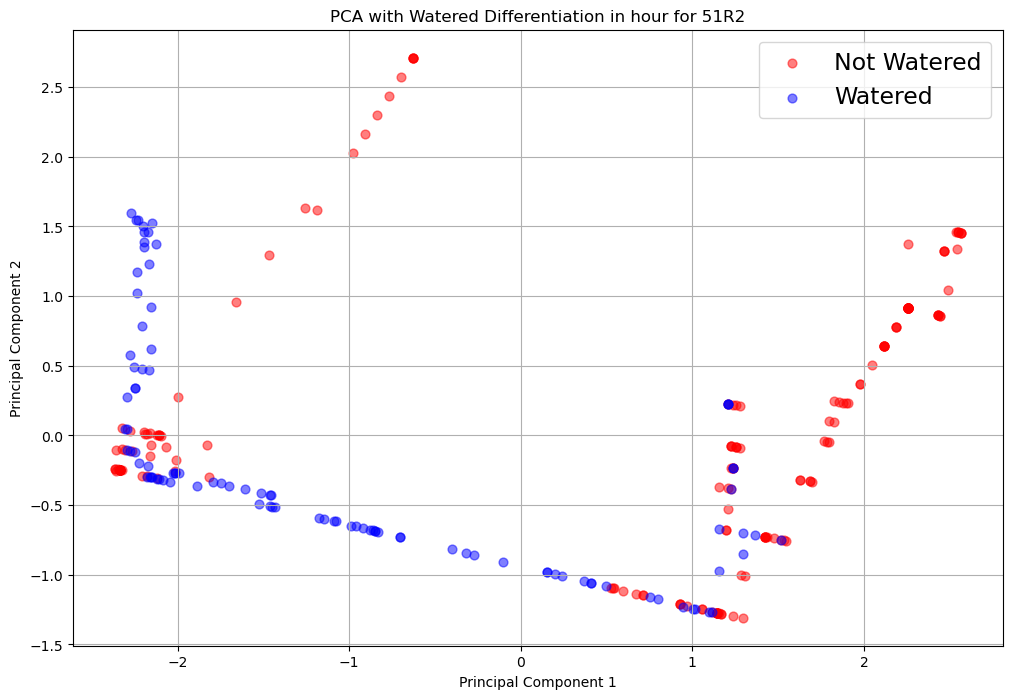

In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_51R2_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA with Watered Differentiation in hour for 51R2')

# watered 값에 따른 색상 지정
colors = {0: 'r', 1: 'b'}
labels = {0: 'Not Watered', 1: 'Watered'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=40, 
               label=labels[watered])

ax.legend(fontsize=17)
ax.grid()
plt.show()


### MDA

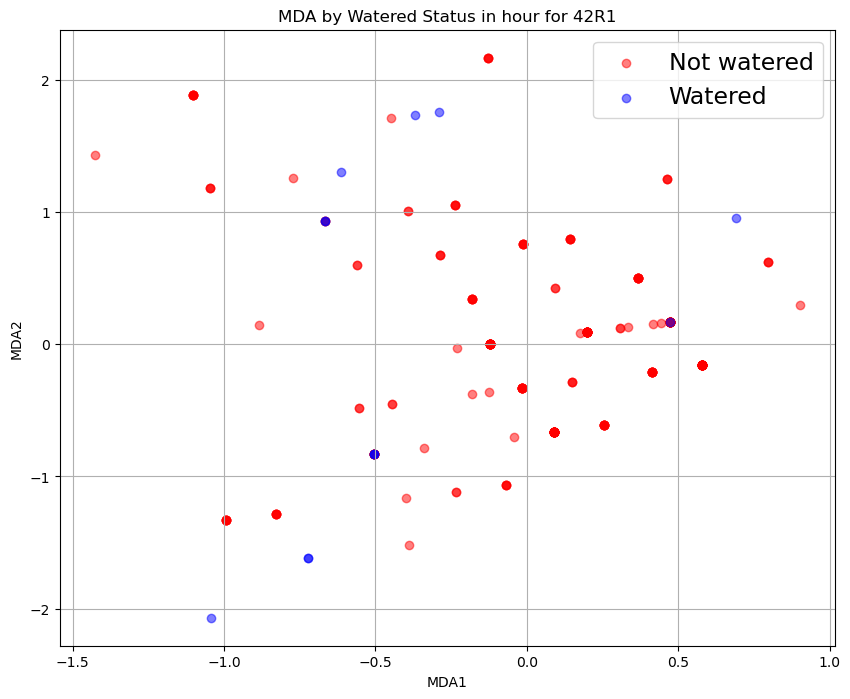

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_42R1_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['r', 'b']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Not watered', 'Watered']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('MDA by Watered Status in hour for 42R1')
plt.legend(fontsize=17)
plt.show()

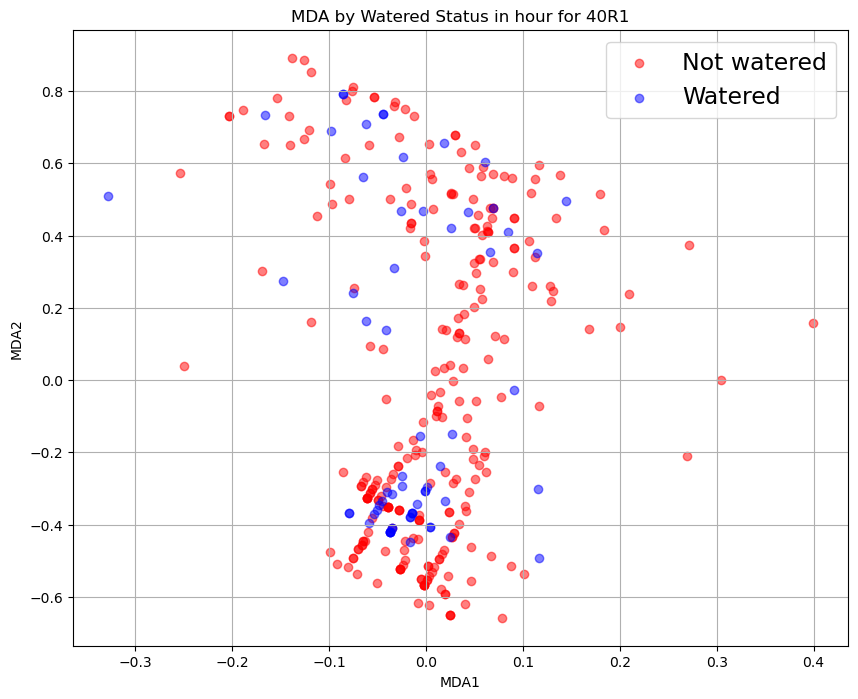

In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_40R1_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['r', 'b']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Not watered', 'Watered']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('MDA by Watered Status in hour for 40R1')
plt.legend(fontsize=17)
plt.show()

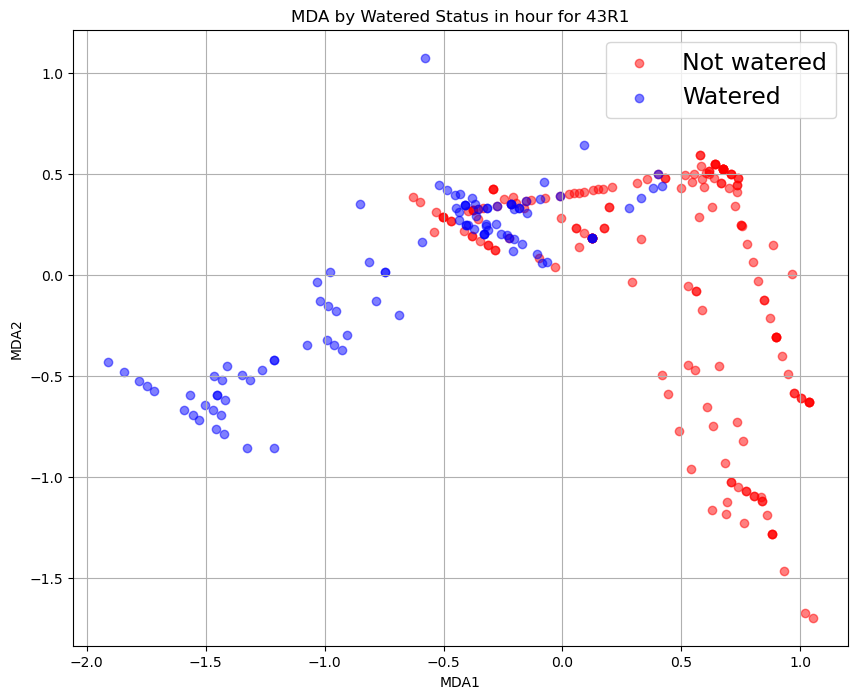

In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_43R1_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['r', 'b']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Not watered', 'Watered']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('MDA by Watered Status in hour for 43R1')
plt.legend(fontsize=17)
plt.show()

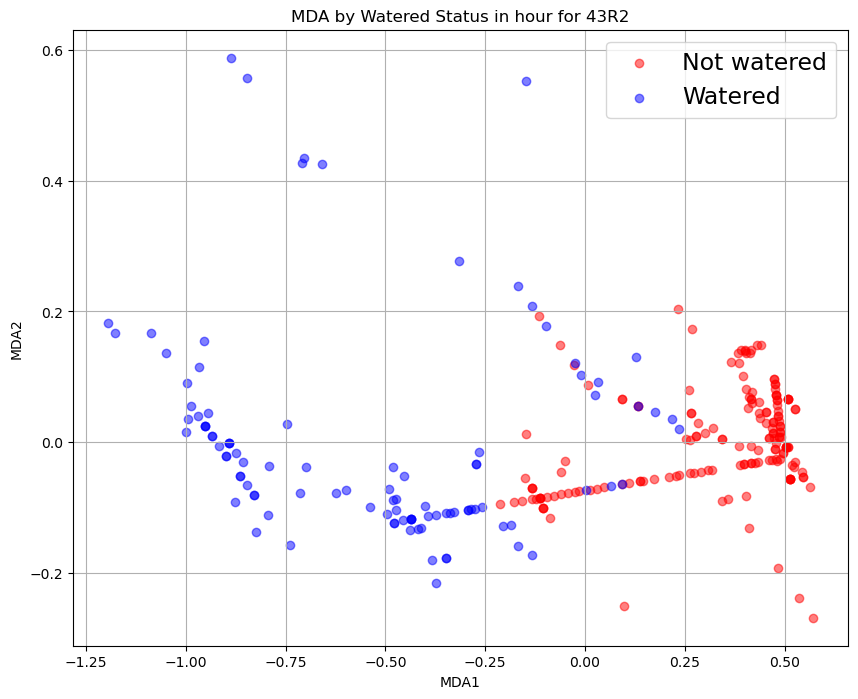

In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_43R2_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['r', 'b']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Not watered', 'Watered']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('MDA by Watered Status in hour for 43R2')
plt.legend(fontsize=17)
plt.show()

/Users/kwangilkim/anaconda3/envs/scrapping/lib/python3.8/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


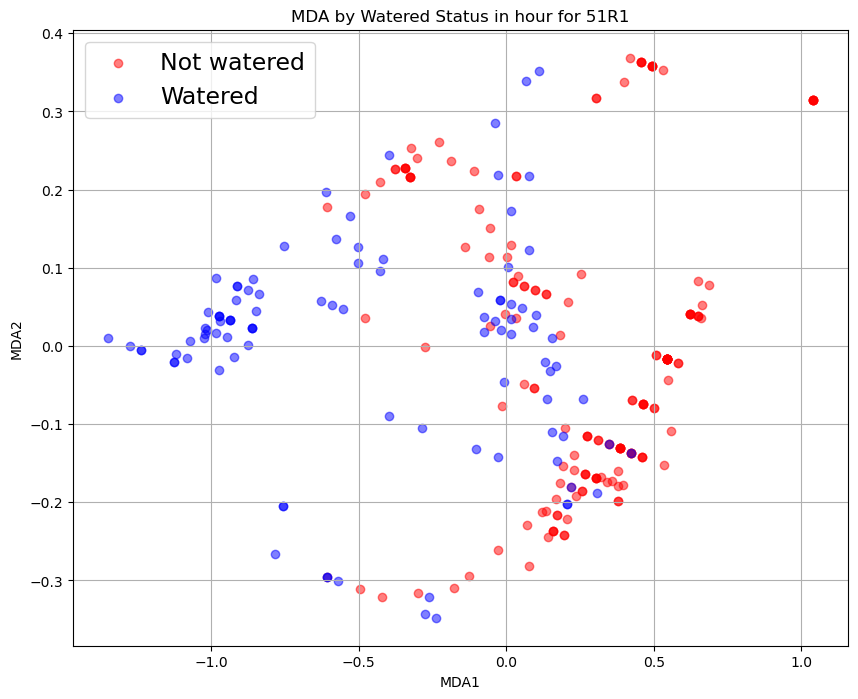

In [81]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_51R1_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['r', 'b']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Not watered', 'Watered']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('MDA by Watered Status in hour for 51R1')
plt.legend(fontsize=17)
plt.show()

/Users/kwangilkim/anaconda3/envs/scrapping/lib/python3.8/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


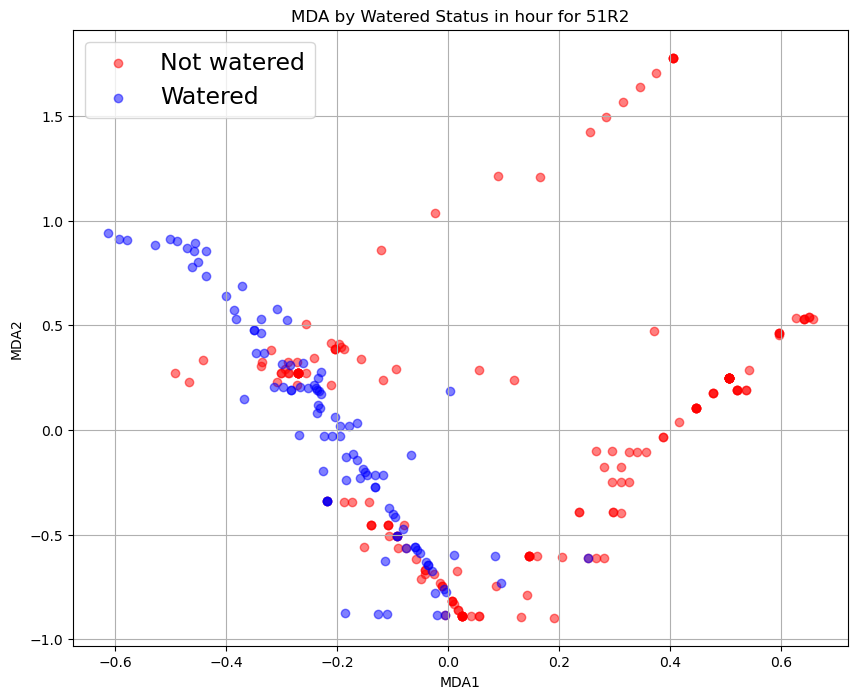

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_51R2_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['r', 'b']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Not watered', 'Watered']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('MDA by Watered Status in hour for 51R2')
plt.legend(fontsize=17)
plt.show()

### U-map

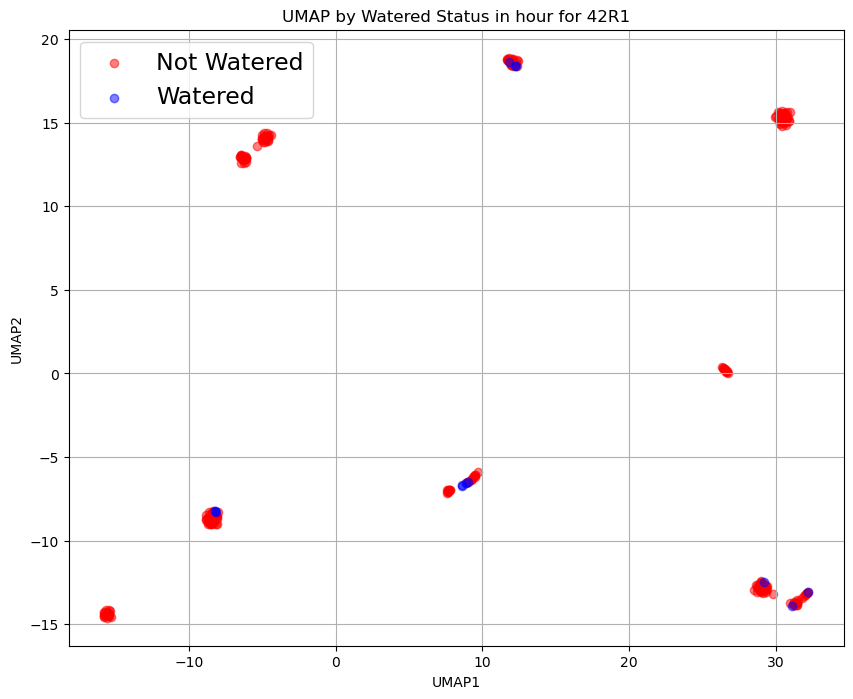

In [83]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/forfeatureanalysis_42R1_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}  # 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP by Watered Status in hour for 42R1')
plt.legend(fontsize=17)
plt.show()


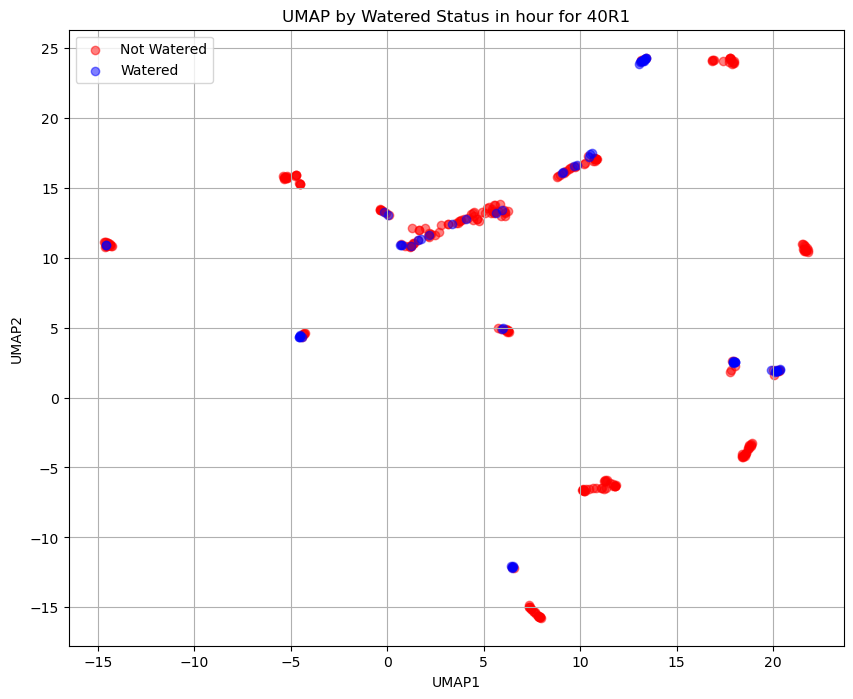

In [84]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/forfeatureanalysis_40R1_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}  # 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP by Watered Status in hour for 40R1')
plt.legend()
plt.show()


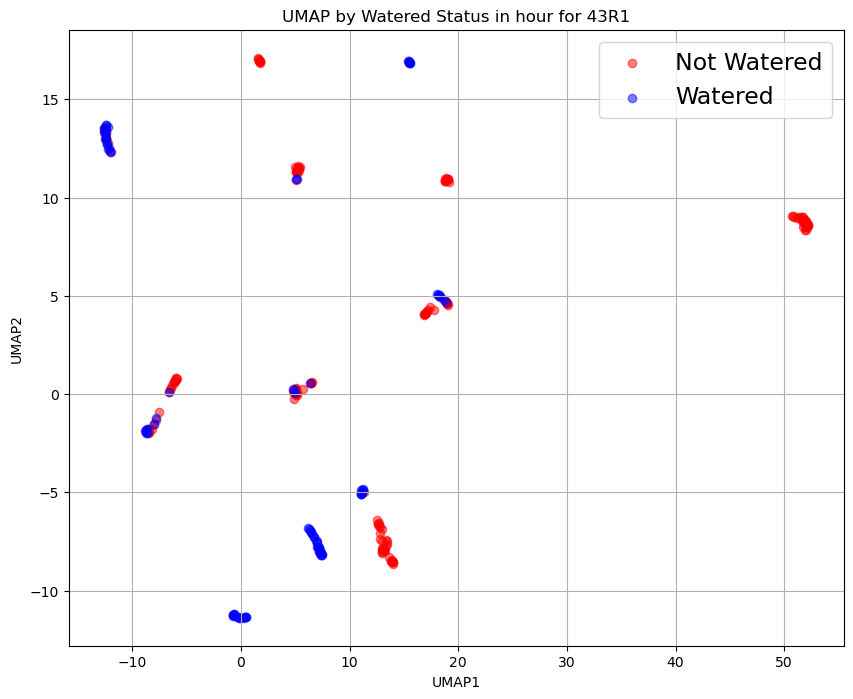

In [85]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/forfeatureanalysis_43R1_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}  # 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP by Watered Status in hour for 43R1')
plt.legend(fontsize=17)
plt.show()


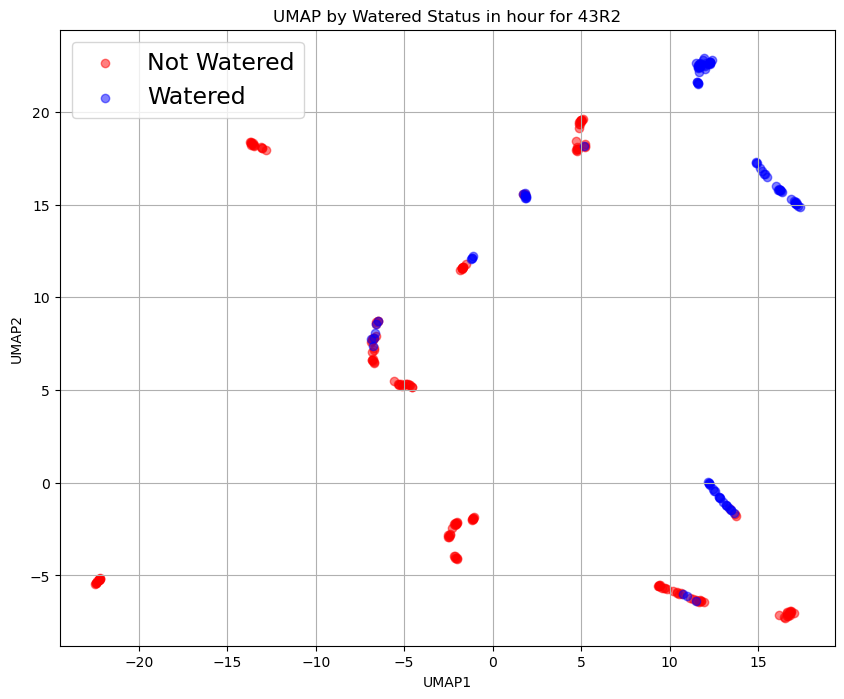

In [86]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/forfeatureanalysis_43R2_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}  # 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP by Watered Status in hour for 43R2')
plt.legend(fontsize=17)
plt.show()


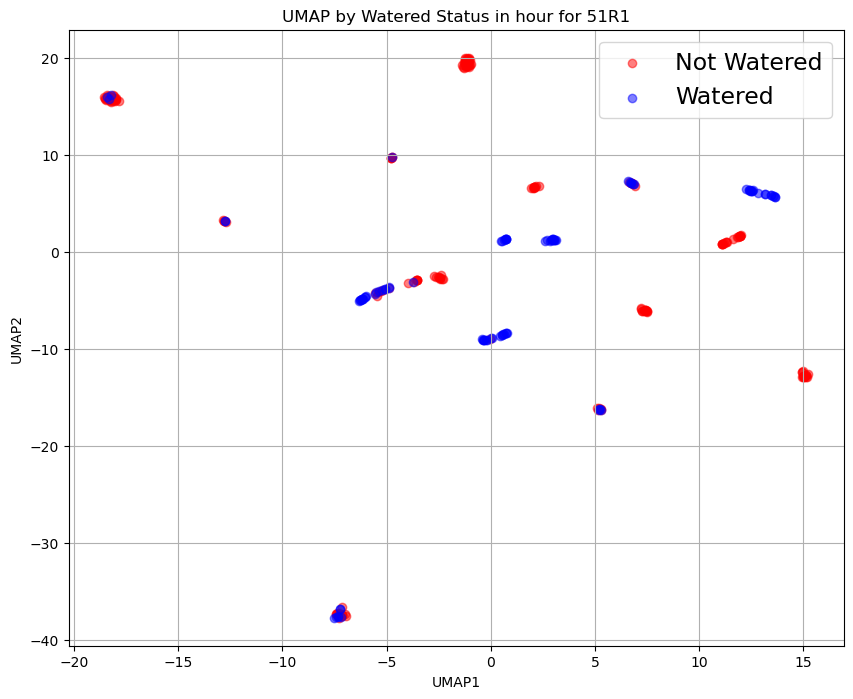

In [87]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/forfeatureanalysis_51R1_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}  # 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP by Watered Status in hour for 51R1')
plt.legend(fontsize=17)
plt.show()


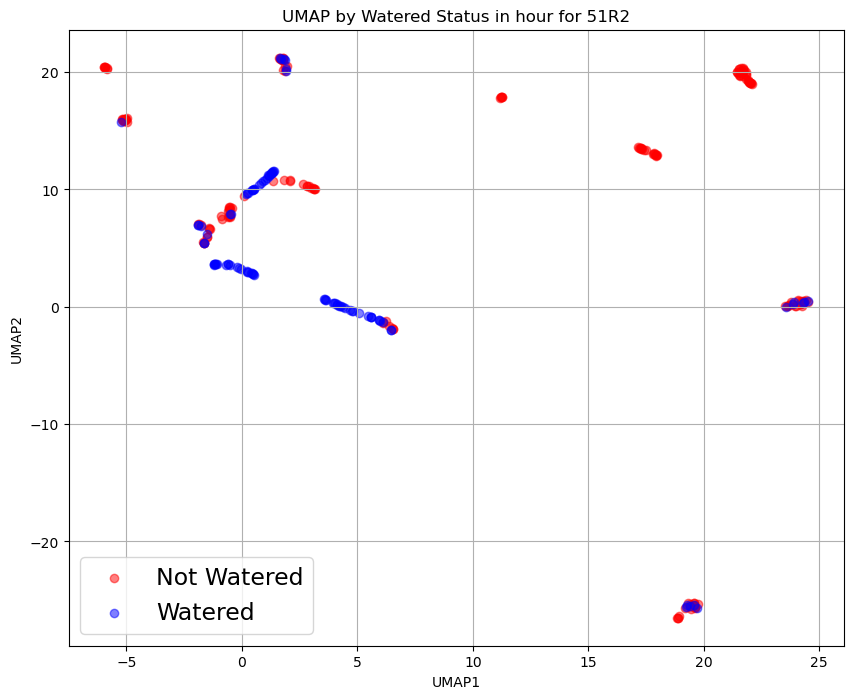

In [88]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/forfeatureanalysis_51R2_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}  # 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP by Watered Status in hour for 51R2')
plt.legend(fontsize=17)
plt.show()


### T-sne

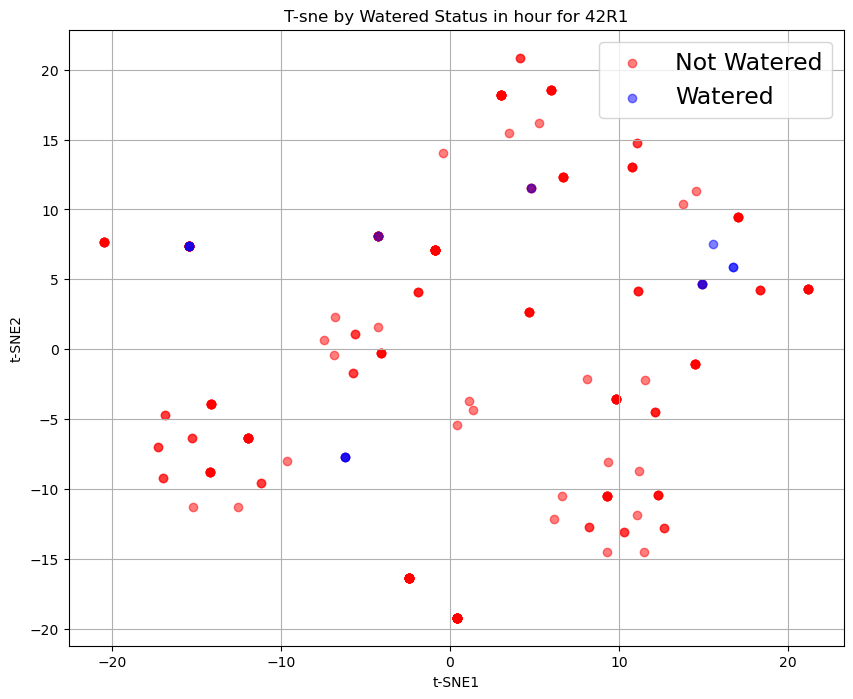

In [89]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/forfeatureanalysis_42R1_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}# 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status in hour for 42R1')
plt.legend(fontsize=17)
plt.show()


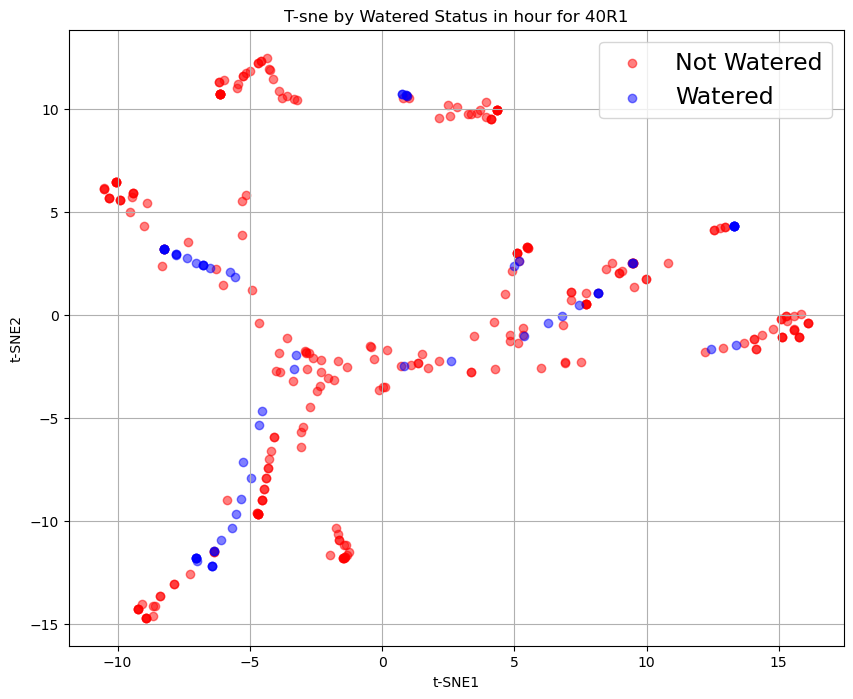

In [90]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/forfeatureanalysis_40R1_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}# 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status in hour for 40R1')
plt.legend(fontsize=17)
plt.show()


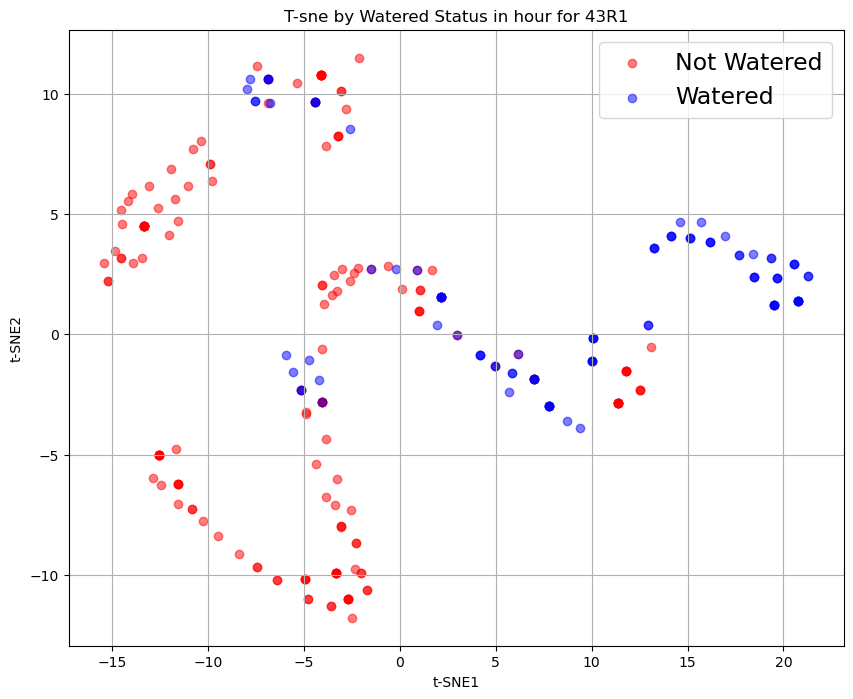

In [91]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/forfeatureanalysis_43R1_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}# 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status in hour for 43R1')
plt.legend(fontsize=17)
plt.show()


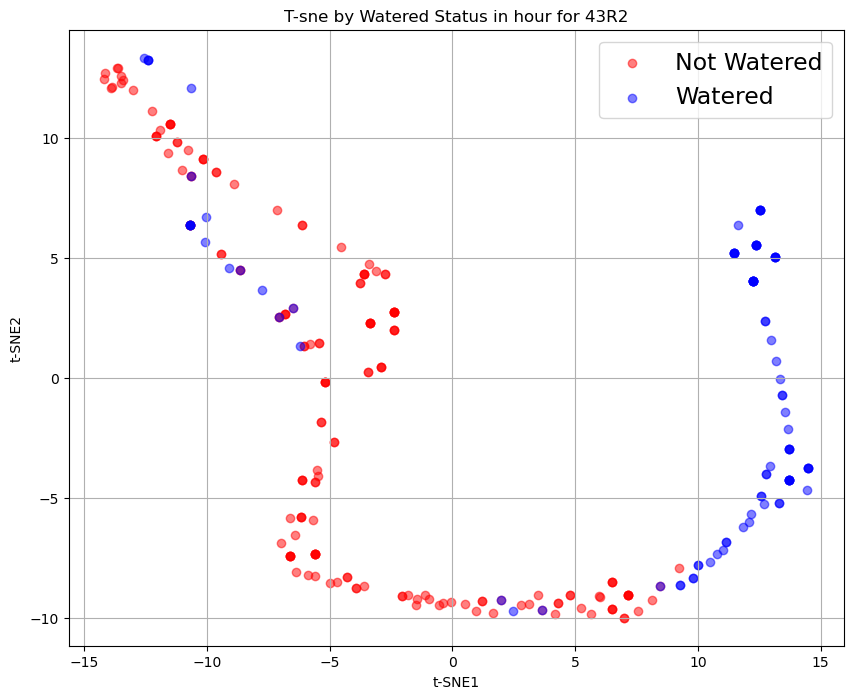

In [92]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/forfeatureanalysis_43R2_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}# 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status in hour for 43R2')
plt.legend(fontsize=17)
plt.show()


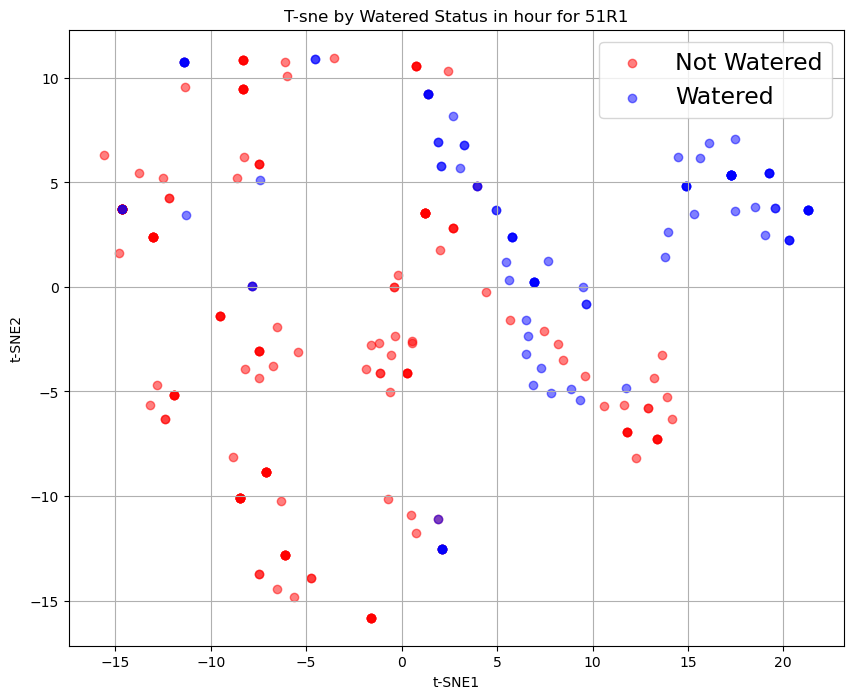

In [93]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/forfeatureanalysis_51R1_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}# 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status in hour for 51R1')
plt.legend(fontsize=17)
plt.show()


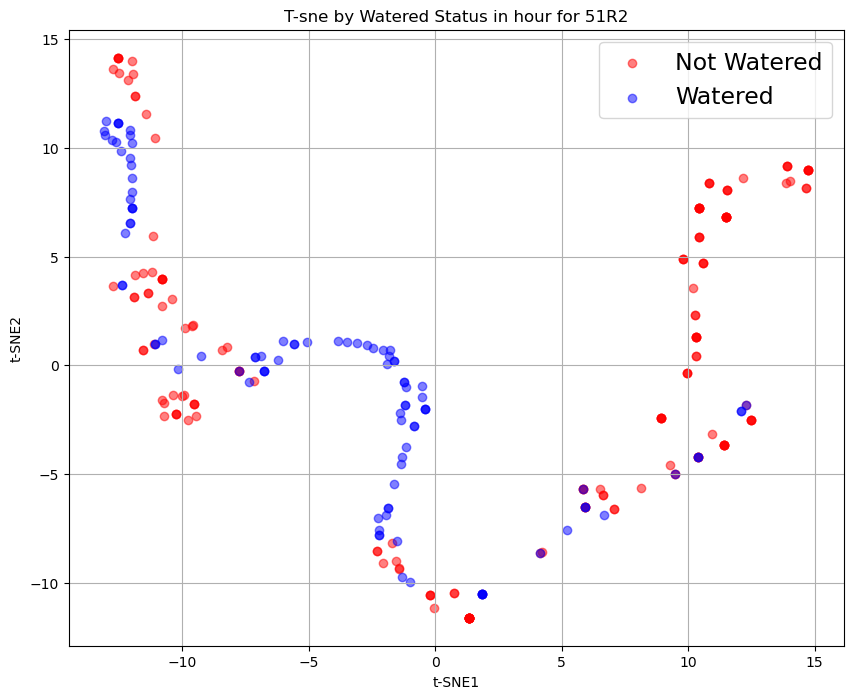

In [94]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/forfeatureanalysis_51R2_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}# 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status in hour for 51R2')
plt.legend(fontsize=17)
plt.show()


## 시계열

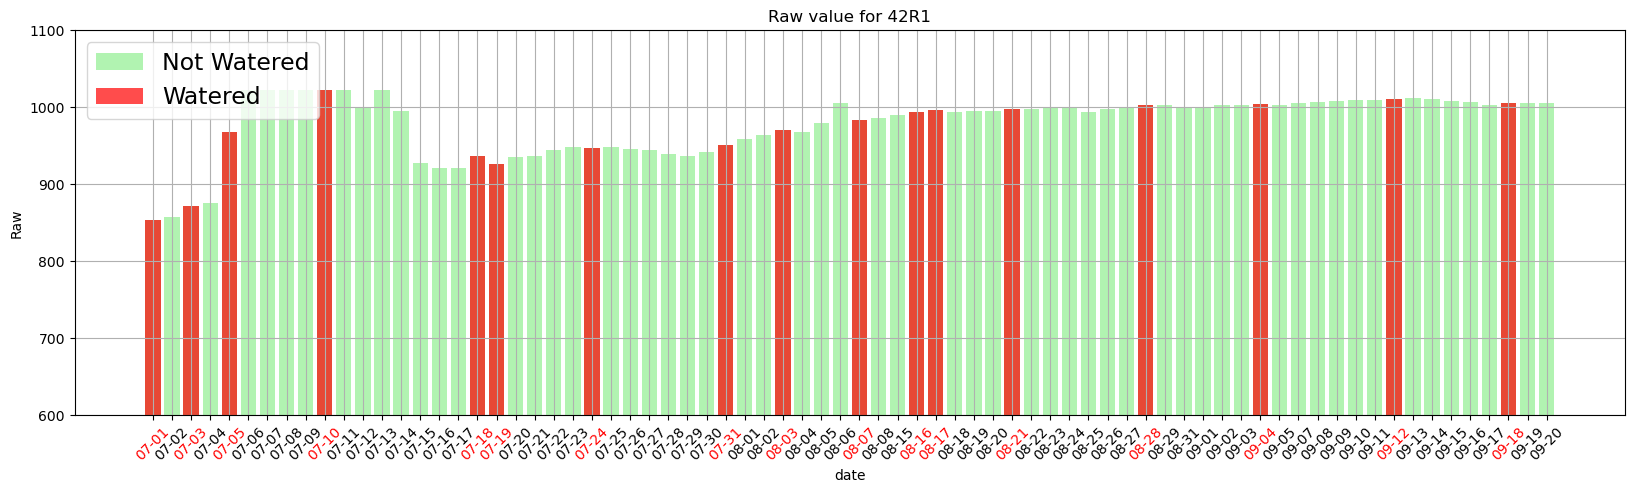

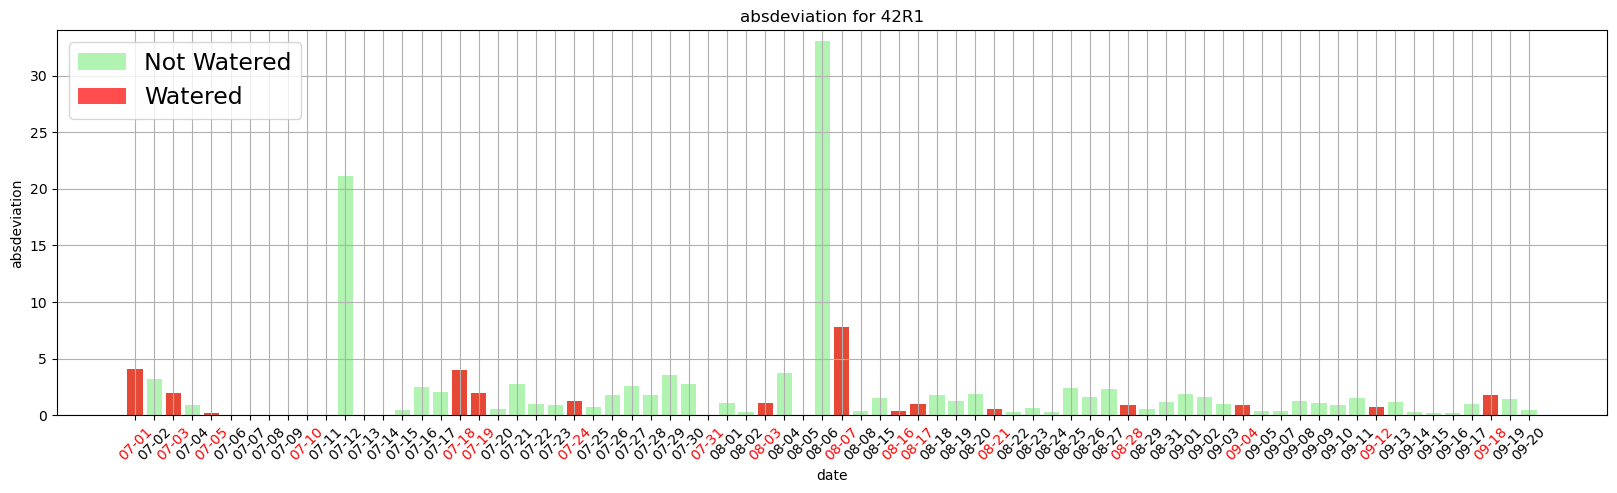

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def visualize_feeding_timeseries(base_file_name):
    df = pd.read_csv(f'./concatraw_12/{base_file_name}.csv')
    df1 = pd.read_csv(f'./concatraw_12/{base_file_name}_abs.csv')

    x = df['date'].values
    y = df['Raw'].values
    X = df1['date'].values
    Y = df1['AbsDeviation'].values

    vertical_line_x_values = ['07-01','07-03','07-05','07-10','07-18','07-19','07-24','07-31','08-03','08-07','08-14','08-16','08-17','08-21','08-28','09-04','09-12','09-18']

    plt.figure(figsize=(20,5))
    # plt.plot(x, y, color='green', alpha=0.7)
    plt.bar(x, y, color='lightgreen', alpha=0.7, label='Not Watered')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in x:
            idx = np.where(x == val)[0]
            if not watered_bar_drawn:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7, label='Watered')
                watered_bar_drawn = True
            else:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7)

    plt.ylim(600, 1100)
    plt.title('Raw value for 42R1')
    plt.xlabel('date')
    plt.ylabel('Raw')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

    plt.figure(figsize=(20,5))
    # plt.plot(X, Y, color='green', alpha=0.7)
    plt.bar(X, Y, color='lightgreen', alpha=0.7, label='Not Watered')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in X:
            idx = np.where(X == val)[0]
            if not watered_bar_drawn:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7, label='Watered')
                watered_bar_drawn = True
            else:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7)

    plt.ylim(0, 34)
    plt.title('absdeviation for 42R1')
    plt.xlabel('date')
    plt.ylabel('absdeviation')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

visualize_feeding_timeseries('42R1_79_forplot')


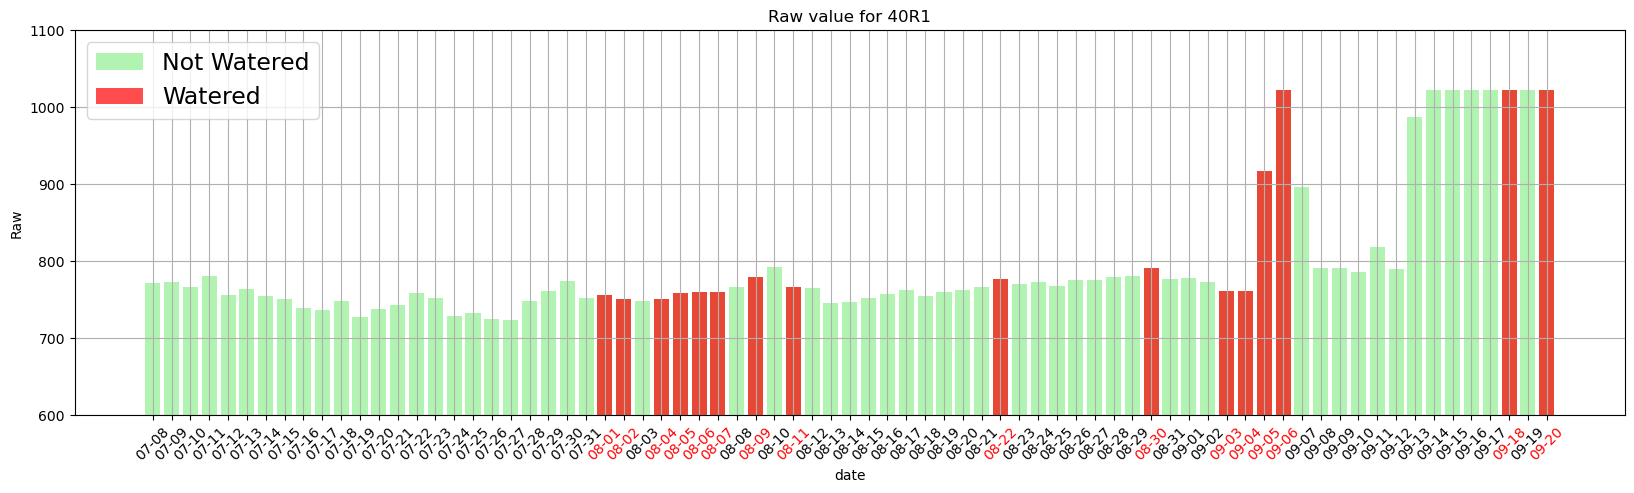

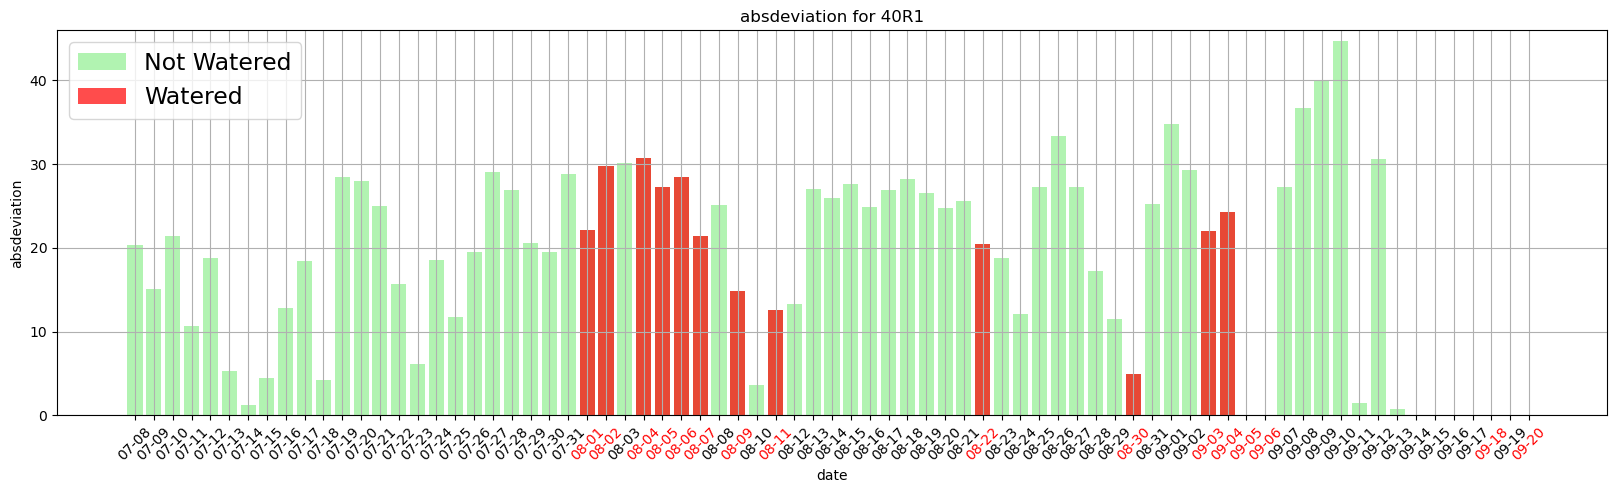

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def visualize_feeding_timeseries(base_file_name):
    df = pd.read_csv(f'./concatraw_12/{base_file_name}.csv')
    df1 = pd.read_csv(f'./concatraw_12/{base_file_name}_abs.csv')

    x = df['date'].values
    y = df['Raw'].values
    X = df1['date'].values
    Y = df1['AbsDeviation'].values

    vertical_line_x_values = ['08-01','08-02','08-04','08-05','08-06','08-07','08-09','08-11','08-22','08-30','8-31','09-03','09-04','09-05','09-06','09-18','09-20']

    plt.figure(figsize=(20,5))
    plt.bar(x, y, color='lightgreen', alpha=0.7, label='Not Watered')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in x:
            idx = np.where(x == val)[0]
            if not watered_bar_drawn:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7, label='Watered')
                watered_bar_drawn = True
            else:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7)

    plt.ylim(600, 1100)
    plt.title('Raw value for 40R1')
    plt.xlabel('date')
    plt.ylabel('Raw')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

    plt.figure(figsize=(20,5))
    plt.bar(X, Y, color='lightgreen', alpha=0.7, label='Not Watered')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in X:
            idx = np.where(X == val)[0]
            if not watered_bar_drawn:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7, label='Watered')
                watered_bar_drawn = True
            else:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7)

    plt.ylim(0, 46)
    plt.title('absdeviation for 40R1')
    plt.xlabel('date')
    plt.ylabel('absdeviation')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

visualize_feeding_timeseries('40R1_79_forplot')


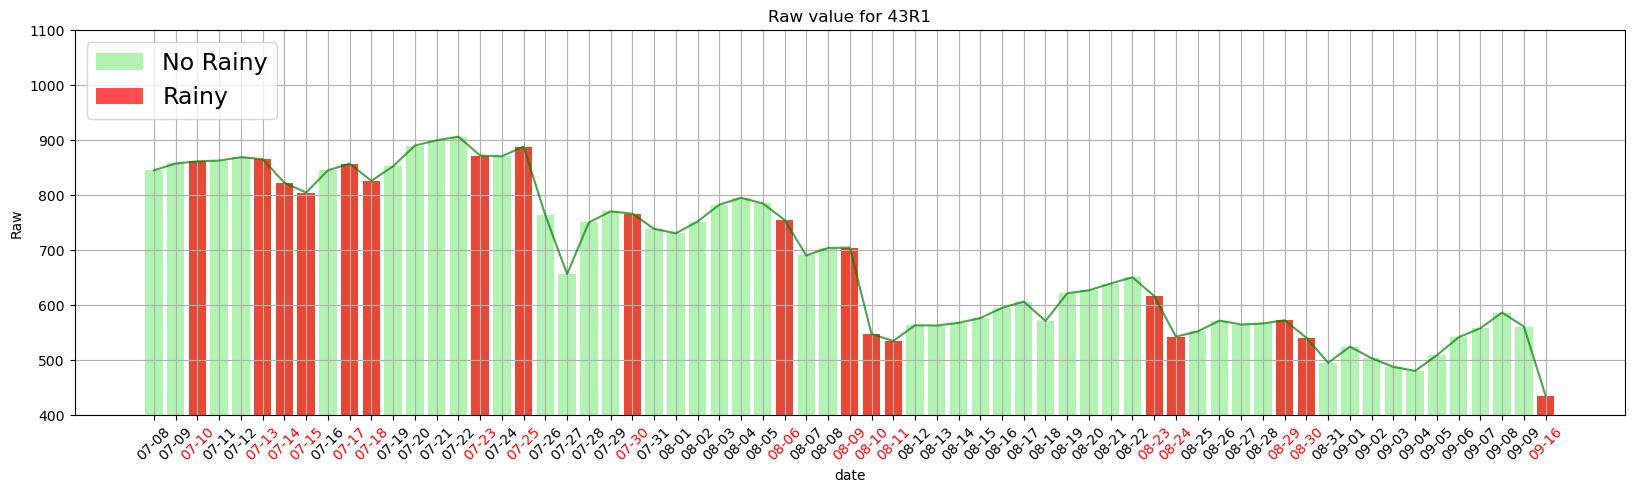

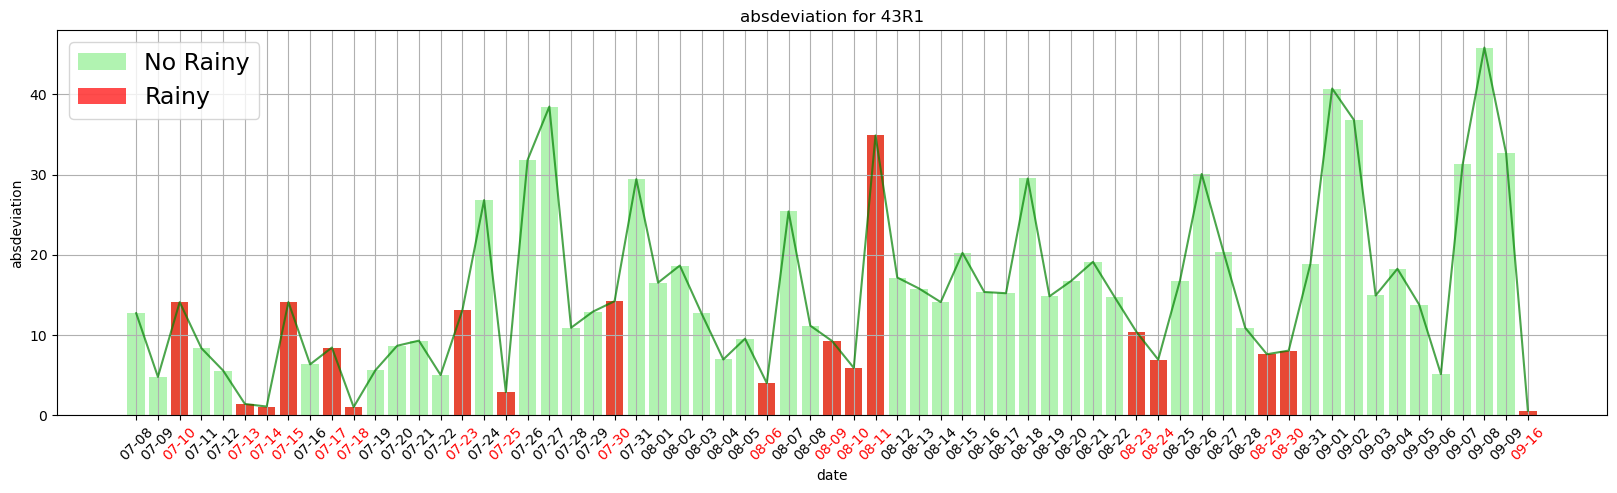

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def visualize_feeding_timeseries(base_file_name):
    df = pd.read_csv(f'./concatraw_12/{base_file_name}.csv')
    df1 = pd.read_csv(f'./concatraw_12/{base_file_name}_abs.csv')

    x = df['date'].values
    y = df['Raw'].values
    X = df1['date'].values
    Y = df1['AbsDeviation'].values

    vertical_line_x_values = ['07-04','07-05','07-07','07-10','07-13','07-14','07-15','07-17','07-18','07-23','07-25','07-30','08-06','08-09','08-10','08-11','08-23','08-24','08-29','08-30','09-16','09-20']
  
    plt.figure(figsize=(20,5))
    plt.plot(x,y, color='green', alpha=0.7)
    plt.bar(x, y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in x:
            idx = np.where(x == val)[0]
            if not watered_bar_drawn:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7, label='Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7)

    plt.ylim(400, 1100)
    plt.title('Raw value for 43R1')
    plt.xlabel('date')
    plt.ylabel('Raw')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

    plt.figure(figsize=(20,5))
    plt.plot(X,Y, color='green', alpha=0.7)
    plt.bar(X, Y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in X:
            idx = np.where(X == val)[0]
            if not watered_bar_drawn:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7, label='Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7)

    plt.ylim(0, 48)
    plt.title('absdeviation for 43R1')
    plt.xlabel('date')
    plt.ylabel('absdeviation')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

visualize_feeding_timeseries('43R1_79_forplot')


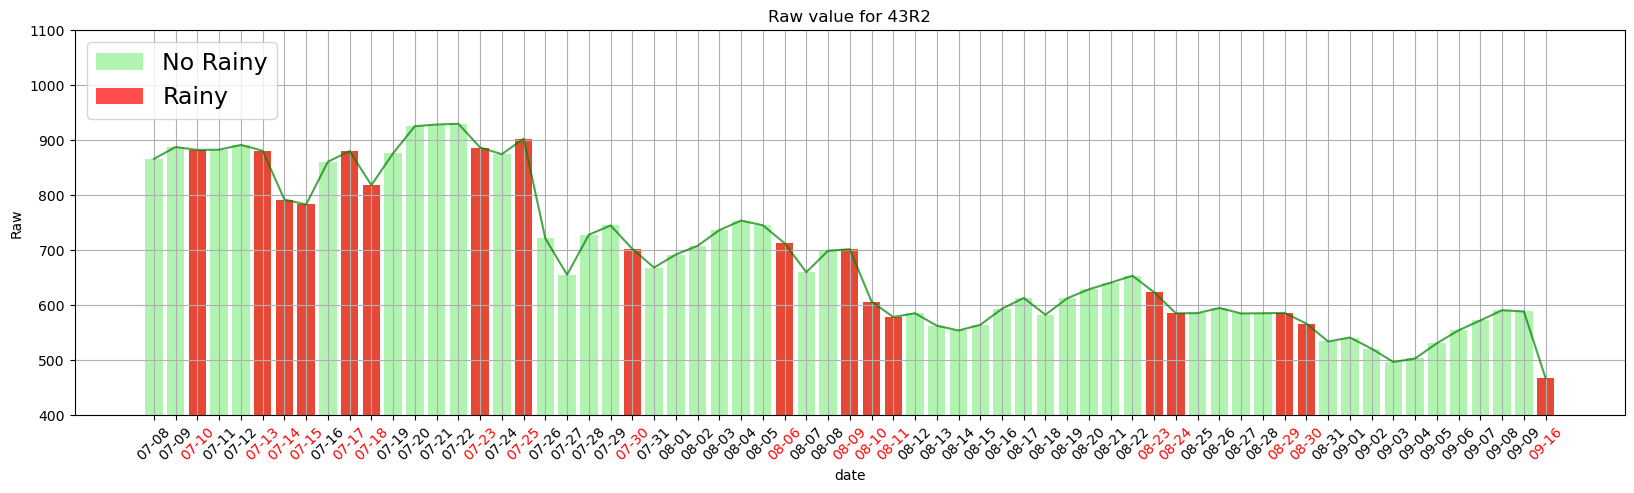

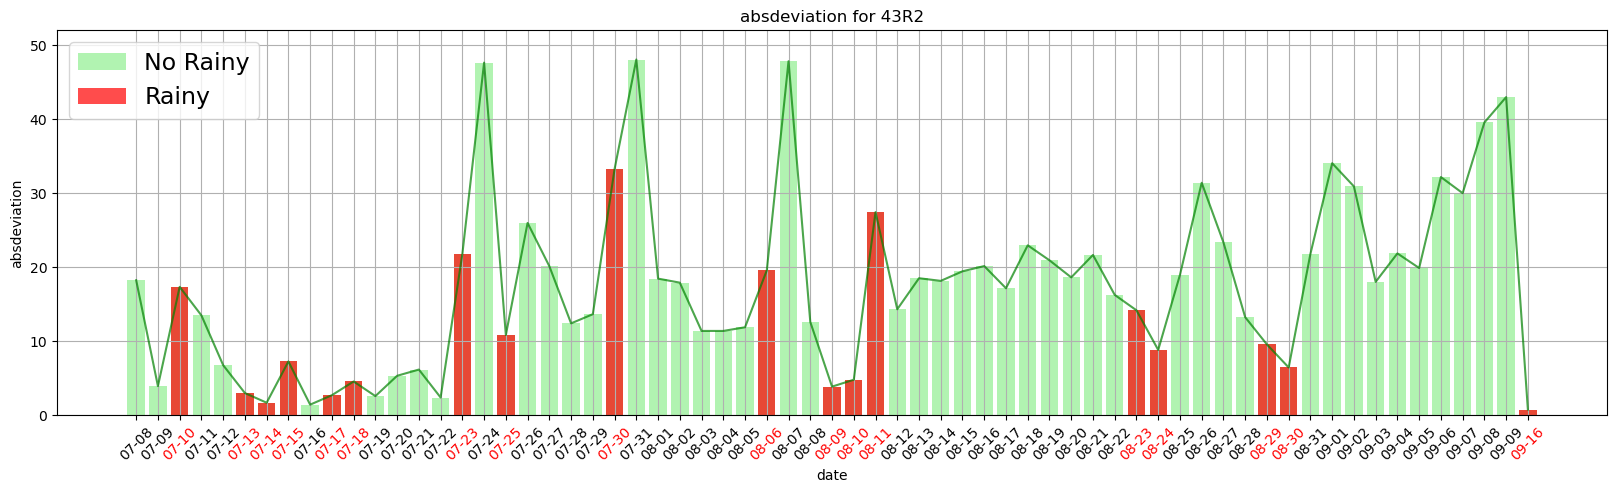

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def visualize_feeding_timeseries(base_file_name):
    df = pd.read_csv(f'./concatraw_12/{base_file_name}.csv')
    df1 = pd.read_csv(f'./concatraw_12/{base_file_name}_abs.csv')

    x = df['date'].values
    y = df['Raw'].values
    X = df1['date'].values
    Y = df1['AbsDeviation'].values

    vertical_line_x_values = ['07-04','07-05','07-07','07-10','07-13','07-14','07-15','07-17','07-18','07-23','07-25','07-30','08-06','08-09','08-10','08-11','08-23','08-24','08-29','08-30','09-16','09-20']
    plt.figure(figsize=(20,5))
    plt.plot(x,y, color='green', alpha=0.7)
    plt.bar(x, y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in x:
            idx = np.where(x == val)[0]
            if not watered_bar_drawn:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7, label='Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7)

    plt.ylim(400, 1100)
    plt.title('Raw value for 43R2')
    plt.xlabel('date')
    plt.ylabel('Raw')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

    plt.figure(figsize=(20,5))
    plt.plot(X,Y, color='green', alpha=0.7)
    plt.bar(X, Y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in X:
            idx = np.where(X == val)[0]
            if not watered_bar_drawn:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7, label='Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7)

    plt.ylim(0, 52)
    plt.title('absdeviation for 43R2')
    plt.xlabel('date')
    plt.ylabel('absdeviation')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

visualize_feeding_timeseries('43R2_79_forplot')


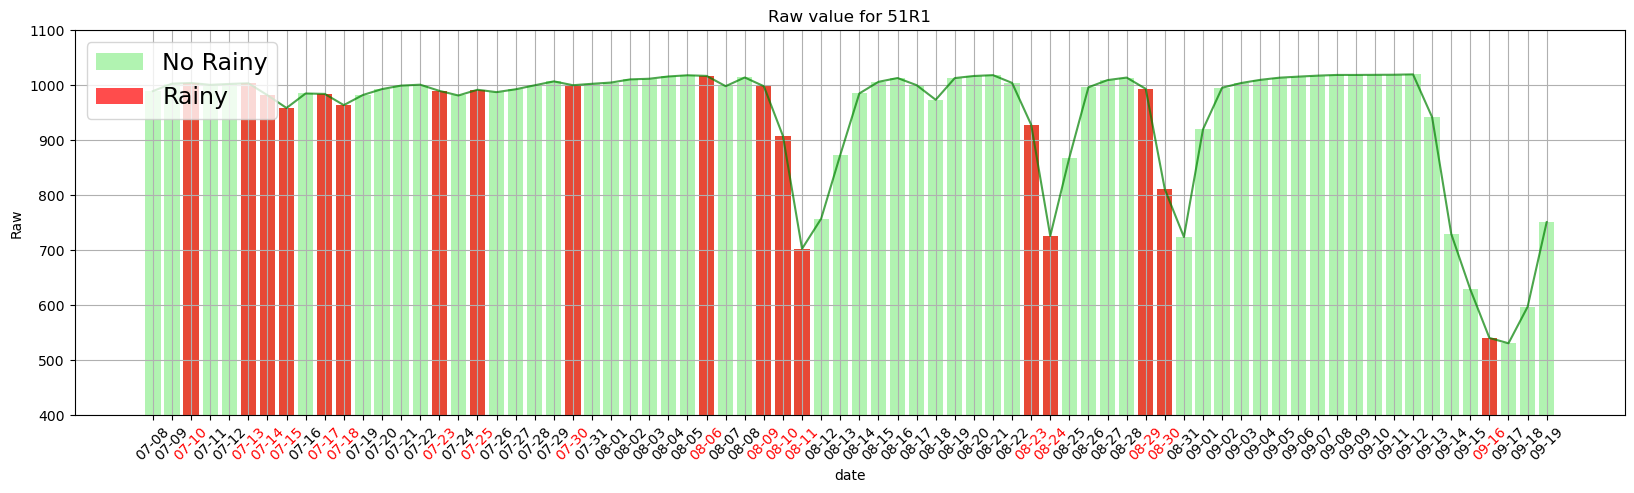

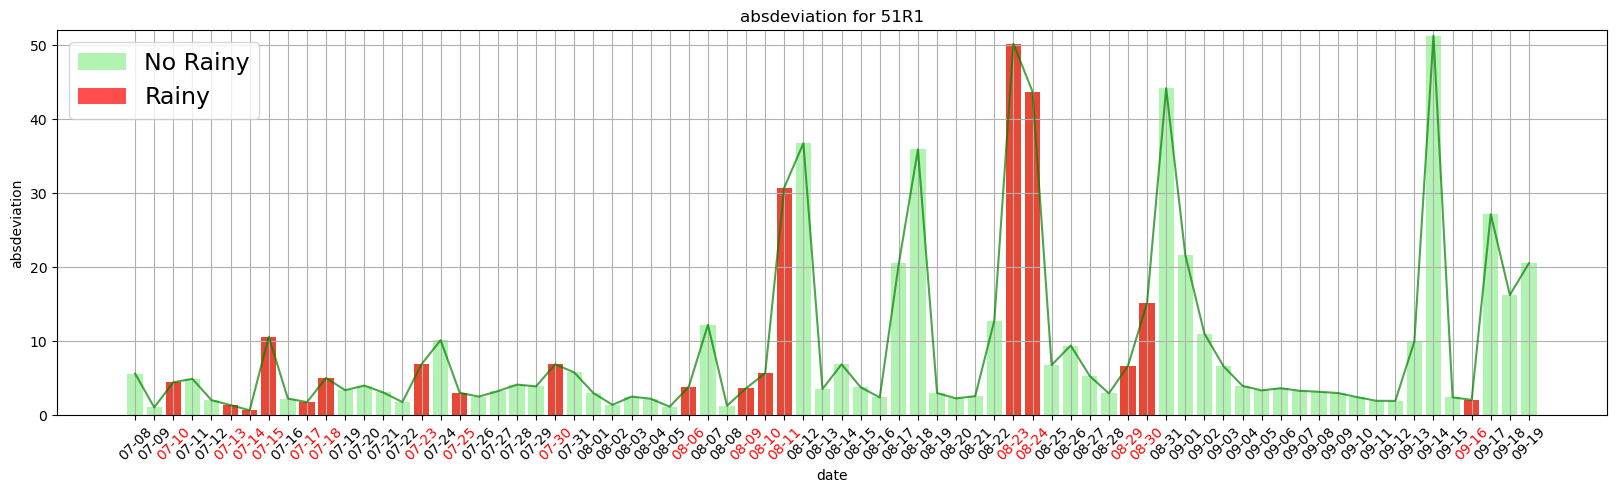

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def visualize_feeding_timeseries(base_file_name):
    df = pd.read_csv(f'./concatraw_12/{base_file_name}.csv')
    df1 = pd.read_csv(f'./concatraw_12/{base_file_name}_abs.csv')

    x = df['date'].values
    y = df['Raw'].values
    X = df1['date'].values
    Y = df1['AbsDeviation'].values

    vertical_line_x_values = ['07-04','07-05','07-07','07-10','07-13','07-14','07-15','07-17','07-18','07-23','07-25','07-30','08-06','08-09','08-10','08-11','08-23','08-24','08-29','08-30','09-16','09-20']
  
    plt.figure(figsize=(20,5))
    plt.plot(x,y, color='green', alpha=0.7)
    plt.bar(x, y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in x:
            idx = np.where(x == val)[0]
            if not watered_bar_drawn:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7, label='Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7)

    plt.ylim(400, 1100)
    plt.title('Raw value for 51R1')
    plt.xlabel('date')
    plt.ylabel('Raw')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

    plt.figure(figsize=(20,5))
    plt.plot(X,Y, color='green', alpha=0.7)
    plt.bar(X, Y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in X:
            idx = np.where(X == val)[0]
            if not watered_bar_drawn:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7, label='Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7)

    plt.ylim(0, 52)
    plt.title('absdeviation for 51R1')
    plt.xlabel('date')
    plt.ylabel('absdeviation')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

visualize_feeding_timeseries('51R1_79_forplot')


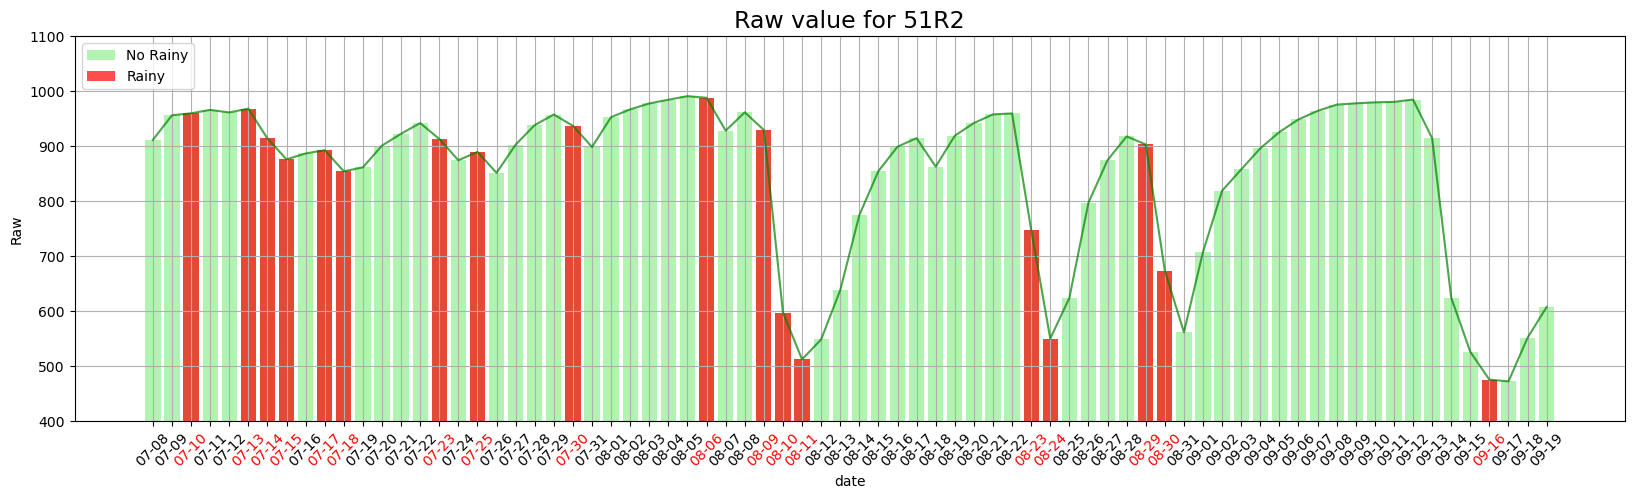

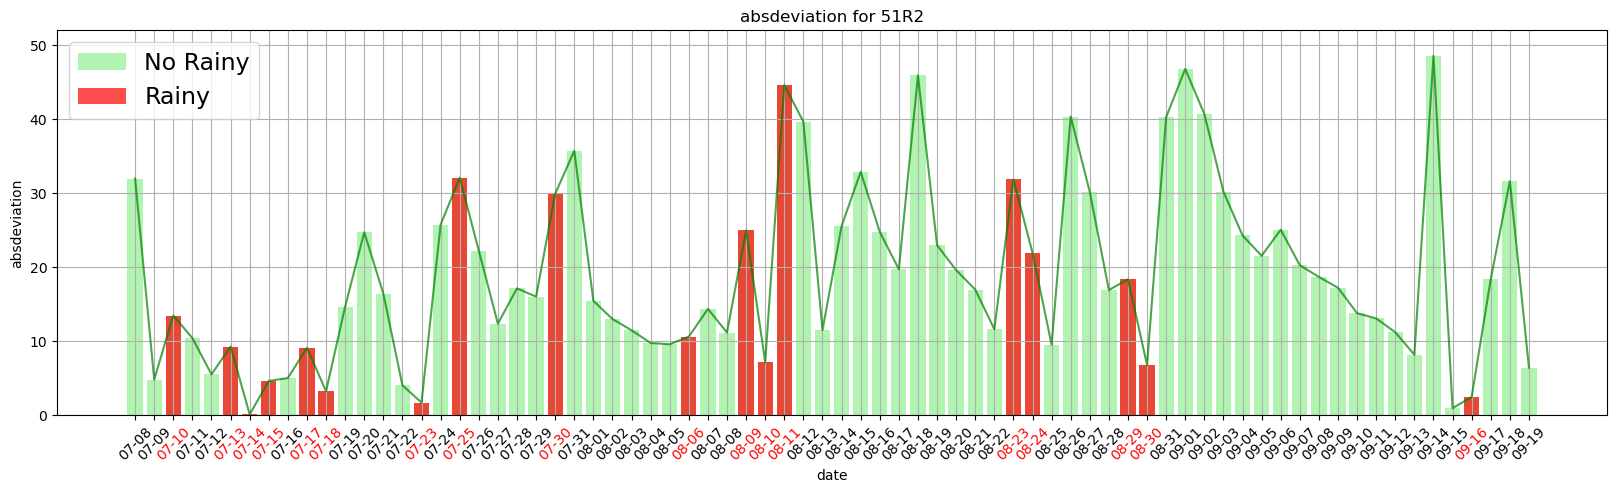

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def visualize_feeding_timeseries(base_file_name):
    df = pd.read_csv(f'./concatraw_12/{base_file_name}.csv')
    df1 = pd.read_csv(f'./concatraw_12/{base_file_name}_abs.csv')

    x = df['date'].values
    y = df['Raw'].values
    X = df1['date'].values
    Y = df1['AbsDeviation'].values

    vertical_line_x_values = ['07-04','07-05','07-07','07-10','07-13','07-14','07-15','07-17','07-18','07-23','07-25','07-30','08-06','08-09','08-10','08-11','08-23','08-24','08-29','08-30','09-16','09-20']
  
    plt.figure(figsize=(20,5))
    plt.plot(x,y, color='green', alpha=0.7)
    plt.bar(x, y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in x:
            idx = np.where(x == val)[0]
            if not watered_bar_drawn:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7, label='Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7)

    plt.ylim(400, 1100)
    plt.title('Raw value for 51R2',fontsize=17)
    plt.xlabel('date')
    plt.ylabel('Raw')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left')
    plt.show()

    plt.figure(figsize=(20,5))
    plt.plot(X,Y, color='green', alpha=0.7)
    plt.bar(X, Y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in X:
            idx = np.where(X == val)[0]
            if not watered_bar_drawn:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7, label='Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7)

    plt.ylim(0, 52)
    plt.title('absdeviation for 51R2')
    plt.xlabel('date')
    plt.ylabel('absdeviation')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

visualize_feeding_timeseries('51R2_79_forplot')


# 2. 토양수분센서 활용 물공급 구분

## watered 1뒤의 2시간 데이터 만들기

In [188]:
df = pd.read_csv('./concatraw_12/v1_43R2_79_com.csv')
# 'watered' 열에서 값이 1인 행의 인덱스 찾기
indices_of_ones = df.index[df['watered'] == 1].tolist()
# 각 인덱스에 대해 그 다음 4개 행의 'watered' 값을 1로 변경
for index in indices_of_ones:
    df.loc[index + 1:index + 4, 'watered'] = 1
# 변경된 데이터프레임 출력
print(df)
df.to_csv('./concatraw_12/v2_2hour_43R2_79_com.csv',index=False)

df = pd.read_csv('./concatraw_12/v1_43R1_79_com.csv')
# 'watered' 열에서 값이 1인 행의 인덱스 찾기
indices_of_ones = df.index[df['watered'] == 1].tolist()
# 각 인덱스에 대해 그 다음 4개 행의 'watered' 값을 1로 변경
for index in indices_of_ones:
    df.loc[index + 1:index + 4, 'watered'] = 1
# 변경된 데이터프레임 출력
print(df)
df.to_csv('./concatraw_12/v2_2hour_43R1_79_com.csv',index=False)

df = pd.read_csv('./concatraw_12/v1_40R1_79_com.csv')
# 'watered' 열에서 값이 1인 행의 인덱스 찾기
indices_of_ones = df.index[df['watered'] == 1].tolist()
# 각 인덱스에 대해 그 다음 4개 행의 'watered' 값을 1로 변경
for index in indices_of_ones:
    df.loc[index + 1:index + 4, 'watered'] = 1
# 변경된 데이터프레임 출력
print(df)
df.to_csv('./concatraw_12/v2_2hour_40R1_79_com.csv',index=False)

df = pd.read_csv('./concatraw_12/v1_42R1_79_com.csv')
# 'watered' 열에서 값이 1인 행의 인덱스 찾기
indices_of_ones = df.index[df['watered'] == 1].tolist()
# 각 인덱스에 대해 그 다음 4개 행의 'watered' 값을 1로 변경
for index in indices_of_ones:
    df.loc[index + 1:index + 4, 'watered'] = 1
# 변경된 데이터프레임 출력
print(df)
df.to_csv('./concatraw_12/v2_2hour_42R1_79_com.csv',index=False)

df = pd.read_csv('./concatraw_12/v1_51R1_79_com.csv')
# 'watered' 열에서 값이 1인 행의 인덱스 찾기
indices_of_ones = df.index[df['watered'] == 1].tolist()
# 각 인덱스에 대해 그 다음 4개 행의 'watered' 값을 1로 변경
for index in indices_of_ones:
    df.loc[index + 1:index + 4, 'watered'] = 1
# 변경된 데이터프레임 출력
print(df)
df.to_csv('./concatraw_12/v2_2hour_51R1_79_com.csv',index=False)

df = pd.read_csv('./concatraw_12/v1_51R2_79_com.csv')
# 'watered' 열에서 값이 1인 행의 인덱스 찾기
indices_of_ones = df.index[df['watered'] == 1].tolist()
# 각 인덱스에 대해 그 다음 4개 행의 'watered' 값을 1로 변경
for index in indices_of_ones:
    df.loc[index + 1:index + 4, 'watered'] = 1
# 변경된 데이터프레임 출력
print(df)
df.to_csv('./concatraw_12/v2_2hour_51R2_79_com.csv',index=False)

                     date  AbsDeviation-MedianFiltered  AbsDeviation  \
0     2023-07-08 11:39:46                       55.750         59.50   
1     2023-07-08 12:11:20                       53.875         55.75   
2     2023-07-08 12:42:55                       52.000         52.00   
3     2023-07-08 13:14:30                       41.500         41.50   
4     2023-07-08 13:46:02                       31.000         31.00   
...                   ...                          ...           ...   
2887  2023-09-16 14:28:53                        0.000          0.00   
2888  2023-09-16 15:00:26                        0.000          0.00   
2889  2023-09-16 15:32:00                        0.375          0.75   
2890  2023-09-16 16:03:34                        0.750          1.50   
2891  2023-09-16 16:35:09                        1.125          3.25   

      CenterCurve  Deviation-MedianFiltered  Deviation  Raw-MedianFiltered  \
0           883.0                    -59.50      -67.0   

## 산점도

### 데이터 만들기

In [197]:
def process_watered_files(suffix):
    df = pd.read_csv(f'./concatraw_12/{suffix}.csv')
    # 특정 날짜의 데이터를 수집
    dates = [
        '2023-07-27 07:43:21', '2023-07-27 08:14:53', '2023-07-27 08:46:26',
        '2023-07-27 09:17:59', '2023-07-27 09:49:31'
    ]
    # 수집된 데이터를 저장할 DataFrame 생성
    watered_df = pd.DataFrame()
    # 날짜별로 데이터를 추출하여 watered_df에 추가
    for date in dates:
        watered_df = watered_df.append(df[df['date'] == date])
    # 인덱스 리셋 후 저장
    watered_df.reset_index(drop=True, inplace=True)
    watered_df.to_csv(f'./concatraw_12/v2_extracted_watered_{suffix}.csv', index=False)
    # soilsensor 값 저장을 위한 리스트 생성
    soilsensor_values = watered_df['soilsensor'].tolist()
    print(soilsensor_values)
    # 'date' 값을 변환하여 저장
    data = {
        'date': [f'{date}-W' for date in dates],
        'soilsensor': soilsensor_values
    }
    df_1 = pd.DataFrame(data)
    # 결과 확인을 위한 인덱스 리셋
    df_1.reset_index(drop=True, inplace=True)
    # 최종 데이터프레임을 csv로 저장
    df_1.to_csv(f'./concatraw_12/v2_extracted_watered_{suffix}.csv', index=False)
# 함수 호출
process_watered_files('v2_2hour_43R2_79_com')

[666.0, 666.0, 668.0, 666.0, 664.0]


/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/3580096556.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/3580096556.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/3580096556.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/3580096556.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

In [3]:
def process_watered_files(suffix):
    df = pd.read_csv(f'./concatraw_12/{suffix}.csv')
    # 특정 날짜의 데이터를 수집
    dates = [
        '2023-08-04 07:39:31','2023-08-04 08:11:03','2023-08-04 08:42:35','2023-08-04 09:14:07','2023-08-04 09:45:38'
    ]
    # 수집된 데이터를 저장할 DataFrame 생성
    watered_df = pd.DataFrame()
    # 날짜별로 데이터를 추출하여 watered_df에 추가
    for date in dates:
        watered_df = watered_df.append(df[df['date'] == date])
    # 인덱스 리셋 후 저장
    watered_df.reset_index(drop=True, inplace=True)
    watered_df.to_csv(f'./concatraw_12/v2_extracted_unwatered_{suffix}.csv', index=False)
    # soilsensor 값 저장을 위한 리스트 생성
    soilsensor_values = watered_df['soilsensor'].tolist()
    print(soilsensor_values)
    # 'date' 값을 변환하여 저장
    data = {
        'date': [f'{date}-UW' for date in dates],
        'soilsensor': soilsensor_values
    }
    df_1 = pd.DataFrame(data)
    # 결과 확인을 위한 인덱스 리셋
    df_1.reset_index(drop=True, inplace=True)
    # 최종 데이터프레임을 csv로 저장
    df_1.to_csv(f'./concatraw_12/v2_extracted_unwatered_{suffix}.csv', index=False)
# 함수 호출
process_watered_files('v2_2hour_43R2_79_com')

[707.0, 707.0, 707.0, 707.5, 708.0]


/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/882931838.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/882931838.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/882931838.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/882931838.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

In [207]:
def process_watered_files(suffix):
    df = pd.read_csv(f'./concatraw_12/{suffix}.csv')
    # 특정 날짜의 데이터를 수집
    dates = [
        '2023-07-27 14:17:22','2023-07-27 14:48:39','2023-07-27 15:19:56','2023-07-27 15:51:12','2023-07-27 16:22:29'
    ]
    # 수집된 데이터를 저장할 DataFrame 생성
    watered_df = pd.DataFrame()
    # 날짜별로 데이터를 추출하여 watered_df에 추가
    for date in dates:
        watered_df = watered_df.append(df[df['date'] == date])
    # 인덱스 리셋 후 저장
    watered_df.reset_index(drop=True, inplace=True)
    watered_df.to_csv(f'./concatraw_12/v2_extracted_watered_{suffix}.csv', index=False)
    # soilsensor 값 저장을 위한 리스트 생성
    soilsensor_values = watered_df['soilsensor'].tolist()
    print(soilsensor_values)
    # 'date' 값을 변환하여 저장
    data = {
        'date': [f'{date}-W' for date in dates],
        'soilsensor': soilsensor_values
    }
    df_1 = pd.DataFrame(data)
    # 결과 확인을 위한 인덱스 리셋
    df_1.reset_index(drop=True, inplace=True)
    # 최종 데이터프레임을 csv로 저장
    df_1.to_csv(f'./concatraw_12/v2_extracted_watered_{suffix}.csv', index=False)
# 함수 호출
process_watered_files('v2_2hour_51R2_79_com')

[659.0, 659.0, 660.0, 660.0, 661.0]


/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/500182608.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/500182608.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/500182608.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/500182608.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

In [4]:
def process_watered_files(suffix):
    df = pd.read_csv(f'./concatraw_12/{suffix}.csv')
    # 특정 날짜의 데이터를 수집
    dates = [
        '2023-08-04 14:20:29','2023-08-04 14:51:47','2023-08-04 15:23:05','2023-08-04 15:54:23','2023-08-04 16:25:41'
    ]
    # 수집된 데이터를 저장할 DataFrame 생성
    watered_df = pd.DataFrame()
    # 날짜별로 데이터를 추출하여 watered_df에 추가
    for date in dates:
        watered_df = watered_df.append(df[df['date'] == date])
    # 인덱스 리셋 후 저장
    watered_df.reset_index(drop=True, inplace=True)
    watered_df.to_csv(f'./concatraw_12/v2_extracted_unwatered_{suffix}.csv', index=False)
    # soilsensor 값 저장을 위한 리스트 생성
    soilsensor_values = watered_df['soilsensor'].tolist()
    print(soilsensor_values)
    # 'date' 값을 변환하여 저장
    data = {
        'date': [f'{date}-UW' for date in dates],
        'soilsensor': soilsensor_values
    }
    df_1 = pd.DataFrame(data)
    # 결과 확인을 위한 인덱스 리셋
    df_1.reset_index(drop=True, inplace=True)
    # 최종 데이터프레임을 csv로 저장
    df_1.to_csv(f'./concatraw_12/v2_extracted_unwatered_{suffix}.csv', index=False)
# 함수 호출
process_watered_files('v2_2hour_51R2_79_com')

[714.0, 712.0, 710.0, 708.0, 706.0]


/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/3640151791.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/3640151791.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/3640151791.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/3640151791.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

In [209]:
def process_watered_files(suffix):
    df = pd.read_csv(f'./concatraw_12/{suffix}.csv')
    # 특정 날짜의 데이터를 수집
    dates = [
        '2023-08-13 12:17:09','2023-08-13 12:48:29','2023-08-13 13:19:49','2023-08-13 13:51:10','2023-08-13 14:22:31'
    ]
    # 수집된 데이터를 저장할 DataFrame 생성
    watered_df = pd.DataFrame()
    # 날짜별로 데이터를 추출하여 watered_df에 추가
    for date in dates:
        watered_df = watered_df.append(df[df['date'] == date])
    # 인덱스 리셋 후 저장
    watered_df.reset_index(drop=True, inplace=True)
    watered_df.to_csv(f'./concatraw_12/v2_extracted_watered_{suffix}.csv', index=False)
    # soilsensor 값 저장을 위한 리스트 생성
    soilsensor_values = watered_df['soilsensor'].tolist()
    print(soilsensor_values)
    # 'date' 값을 변환하여 저장
    data = {
        'date': [f'{date}-W' for date in dates],
        'soilsensor': soilsensor_values
    }
    df_1 = pd.DataFrame(data)
    # 결과 확인을 위한 인덱스 리셋
    df_1.reset_index(drop=True, inplace=True)
    # 최종 데이터프레임을 csv로 저장
    df_1.to_csv(f'./concatraw_12/v2_extracted_watered_{suffix}.csv', index=False)
# 함수 호출
process_watered_files('v2_2hour_40R1_79_com')

[672.0, 672.0, 673.0, 674.0, 675.0]


/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/3179828571.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/3179828571.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/3179828571.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/3179828571.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

In [5]:
def process_watered_files(suffix):
    df = pd.read_csv(f'./concatraw_12/{suffix}.csv')
    # 특정 날짜의 데이터를 수집
    dates = [
        '2023-09-11 21:09:22','2023-09-11 21:40:28','2023-09-11 22:11:34','2023-09-11 22:42:39','2023-09-11 23:13:45'
    ]
    # 수집된 데이터를 저장할 DataFrame 생성
    watered_df = pd.DataFrame()
    # 날짜별로 데이터를 추출하여 watered_df에 추가
    for date in dates:
        watered_df = watered_df.append(df[df['date'] == date])
    # 인덱스 리셋 후 저장
    watered_df.reset_index(drop=True, inplace=True)
    watered_df.to_csv(f'./concatraw_12/v2_extracted_unwatered_{suffix}.csv', index=False)
    # soilsensor 값 저장을 위한 리스트 생성
    soilsensor_values = watered_df['soilsensor'].tolist()
    print(soilsensor_values)
    # 'date' 값을 변환하여 저장
    data = {
        'date': [f'{date}-UW' for date in dates],
        'soilsensor': soilsensor_values
    }
    df_1 = pd.DataFrame(data)
    # 결과 확인을 위한 인덱스 리셋
    df_1.reset_index(drop=True, inplace=True)
    # 최종 데이터프레임을 csv로 저장
    df_1.to_csv(f'./concatraw_12/v2_extracted_unwatered_{suffix}.csv', index=False)
# 함수 호출
process_watered_files('v2_2hour_40R1_79_com')

[735.5, 735.5, 733.0, 734.0, 736.0]


/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/2833726060.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/2833726060.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/2833726060.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/2833726060.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

In [211]:
def process_watered_files(suffix):
    df = pd.read_csv(f'./concatraw_12/{suffix}.csv')
    # 특정 날짜의 데이터를 수집
    dates = [
        '2023-07-19 17:39:38','2023-07-19 18:11:13','2023-07-19 18:42:49','2023-07-19 19:14:25','2023-07-19 19:46:00'    
    ]
    # 수집된 데이터를 저장할 DataFrame 생성
    watered_df = pd.DataFrame()
    # 날짜별로 데이터를 추출하여 watered_df에 추가
    for date in dates:
        watered_df = watered_df.append(df[df['date'] == date])
    # 인덱스 리셋 후 저장
    watered_df.reset_index(drop=True, inplace=True)
    watered_df.to_csv(f'./concatraw_12/v2_extracted_watered_{suffix}.csv', index=False)
    # soilsensor 값 저장을 위한 리스트 생성
    soilsensor_values = watered_df['soilsensor'].tolist()
    print(soilsensor_values)
    # 'date' 값을 변환하여 저장
    data = {
        'date': [f'{date}-W' for date in dates],
        'soilsensor': soilsensor_values
    }
    df_1 = pd.DataFrame(data)
    # 결과 확인을 위한 인덱스 리셋
    df_1.reset_index(drop=True, inplace=True)
    # 최종 데이터프레임을 csv로 저장
    df_1.to_csv(f'./concatraw_12/v2_extracted_watered_{suffix}.csv', index=False)
# 함수 호출
process_watered_files('v2_2hour_42R1_79_com')

[562.0, 562.0, 562.0, 562.0, 562.0]


/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/1493754934.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/1493754934.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/1493754934.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/1493754934.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

In [6]:
def process_watered_files(suffix):
    df = pd.read_csv(f'./concatraw_12/{suffix}.csv')
    # 특정 날짜의 데이터를 수집
    dates = [
        '2023-08-06 07:20:49','2023-08-06 07:52:23','2023-08-06 08:23:58','2023-08-06 08:55:32','2023-08-06 09:27:06'    
    ]
    # 수집된 데이터를 저장할 DataFrame 생성
    watered_df = pd.DataFrame()
    # 날짜별로 데이터를 추출하여 watered_df에 추가
    for date in dates:
        watered_df = watered_df.append(df[df['date'] == date])
    # 인덱스 리셋 후 저장
    watered_df.reset_index(drop=True, inplace=True)
    watered_df.to_csv(f'./concatraw_12/v2_extracted_unwatered_{suffix}.csv', index=False)
    # soilsensor 값 저장을 위한 리스트 생성
    soilsensor_values = watered_df['soilsensor'].tolist()
    print(soilsensor_values)
    # 'date' 값을 변환하여 저장
    data = {
        'date': [f'{date}-UW' for date in dates],
        'soilsensor': soilsensor_values
    }
    df_1 = pd.DataFrame(data)
    # 결과 확인을 위한 인덱스 리셋
    df_1.reset_index(drop=True, inplace=True)
    # 최종 데이터프레임을 csv로 저장
    df_1.to_csv(f'./concatraw_12/v2_extracted_unwatered_{suffix}.csv', index=False)
# 함수 호출
process_watered_files('v2_2hour_42R1_79_com')

[638.0, 638.0, 638.0, 638.0, 638.0]


/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/2463896769.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/2463896769.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/2463896769.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  watered_df = watered_df.append(df[df['date'] == date])
/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_61472/2463896769.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

### 산점도 그리기

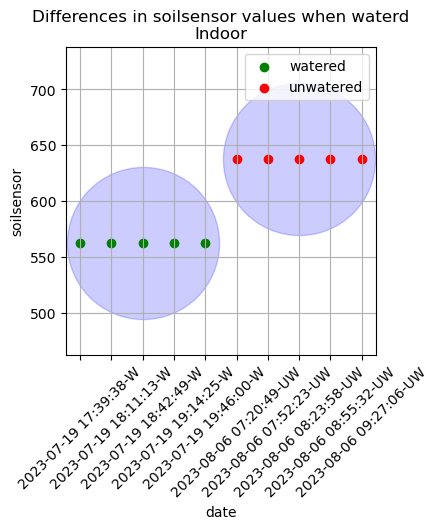

In [107]:
## 4. 산점도 그래프
def visualize_feed_scatter(base_file_name):
    ##R 값에 대해 반복문을 수행
    ##CSV 파일에서 비오는 날과 먹이를 준 날의 데이터를 읽음
    df = pd.read_csv(f'./concatraw_12/v2_extracted_watered_{base_file_name}.csv')
    df_feed = pd.read_csv(f'./concatraw_12/v2_extracted_unwatered_{base_file_name}.csv')

    ##날짜와 값을 추출
    x = df['date'].values
    y = df['soilsensor'].values
    X = df_feed['date'].values
    Y = df_feed['soilsensor'].values

    ##평균 계산
    mean_y = round(sum(y)/len(y))
    mean_Y = round(sum(Y)/len(Y))

    ##새로운 그래프 생성
    plt.figure(figsize=(4,4))

    ##산점도의 원의 반지름
    circle_radius = 12

    ##큰 원으로 평균 값을 표시 (현재 4개 기준임)
    plt.scatter([2, 7], [mean_y, mean_Y], s=circle_radius*1000, color='blue', alpha=0.2)

    ##생목과 고사목 데이터를 그림
    plt.scatter(x,y, alpha=1.0, c='green', label='watered')
    plt.scatter(X,Y, alpha=1.0, c='red', label='unwatered')

    ##y축 범위 설정
    plt.ylim(mean_y-100, mean_Y+100)

    ##제목 및 라벨 설정
    plt.title(f'Differences in soilsensor values when waterd\nIndoor')
    plt.xlabel('date')
    plt.ylabel('soilsensor')

    ##x축 라벨 회전
    plt.xticks(rotation=45)
    ##그리드 추가
    plt.grid()
    ##범례 추가
    plt.legend()
    ##그래프 출력
    plt.show()
visualize_feed_scatter('v2_2hour_42R1_79_com')

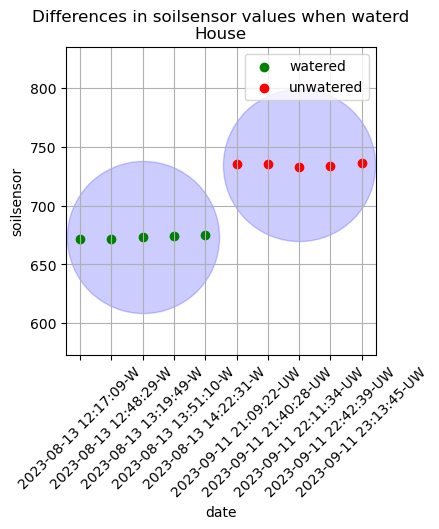

In [108]:
## 4. 산점도 그래프
def visualize_feed_scatter(base_file_name):
    ##R 값에 대해 반복문을 수행
    ##CSV 파일에서 비오는 날과 먹이를 준 날의 데이터를 읽음
    df = pd.read_csv(f'./concatraw_12/v2_extracted_watered_{base_file_name}.csv')
    df_feed = pd.read_csv(f'./concatraw_12/v2_extracted_unwatered_{base_file_name}.csv')

    ##날짜와 값을 추출
    x = df['date'].values
    y = df['soilsensor'].values
    X = df_feed['date'].values
    Y = df_feed['soilsensor'].values

    ##평균 계산
    mean_y = round(sum(y)/len(y))
    mean_Y = round(sum(Y)/len(Y))

    ##새로운 그래프 생성
    plt.figure(figsize=(4,4))

    ##산점도의 원의 반지름
    circle_radius = 12

    ##큰 원으로 평균 값을 표시 (현재 4개 기준임)
    plt.scatter([2, 7], [mean_y, mean_Y], s=circle_radius*1000, color='blue', alpha=0.2)

    ##생목과 고사목 데이터를 그림
    plt.scatter(x,y, alpha=1.0, c='green', label='watered')
    plt.scatter(X,Y, alpha=1.0, c='red', label='unwatered')

    ##y축 범위 설정
    plt.ylim(mean_y-100, mean_Y+100)

    ##제목 및 라벨 설정
    plt.title(f'Differences in soilsensor values when waterd\nHouse')
    plt.xlabel('date')
    plt.ylabel('soilsensor')

    ##x축 라벨 회전
    plt.xticks(rotation=45)
    ##그리드 추가
    plt.grid()
    ##범례 추가
    plt.legend()
    ##그래프 출력
    plt.show()
visualize_feed_scatter('v2_2hour_40R1_79_com')

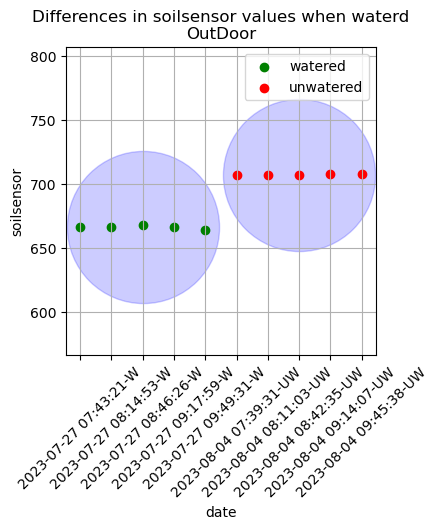

In [110]:
## 4. 산점도 그래프
def visualize_feed_scatter(base_file_name):
    ##R 값에 대해 반복문을 수행
    ##CSV 파일에서 비오는 날과 먹이를 준 날의 데이터를 읽음
    df = pd.read_csv(f'./concatraw_12/v2_extracted_watered_{base_file_name}.csv')
    df_feed = pd.read_csv(f'./concatraw_12/v2_extracted_unwatered_{base_file_name}.csv')

    ##날짜와 값을 추출
    x = df['date'].values
    y = df['soilsensor'].values
    X = df_feed['date'].values
    Y = df_feed['soilsensor'].values

    ##평균 계산
    mean_y = round(sum(y)/len(y))
    mean_Y = round(sum(Y)/len(Y))

    ##새로운 그래프 생성
    plt.figure(figsize=(4,4))

    ##산점도의 원의 반지름
    circle_radius = 12

    ##큰 원으로 평균 값을 표시 (현재 4개 기준임)
    plt.scatter([2, 7], [mean_y, mean_Y], s=circle_radius*1000, color='blue', alpha=0.2)

    ##생목과 고사목 데이터를 그림
    plt.scatter(x,y, alpha=1.0, c='green', label='watered')
    plt.scatter(X,Y, alpha=1.0, c='red', label='unwatered')

    ##y축 범위 설정
    plt.ylim(mean_y-100, mean_Y+100)

    ##제목 및 라벨 설정
    plt.title(f'Differences in soilsensor values when waterd\nOutDoor')
    plt.xlabel('date')
    plt.ylabel('soilsensor')

    ##x축 라벨 회전
    plt.xticks(rotation=45)
    ##그리드 추가
    plt.grid()
    ##범례 추가
    plt.legend()
    ##그래프 출력
    plt.show()
visualize_feed_scatter('v2_2hour_43R2_79_com')

## 주성분 선정

### 40R1

correlation :
 soilsensor                     1.000000
CenterCurve                    0.458714
Raw-MedianFiltered             0.419042
Raw                            0.414278
moisture                      -0.022781
Deviation                     -0.026644
Deviation-MedianFiltered      -0.029957
AbsDeviation                  -0.036157
AbsDeviation-MedianFiltered   -0.040185
watered                       -0.124122
temperature                   -0.202659
Name: soilsensor, dtype: float64
                        Feature  Correlation
0                    soilsensor     1.000000
1                   CenterCurve     0.458714
2            Raw-MedianFiltered     0.419042
3                           Raw     0.414278
4                   temperature     0.202659
5                       watered     0.124122
6   AbsDeviation-MedianFiltered     0.040185
7                  AbsDeviation     0.036157
8      Deviation-MedianFiltered     0.029957
9                     Deviation     0.026644
10               

/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/2064218066.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


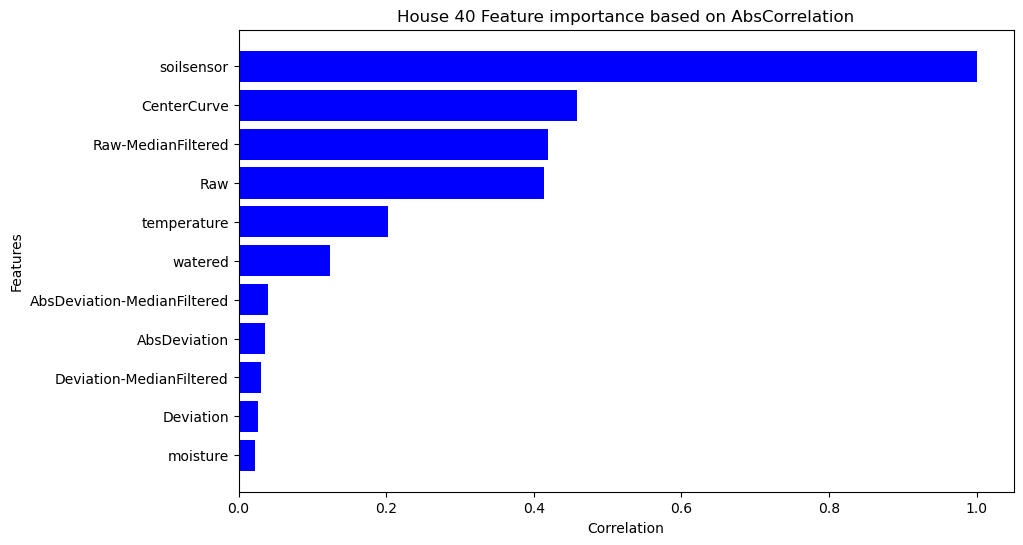

In [225]:
# 'Raw' 변수와 다른 변수들 사이의 상관계수를 계산
df = pd.read_csv('./concatraw_12/v2_2hour_40R1_79_com.csv')
correlation_matrix = df.corr()
raw_correlation = correlation_matrix['soilsensor'].sort_values(ascending=False)

## 상관계수의 절댓값을 계산
abs_raw_correlation = raw_correlation.abs()
## 리스트 형태로 저장
abs_raw_correlation_list = abs_raw_correlation.tolist()
## 딕셔너리 형태로 저장
abs_raw_correlation_dict = abs_raw_correlation.to_dict()
print('correlation :\n',raw_correlation)

##내림차순으로
sorted_dict = {k: v for k, v in sorted(abs_raw_correlation_dict.items(), key=lambda item: item[1], reverse=True)}
##데이터프레임으로
abs_raw_correlation_df = pd.DataFrame(list(sorted_dict.items()), columns=['Feature', 'Correlation'])
print(abs_raw_correlation_df)

plt.figure(figsize=(10, 6))
plt.barh(abs_raw_correlation_df['Feature'], abs_raw_correlation_df['Correlation'], color='blue')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('House 40 Feature importance based on AbsCorrelation')
plt.gca().invert_yaxis()
plt.show()

                       Feature  Importance
0                  CenterCurve    0.601132
1                  temperature    0.103250
2                     moisture    0.066910
3  AbsDeviation-MedianFiltered    0.048716
4           Raw-MedianFiltered    0.045715
5                    Deviation    0.034565
6     Deviation-MedianFiltered    0.034361
7                          Raw    0.027087
8                 AbsDeviation    0.020907
9                      watered    0.017357


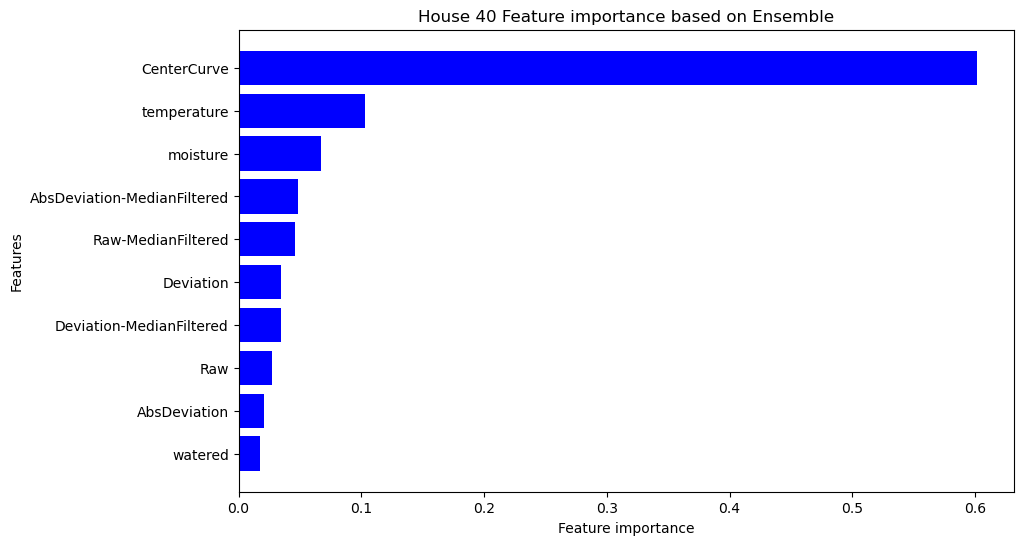

In [218]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

df = pd.read_csv('./concatraw_12/v2_2hour_40R1_79_com.csv')
df = df.drop(['date'], axis=1)

##결측치 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(df))
data_imputed.columns = df.columns

X = data_imputed.drop('soilsensor', axis=1)
y = data_imputed['soilsensor']

##모델 생성 및 훈련
model = RandomForestRegressor()
model.fit(X, y)

##특징 중요도 추출
importance = model.feature_importances_

##특징 중요도를 딕셔너리 형태로 저장
feature_importance_dict = {}
for i, col in enumerate(X.columns):
    feature_importance_dict[col] = importance[i]

##내림차순으로
sorted_dict = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}
##데이터프레임으로
feature_importance_dict_df = pd.DataFrame(list(sorted_dict.items()), columns=['Feature', 'Importance'])
print(feature_importance_dict_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_dict_df['Feature'], feature_importance_dict_df['Importance'], color='blue')
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title('House 40 Feature importance based on Ensemble')
plt.gca().invert_yaxis()
plt.show()

Num Features: 3
Feature Ranking: [4 5 1 8 2 3 6 1 7 1]


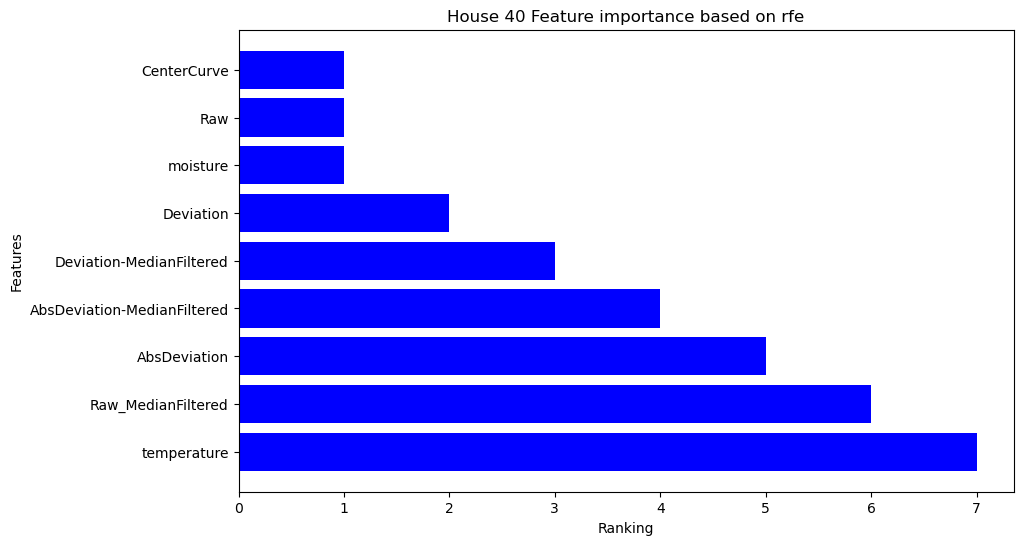

In [220]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

df = pd.read_csv("./concatraw_12/v2_2hour_40R1_79_com.csv")
df = df.drop(['date'],axis=1)

##결측치 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(df))
data_imputed.columns = df.columns

X = data_imputed.drop('soilsensor', axis=1)
y = data_imputed['soilsensor']
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

##'feature_names'는 원래 X 데이터셋의 특징 이름 리스트
feature_names = ['AbsDeviation-MedianFiltered'
                 ,'AbsDeviation'
                 ,'CenterCurve'
                 ,'Deviation-MedianFiltered'
                 ,'Deviation'
                 ,'Deviation-MedianFiltered'
                 ,'Raw_MedianFiltered'
                 ,'Raw'
                 ,'temperature'
                 ,'moisture'
                 ,'soilsensor'
                 ,'watered']

## 딕셔너리로 저장
rfe_dict = {}
for i in range(len(fit.ranking_)):
    rfe_dict[feature_names[i]] = fit.ranking_[i]

## 딕셔너리를 오름차순으로 정렬 (순위가 낮을수록 좋은 특징)
sorted_rfe_dict = {k: v for k, v in sorted(rfe_dict.items(), key=lambda item: item[1])}

## 데이터프레임으로 변환
rfe_df = pd.DataFrame(list(sorted_rfe_dict.items()), columns=['Feature', 'Ranking'])

## 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.barh(rfe_df['Feature'], rfe_df['Ranking'], color='blue')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.title('House 40 Feature importance based on rfe')
## y축을 역순으로 하여 상단에 중요한 데이터가 오도록
plt.gca().invert_yaxis()
plt.show()

In [221]:
import statsmodels.api as sm

##5. p-value를 통하여
df = pd.read_csv("./concatraw_12/v2_2hour_40R1_79_com.csv")
df = df.drop(['date'],axis=1)

##결측치 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(df))
data_imputed.columns = df.columns

## 독립변수, 종속변수 설정
X = data_imputed.drop(['soilsensor'], axis=1)
y = data_imputed['soilsensor']

## 선형 모델에 필요한 상수항을 추가
X = sm.add_constant(X)

## OLS (Ordinary Least Squares) 모델 적합
model = sm.OLS(y, X).fit()

## 결과 출력 (p-value 포함)
print(model.summary())

## 특징 선택 (p-value 기준, 여기서는 0.05로 설정)
selected_features = []
for i in range(len(X.columns)):
    if model.pvalues[i] < 0.05:
        selected_features.append(X.columns[i])

# 선택된 특징 출력
print("House 40 Selected Features based on p-value: ", selected_features)

                            OLS Regression Results                            
Dep. Variable:             soilsensor   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     128.8
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          6.11e-209
Time:                        11:29:16   Log-Likelihood:                -19884.
No. Observations:                3376   AIC:                         3.979e+04
Df Residuals:                    3366   BIC:                         3.985e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### 42R1

correlation :
 soilsensor                     1.000000
temperature                    0.387746
Raw-MedianFiltered             0.159684
Raw                            0.158022
CenterCurve                    0.147056
Deviation-MedianFiltered       0.087066
Deviation                      0.086027
watered                        0.025224
AbsDeviation-MedianFiltered    0.003305
AbsDeviation                   0.003123
moisture                      -0.282715
Name: soilsensor, dtype: float64
                        Feature  Correlation
0                    soilsensor     1.000000
1                   temperature     0.387746
2                      moisture     0.282715
3            Raw-MedianFiltered     0.159684
4                           Raw     0.158022
5                   CenterCurve     0.147056
6      Deviation-MedianFiltered     0.087066
7                     Deviation     0.086027
8                       watered     0.025224
9   AbsDeviation-MedianFiltered     0.003305
10               

/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/742138909.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


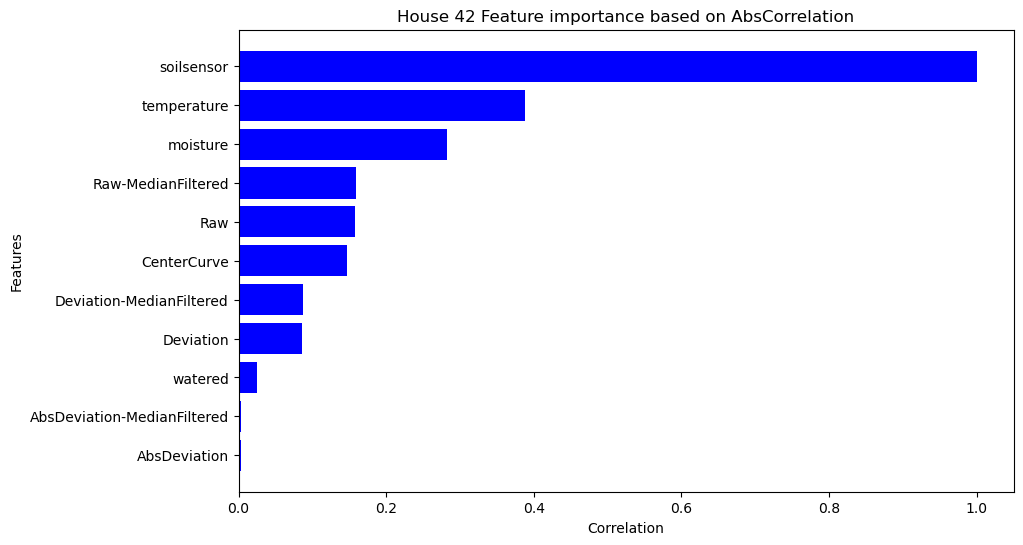

In [222]:
# 'Raw' 변수와 다른 변수들 사이의 상관계수를 계산
df = pd.read_csv('./concatraw_12/v2_2hour_42R1_79_com.csv')
correlation_matrix = df.corr()
raw_correlation = correlation_matrix['soilsensor'].sort_values(ascending=False)

## 상관계수의 절댓값을 계산
abs_raw_correlation = raw_correlation.abs()
## 리스트 형태로 저장
abs_raw_correlation_list = abs_raw_correlation.tolist()
## 딕셔너리 형태로 저장
abs_raw_correlation_dict = abs_raw_correlation.to_dict()
print('correlation :\n',raw_correlation)

##내림차순으로
sorted_dict = {k: v for k, v in sorted(abs_raw_correlation_dict.items(), key=lambda item: item[1], reverse=True)}
##데이터프레임으로
abs_raw_correlation_df = pd.DataFrame(list(sorted_dict.items()), columns=['Feature', 'Correlation'])
print(abs_raw_correlation_df)

plt.figure(figsize=(10, 6))
plt.barh(abs_raw_correlation_df['Feature'], abs_raw_correlation_df['Correlation'], color='blue')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('House 42 Feature importance based on AbsCorrelation')
plt.gca().invert_yaxis()
plt.show()

                       Feature  Importance
0                  CenterCurve    0.327736
1                  temperature    0.283308
2           Raw-MedianFiltered    0.160451
3                     moisture    0.128675
4                          Raw    0.073226
5  AbsDeviation-MedianFiltered    0.008607
6                 AbsDeviation    0.006756
7     Deviation-MedianFiltered    0.005070
8                    Deviation    0.004945
9                      watered    0.001225


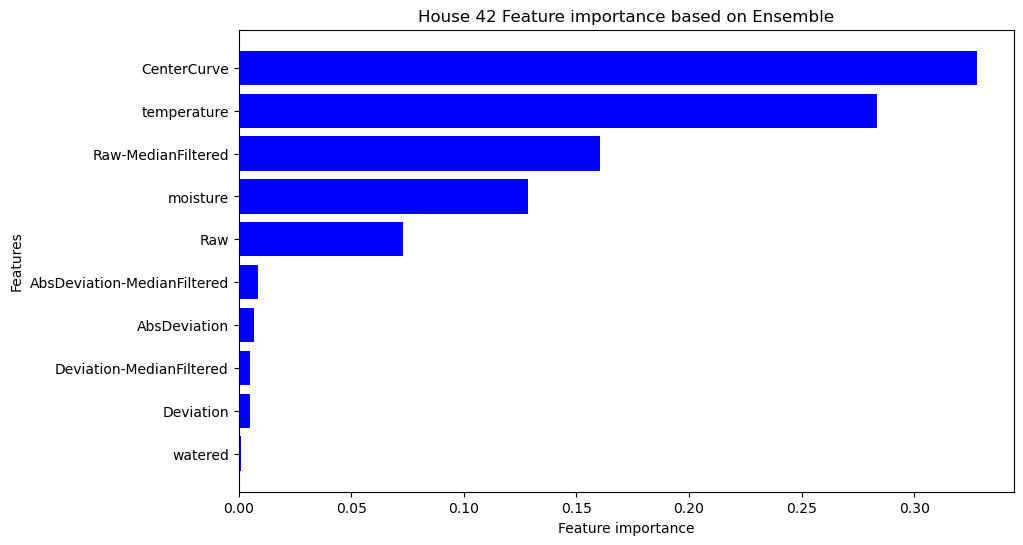

In [223]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

df = pd.read_csv('./concatraw_12/v2_2hour_42R1_79_com.csv')
df = df.drop(['date'], axis=1)

##결측치 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(df))
data_imputed.columns = df.columns

X = data_imputed.drop('soilsensor', axis=1)
y = data_imputed['soilsensor']

##모델 생성 및 훈련
model = RandomForestRegressor()
model.fit(X, y)

##특징 중요도 추출
importance = model.feature_importances_

##특징 중요도를 딕셔너리 형태로 저장
feature_importance_dict = {}
for i, col in enumerate(X.columns):
    feature_importance_dict[col] = importance[i]

##내림차순으로
sorted_dict = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}
##데이터프레임으로
feature_importance_dict_df = pd.DataFrame(list(sorted_dict.items()), columns=['Feature', 'Importance'])
print(feature_importance_dict_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_dict_df['Feature'], feature_importance_dict_df['Importance'], color='blue')
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title('House 42 Feature importance based on Ensemble')
plt.gca().invert_yaxis()
plt.show()

Num Features: 3
Feature Ranking: [5 4 1 7 1 1 8 2 6 3]


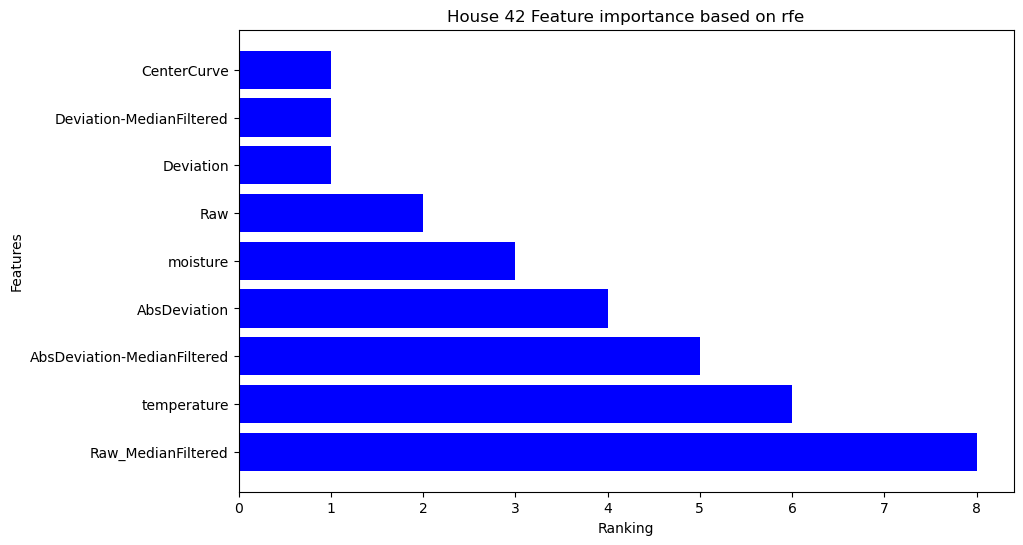

In [226]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

df = pd.read_csv("./concatraw_12/v2_2hour_42R1_79_com.csv")
df = df.drop(['date'],axis=1)

##결측치 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(df))
data_imputed.columns = df.columns

X = data_imputed.drop('soilsensor', axis=1)
y = data_imputed['soilsensor']
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

##'feature_names'는 원래 X 데이터셋의 특징 이름 리스트
feature_names = ['AbsDeviation-MedianFiltered'
                 ,'AbsDeviation'
                 ,'CenterCurve'
                 ,'Deviation-MedianFiltered'
                 ,'Deviation'
                 ,'Deviation-MedianFiltered'
                 ,'Raw_MedianFiltered'
                 ,'Raw'
                 ,'temperature'
                 ,'moisture'
                 ,'soilsensor'
                 ,'watered']

## 딕셔너리로 저장
rfe_dict = {}
for i in range(len(fit.ranking_)):
    rfe_dict[feature_names[i]] = fit.ranking_[i]

## 딕셔너리를 오름차순으로 정렬 (순위가 낮을수록 좋은 특징)
sorted_rfe_dict = {k: v for k, v in sorted(rfe_dict.items(), key=lambda item: item[1])}

## 데이터프레임으로 변환
rfe_df = pd.DataFrame(list(sorted_rfe_dict.items()), columns=['Feature', 'Ranking'])

## 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.barh(rfe_df['Feature'], rfe_df['Ranking'], color='blue')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.title('House 42 Feature importance based on rfe')
## y축을 역순으로 하여 상단에 중요한 데이터가 오도록
plt.gca().invert_yaxis()
plt.show()

In [227]:
import statsmodels.api as sm

##5. p-value를 통하여
df = pd.read_csv("./concatraw_12/v2_2hour_42R1_79_com.csv")
df = df.drop(['date'],axis=1)

##결측치 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(df))
data_imputed.columns = df.columns

## 독립변수, 종속변수 설정
X = data_imputed.drop(['soilsensor'], axis=1)
y = data_imputed['soilsensor']

## 선형 모델에 필요한 상수항을 추가
X = sm.add_constant(X)

## OLS (Ordinary Least Squares) 모델 적합
model = sm.OLS(y, X).fit()

## 결과 출력 (p-value 포함)
print(model.summary())

## 특징 선택 (p-value 기준, 여기서는 0.05로 설정)
selected_features = []
for i in range(len(X.columns)):
    if model.pvalues[i] < 0.05:
        selected_features.append(X.columns[i])

# 선택된 특징 출력
print("House 42 Selected Features based on p-value: ", selected_features)

                            OLS Regression Results                            
Dep. Variable:             soilsensor   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          8.17e-171
Time:                        11:32:05   Log-Likelihood:                -17314.
No. Observations:                3362   AIC:                         3.465e+04
Df Residuals:                    3352   BIC:                         3.471e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### 43R2

correlation :
 soilsensor                     1.000000
AbsDeviation-MedianFiltered    0.189989
AbsDeviation                   0.177215
Deviation                      0.047101
Deviation-MedianFiltered       0.046343
moisture                      -0.038403
watered                       -0.226861
temperature                   -0.318412
Raw                           -0.625855
Raw-MedianFiltered            -0.630255
CenterCurve                   -0.655545
Name: soilsensor, dtype: float64
                        Feature  Correlation
0                    soilsensor     1.000000
1                   CenterCurve     0.655545
2            Raw-MedianFiltered     0.630255
3                           Raw     0.625855
4                   temperature     0.318412
5                       watered     0.226861
6   AbsDeviation-MedianFiltered     0.189989
7                  AbsDeviation     0.177215
8                     Deviation     0.047101
9      Deviation-MedianFiltered     0.046343
10               

/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/2404716850.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


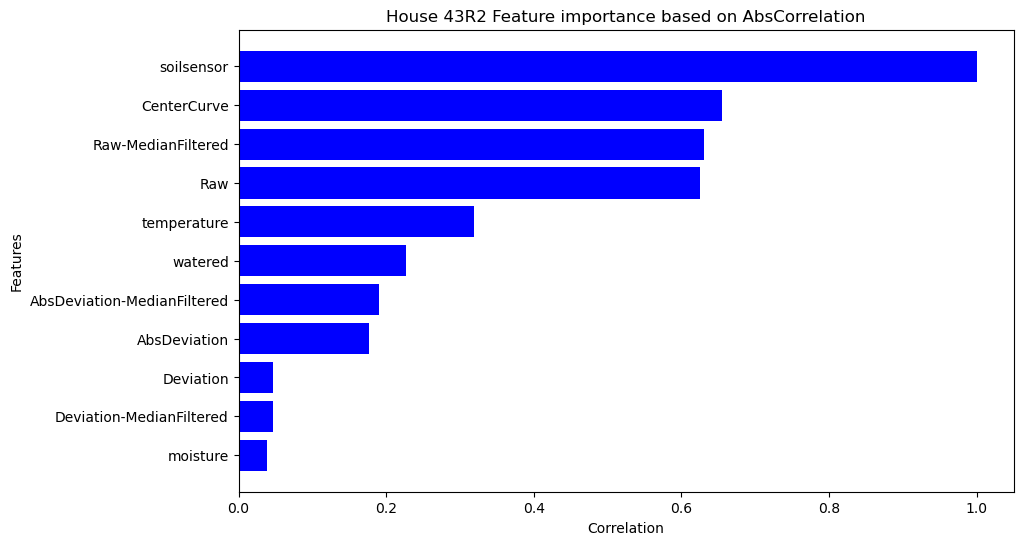

In [228]:
# 'Raw' 변수와 다른 변수들 사이의 상관계수를 계산
df = pd.read_csv('./concatraw_12/v2_2hour_43R2_79_com.csv')
correlation_matrix = df.corr()
raw_correlation = correlation_matrix['soilsensor'].sort_values(ascending=False)

## 상관계수의 절댓값을 계산
abs_raw_correlation = raw_correlation.abs()
## 리스트 형태로 저장
abs_raw_correlation_list = abs_raw_correlation.tolist()
## 딕셔너리 형태로 저장
abs_raw_correlation_dict = abs_raw_correlation.to_dict()
print('correlation :\n',raw_correlation)

##내림차순으로
sorted_dict = {k: v for k, v in sorted(abs_raw_correlation_dict.items(), key=lambda item: item[1], reverse=True)}
##데이터프레임으로
abs_raw_correlation_df = pd.DataFrame(list(sorted_dict.items()), columns=['Feature', 'Correlation'])
print(abs_raw_correlation_df)

plt.figure(figsize=(10, 6))
plt.barh(abs_raw_correlation_df['Feature'], abs_raw_correlation_df['Correlation'], color='blue')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('House 43R2 Feature importance based on AbsCorrelation')
plt.gca().invert_yaxis()
plt.show()

                       Feature  Importance
0                  CenterCurve    0.664353
1                  temperature    0.147622
2                     moisture    0.076567
3           Raw-MedianFiltered    0.026795
4                          Raw    0.023463
5     Deviation-MedianFiltered    0.020724
6  AbsDeviation-MedianFiltered    0.014737
7                    Deviation    0.011503
8                 AbsDeviation    0.009973
9                      watered    0.004262


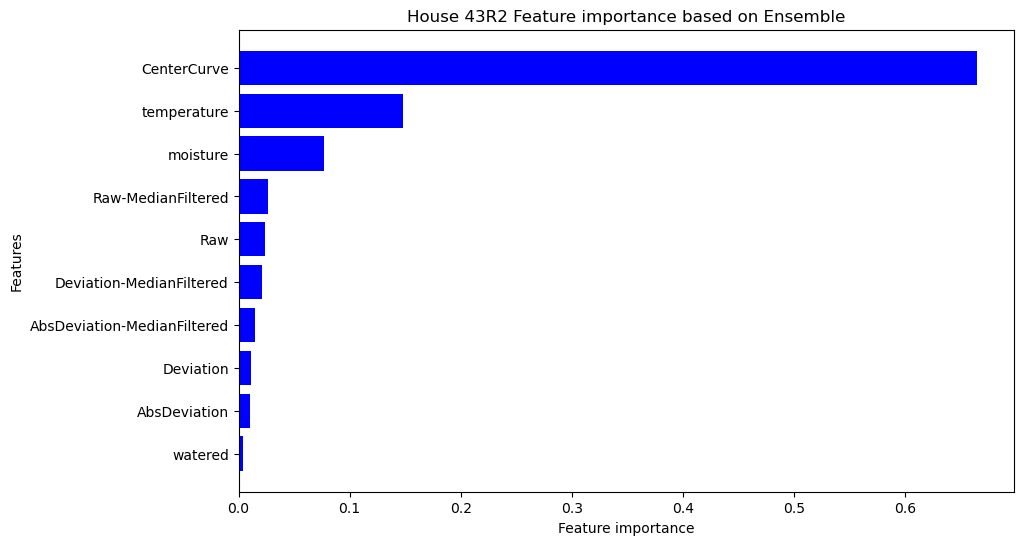

In [229]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

df = pd.read_csv('./concatraw_12/v2_2hour_43R2_79_com.csv')
df = df.drop(['date'], axis=1)

##결측치 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(df))
data_imputed.columns = df.columns

X = data_imputed.drop('soilsensor', axis=1)
y = data_imputed['soilsensor']

##모델 생성 및 훈련
model = RandomForestRegressor()
model.fit(X, y)

##특징 중요도 추출
importance = model.feature_importances_

##특징 중요도를 딕셔너리 형태로 저장
feature_importance_dict = {}
for i, col in enumerate(X.columns):
    feature_importance_dict[col] = importance[i]

##내림차순으로
sorted_dict = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}
##데이터프레임으로
feature_importance_dict_df = pd.DataFrame(list(sorted_dict.items()), columns=['Feature', 'Importance'])
print(feature_importance_dict_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_dict_df['Feature'], feature_importance_dict_df['Importance'], color='blue')
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title('House 43R2 Feature importance based on Ensemble')
plt.gca().invert_yaxis()
plt.show()

Num Features: 3
Feature Ranking: [1 1 5 4 3 6 8 2 7 1]


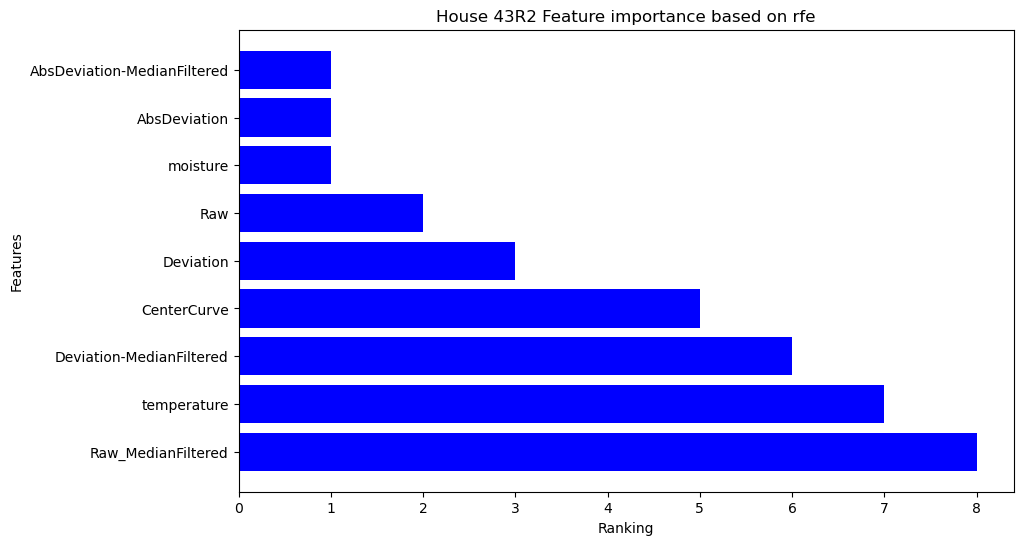

In [230]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

df = pd.read_csv("./concatraw_12/v2_2hour_43R2_79_com.csv")
df = df.drop(['date'],axis=1)

##결측치 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(df))
data_imputed.columns = df.columns

X = data_imputed.drop('soilsensor', axis=1)
y = data_imputed['soilsensor']
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

##'feature_names'는 원래 X 데이터셋의 특징 이름 리스트
feature_names = ['AbsDeviation-MedianFiltered'
                 ,'AbsDeviation'
                 ,'CenterCurve'
                 ,'Deviation-MedianFiltered'
                 ,'Deviation'
                 ,'Deviation-MedianFiltered'
                 ,'Raw_MedianFiltered'
                 ,'Raw'
                 ,'temperature'
                 ,'moisture'
                 ,'soilsensor'
                 ,'watered']

## 딕셔너리로 저장
rfe_dict = {}
for i in range(len(fit.ranking_)):
    rfe_dict[feature_names[i]] = fit.ranking_[i]

## 딕셔너리를 오름차순으로 정렬 (순위가 낮을수록 좋은 특징)
sorted_rfe_dict = {k: v for k, v in sorted(rfe_dict.items(), key=lambda item: item[1])}

## 데이터프레임으로 변환
rfe_df = pd.DataFrame(list(sorted_rfe_dict.items()), columns=['Feature', 'Ranking'])

## 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.barh(rfe_df['Feature'], rfe_df['Ranking'], color='blue')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.title('House 43R2 Feature importance based on rfe')
## y축을 역순으로 하여 상단에 중요한 데이터가 오도록
plt.gca().invert_yaxis()
plt.show()

In [232]:
import statsmodels.api as sm

##5. p-value를 통하여
df = pd.read_csv("./concatraw_12/v2_2hour_43R2_79_com.csv")
df = df.drop(['date'],axis=1)

##결측치 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(df))
data_imputed.columns = df.columns

## 독립변수, 종속변수 설정
X = data_imputed.drop(['soilsensor'], axis=1)
y = data_imputed['soilsensor']

## 선형 모델에 필요한 상수항을 추가
X = sm.add_constant(X)

## OLS (Ordinary Least Squares) 모델 적합
model = sm.OLS(y, X).fit()

## 결과 출력 (p-value 포함)
print(model.summary())

## 특징 선택 (p-value 기준, 여기서는 0.05로 설정)
selected_features = []
for i in range(len(X.columns)):
    if model.pvalues[i] < 0.05:
        selected_features.append(X.columns[i])

# 선택된 특징 출력
print("House 43R2 Selected Features based on p-value: ", selected_features)

                            OLS Regression Results                            
Dep. Variable:             soilsensor   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     407.6
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:34:41   Log-Likelihood:                -12562.
No. Observations:                2892   AIC:                         2.514e+04
Df Residuals:                    2882   BIC:                         2.520e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### 51R2

correlation :
 soilsensor                     1.000000
AbsDeviation-MedianFiltered    0.046332
AbsDeviation                   0.043799
Deviation                     -0.011522
Deviation-MedianFiltered      -0.011830
moisture                      -0.022475
watered                       -0.171482
Raw-MedianFiltered            -0.189395
Raw                           -0.189936
CenterCurve                   -0.191619
temperature                   -0.322436
Name: soilsensor, dtype: float64
                        Feature  Correlation
0                    soilsensor     1.000000
1                   temperature     0.322436
2                   CenterCurve     0.191619
3                           Raw     0.189936
4            Raw-MedianFiltered     0.189395
5                       watered     0.171482
6   AbsDeviation-MedianFiltered     0.046332
7                  AbsDeviation     0.043799
8                      moisture     0.022475
9      Deviation-MedianFiltered     0.011830
10               

/var/folders/lt/tj24t5hd3pzf4vth5_xj0b0h0000gn/T/ipykernel_45221/1842928134.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


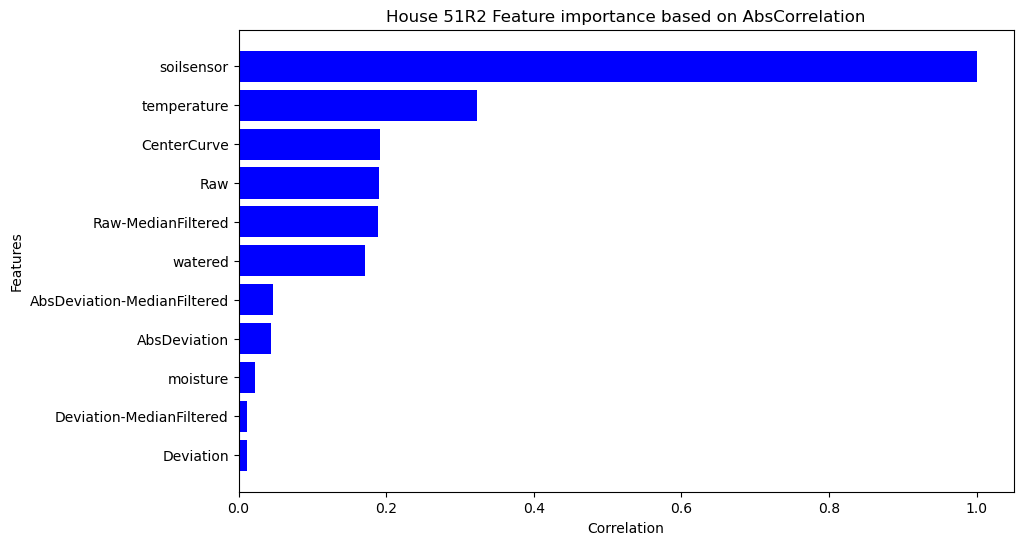

In [233]:
# 'Raw' 변수와 다른 변수들 사이의 상관계수를 계산
df = pd.read_csv('./concatraw_12/v2_2hour_51R2_79_com.csv')
correlation_matrix = df.corr()
raw_correlation = correlation_matrix['soilsensor'].sort_values(ascending=False)

## 상관계수의 절댓값을 계산
abs_raw_correlation = raw_correlation.abs()
## 리스트 형태로 저장
abs_raw_correlation_list = abs_raw_correlation.tolist()
## 딕셔너리 형태로 저장
abs_raw_correlation_dict = abs_raw_correlation.to_dict()
print('correlation :\n',raw_correlation)

##내림차순으로
sorted_dict = {k: v for k, v in sorted(abs_raw_correlation_dict.items(), key=lambda item: item[1], reverse=True)}
##데이터프레임으로
abs_raw_correlation_df = pd.DataFrame(list(sorted_dict.items()), columns=['Feature', 'Correlation'])
print(abs_raw_correlation_df)

plt.figure(figsize=(10, 6))
plt.barh(abs_raw_correlation_df['Feature'], abs_raw_correlation_df['Correlation'], color='blue')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('House 51R2 Feature importance based on AbsCorrelation')
plt.gca().invert_yaxis()
plt.show()

                       Feature  Importance
0                  temperature    0.320530
1                  CenterCurve    0.282547
2                     moisture    0.123565
3           Raw-MedianFiltered    0.062663
4                          Raw    0.053807
5  AbsDeviation-MedianFiltered    0.048286
6     Deviation-MedianFiltered    0.038185
7                    Deviation    0.032762
8                 AbsDeviation    0.020544
9                      watered    0.017111


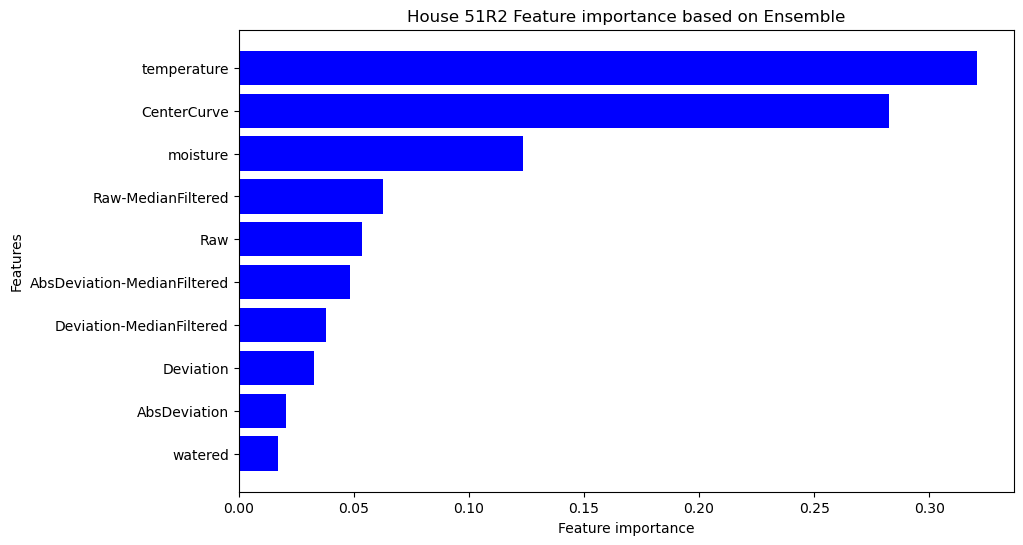

In [234]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

df = pd.read_csv('./concatraw_12/v2_2hour_51R2_79_com.csv')
df = df.drop(['date'], axis=1)

##결측치 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(df))
data_imputed.columns = df.columns

X = data_imputed.drop('soilsensor', axis=1)
y = data_imputed['soilsensor']

##모델 생성 및 훈련
model = RandomForestRegressor()
model.fit(X, y)

##특징 중요도 추출
importance = model.feature_importances_

##특징 중요도를 딕셔너리 형태로 저장
feature_importance_dict = {}
for i, col in enumerate(X.columns):
    feature_importance_dict[col] = importance[i]

##내림차순으로
sorted_dict = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}
##데이터프레임으로
feature_importance_dict_df = pd.DataFrame(list(sorted_dict.items()), columns=['Feature', 'Importance'])
print(feature_importance_dict_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_dict_df['Feature'], feature_importance_dict_df['Importance'], color='blue')
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title('House 51R2 Feature importance based on Ensemble')
plt.gca().invert_yaxis()
plt.show()

Num Features: 3
Feature Ranking: [1 2 6 7 8 4 3 1 5 1]


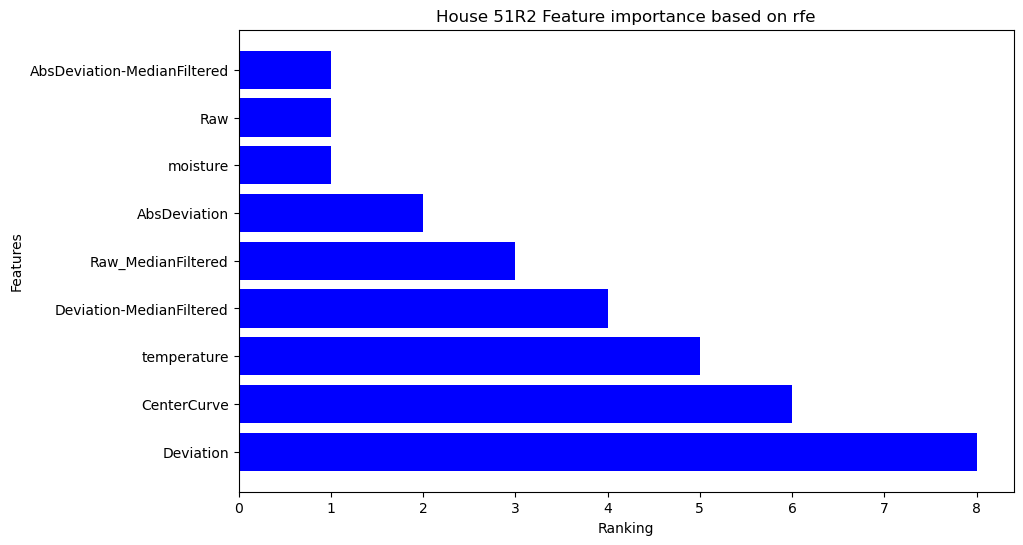

In [235]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

df = pd.read_csv("./concatraw_12/v2_2hour_51R2_79_com.csv")
df = df.drop(['date'],axis=1)

##결측치 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(df))
data_imputed.columns = df.columns

X = data_imputed.drop('soilsensor', axis=1)
y = data_imputed['soilsensor']
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

##'feature_names'는 원래 X 데이터셋의 특징 이름 리스트
feature_names = ['AbsDeviation-MedianFiltered'
                 ,'AbsDeviation'
                 ,'CenterCurve'
                 ,'Deviation-MedianFiltered'
                 ,'Deviation'
                 ,'Deviation-MedianFiltered'
                 ,'Raw_MedianFiltered'
                 ,'Raw'
                 ,'temperature'
                 ,'moisture'
                 ,'soilsensor'
                 ,'watered']

## 딕셔너리로 저장
rfe_dict = {}
for i in range(len(fit.ranking_)):
    rfe_dict[feature_names[i]] = fit.ranking_[i]

## 딕셔너리를 오름차순으로 정렬 (순위가 낮을수록 좋은 특징)
sorted_rfe_dict = {k: v for k, v in sorted(rfe_dict.items(), key=lambda item: item[1])}

## 데이터프레임으로 변환
rfe_df = pd.DataFrame(list(sorted_rfe_dict.items()), columns=['Feature', 'Ranking'])

## 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.barh(rfe_df['Feature'], rfe_df['Ranking'], color='blue')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.title('House 51R2 Feature importance based on rfe')
## y축을 역순으로 하여 상단에 중요한 데이터가 오도록
plt.gca().invert_yaxis()
plt.show()

In [236]:
import statsmodels.api as sm

##5. p-value를 통하여
df = pd.read_csv("./concatraw_12/v2_2hour_51R2_79_com.csv")
df = df.drop(['date'],axis=1)

##결측치 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(df))
data_imputed.columns = df.columns

## 독립변수, 종속변수 설정
X = data_imputed.drop(['soilsensor'], axis=1)
y = data_imputed['soilsensor']

## 선형 모델에 필요한 상수항을 추가
X = sm.add_constant(X)

## OLS (Ordinary Least Squares) 모델 적합
model = sm.OLS(y, X).fit()

## 결과 출력 (p-value 포함)
print(model.summary())

## 특징 선택 (p-value 기준, 여기서는 0.05로 설정)
selected_features = []
for i in range(len(X.columns)):
    if model.pvalues[i] < 0.05:
        selected_features.append(X.columns[i])

# 선택된 특징 출력
print("House 51R2 Selected Features based on p-value: ", selected_features)

                            OLS Regression Results                            
Dep. Variable:             soilsensor   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     77.96
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          4.25e-131
Time:                        11:35:58   Log-Likelihood:                -15191.
No. Observations:                3252   AIC:                         3.040e+04
Df Residuals:                    3242   BIC:                         3.046e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### 주요 변수 저장 및 빈도수 기반 선정

In [237]:
df_7to9 = pd.DataFrame({'40_corr':['Raw_MedianFiltered', 'CenterCurve', 'Raw'],
                        '40_rf':['temperature', 'CenterCurver', 'moisture'],
                        '40_rrf':['Centercurve', 'Raw', 'moisture'],
                        '40_pvalue':['AbsDeviation-MedianFiltered', 'Raw-MedianFiltered', 'Raw'],
                        '43_corr':['AbsDeviation-MedianFiltered', 'AbsDeviation', 'Deviation'],
                        '43_rf':['CenterCurve', 'temperature', 'moisture'],
                        '43_rrf':['AbsDeviation-MedianFiltered', 'AbsDeviation', 'moisture'],
                        '43_pvalue':['AbsDeviation-MedianFiltered', 'temperature', 'moisture'],
                        '51_corr':['AbsDeviation', 'AbsDeviation-MedianFiltered', 'Deviation'],
                        '51_rf':['temperature', 'CenterCurve', 'moisture'],
                        '51_rrf':['AbsDeviation-MedianFiltered', 'Raw', 'moisture'],
                        '51_pvalue':['temperature', 'moisture', 'watered'],
                        '42_corr':['temperature', 'Raw-MedianFiltered', 'Raw'],
                        '42_rf':['temperature', 'CenterCurver', 'Raw-MedianFiltered'],
                        '42_rrf':['CenterCurve', 'Deviation-MedianFiltered', 'Deviation'],
                        '42_pvalue':['temperature', 'moisture', 'watered'],
                       })
df_7to9.head()
df_7to9.to_csv('./concatraw_12/v2_key_variable_79.csv',index=False)

df = pd.read_csv('./concatraw_12/v2_key_variable_79.csv')

## 각 열의 값을 하나의 series로 연결
all_values = df.values.flatten()

## 빈도수 계산
frequency = pd.Series(all_values).value_counts()

## 빈도수를 기반으로 순위 부여
ranking = frequency.sort_values(ascending=False)

print(ranking)

moisture                       9
temperature                    8
AbsDeviation-MedianFiltered    6
Raw                            5
CenterCurve                    4
AbsDeviation                   3
Raw-MedianFiltered             3
Deviation                      3
CenterCurver                   2
watered                        2
Raw_MedianFiltered             1
Centercurve                    1
Deviation-MedianFiltered       1
dtype: int64


In [ ]:
 ==> ['moisture','temperature','AbsDeviation-MedianFiltered']

## 차운 축소 및 군집 시각화

### PCA

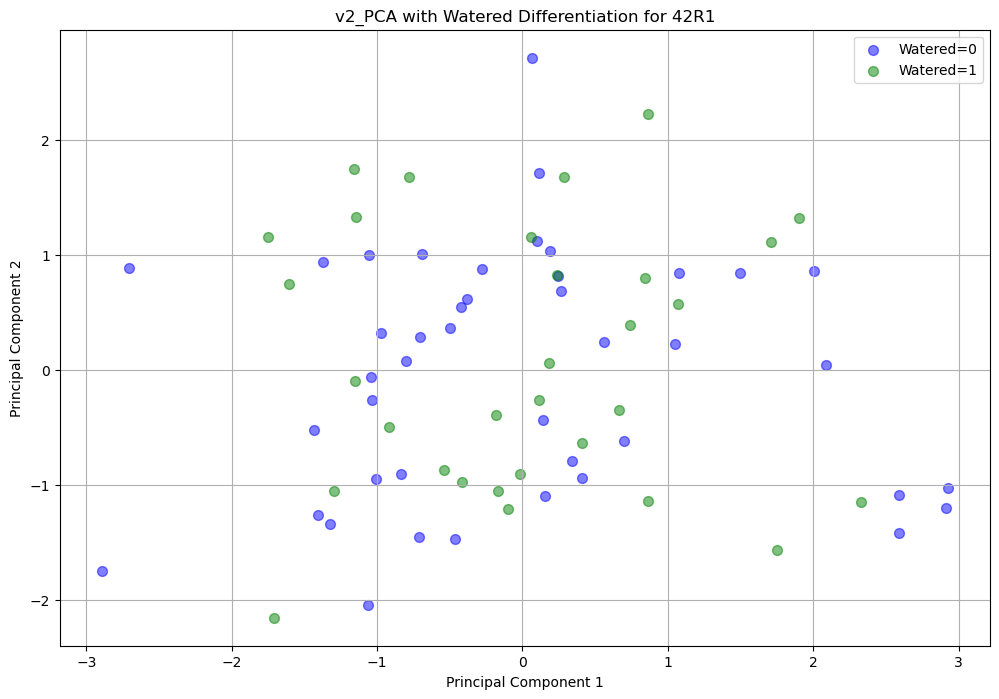

In [251]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/perday_42R1_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)
# 결측치를 선형으로 보간
df1 = df1.interpolate(method='linear')

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('v2_PCA with Watered Differentiation for 42R1')

# watered 값에 따른 색상 지정
colors = {0: 'b', 1: 'g'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=50, 
               label=f'Watered={watered}')

ax.legend()
ax.grid()
plt.show()


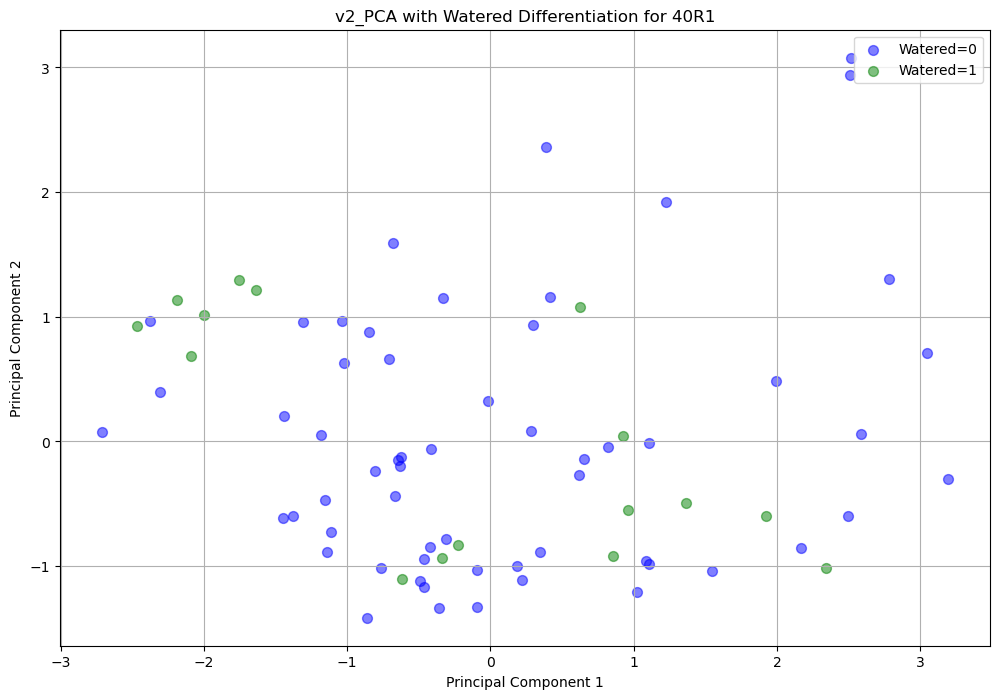

In [250]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/perday_40R1_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)
# 결측치를 선형으로 보간
df1 = df1.interpolate(method='linear')

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('v2_PCA with Watered Differentiation for 40R1')

# watered 값에 따른 색상 지정
colors = {0: 'b', 1: 'g'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=50, 
               label=f'Watered={watered}')

ax.legend()
ax.grid()
plt.show()


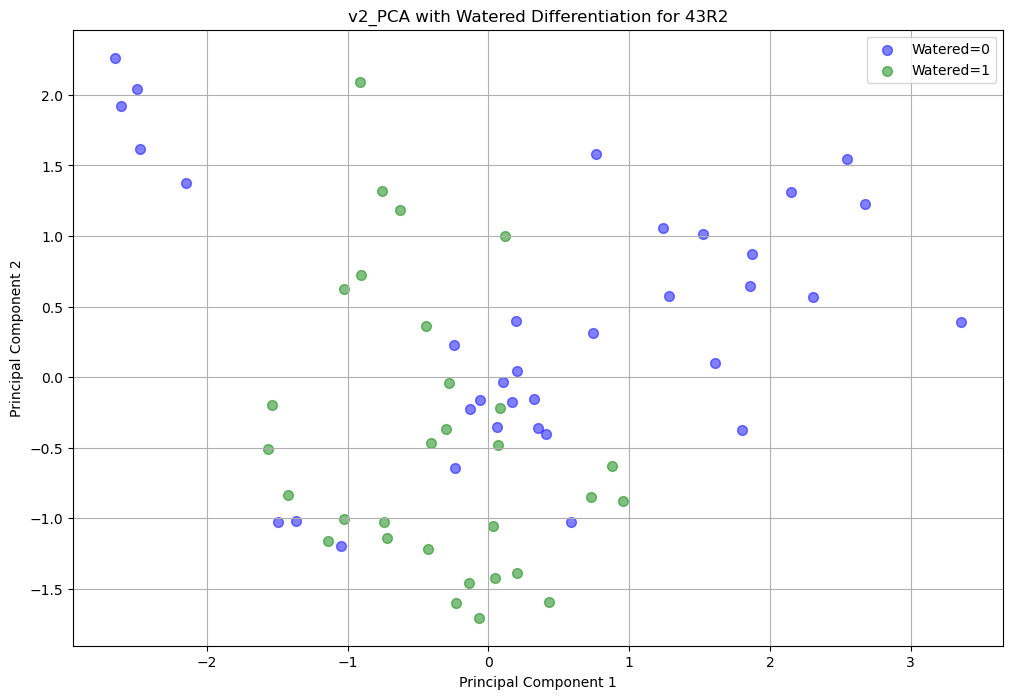

In [249]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/perday_43R2_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)
# 결측치를 선형으로 보간
df1 = df1.interpolate(method='linear')

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('v2_PCA with Watered Differentiation for 43R2')

# watered 값에 따른 색상 지정
colors = {0: 'b', 1: 'g'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=50, 
               label=f'Watered={watered}')

ax.legend()
ax.grid()
plt.show()


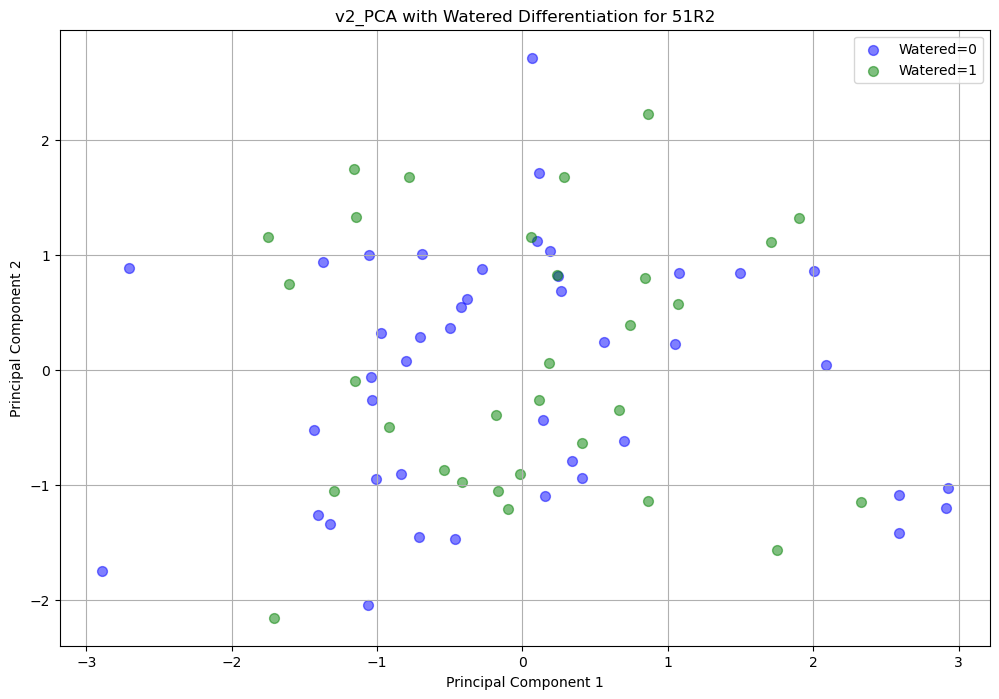

In [248]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/perday_51R2_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)
# 결측치를 선형으로 보간
df1 = df1.interpolate(method='linear')

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('v2_PCA with Watered Differentiation for 51R2')

# watered 값에 따른 색상 지정
colors = {0: 'b', 1: 'g'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=50, 
               label=f'Watered={watered}')

ax.legend()
ax.grid()
plt.show()


### MDA

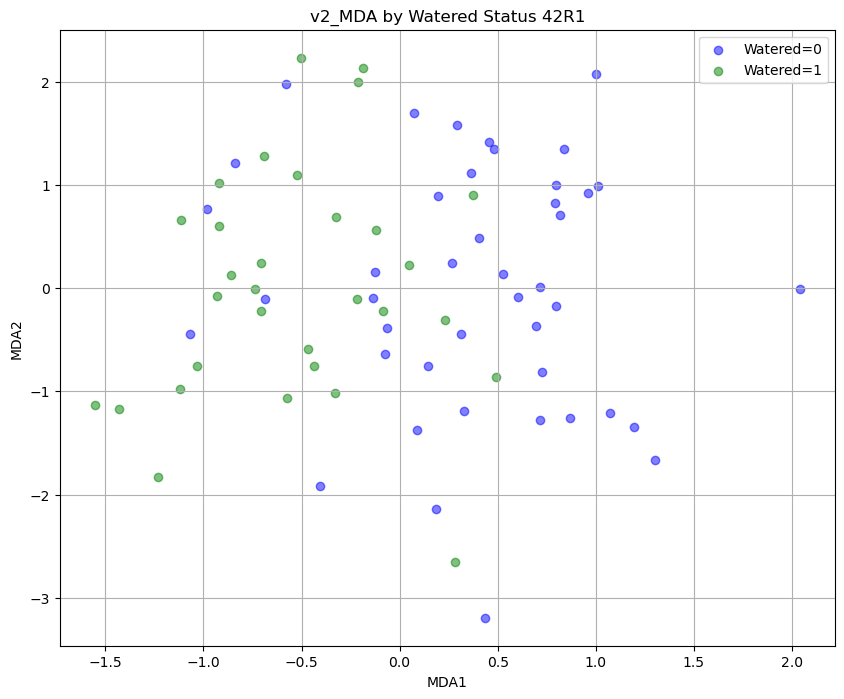

In [252]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/perday_42R1_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['b', 'g']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Watered=0', 'Watered=1']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('v2_MDA by Watered Status 42R1')
plt.legend()
plt.show()

/Users/kwangilkim/anaconda3/envs/scrapping/lib/python3.8/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


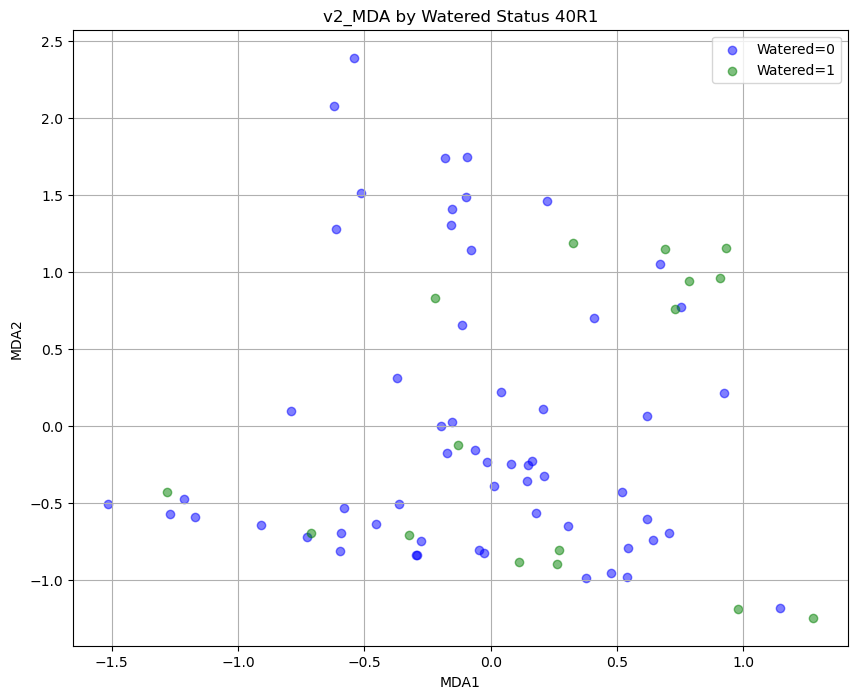

In [253]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/perday_40R1_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['b', 'g']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Watered=0', 'Watered=1']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('v2_MDA by Watered Status 40R1')
plt.legend()
plt.show()

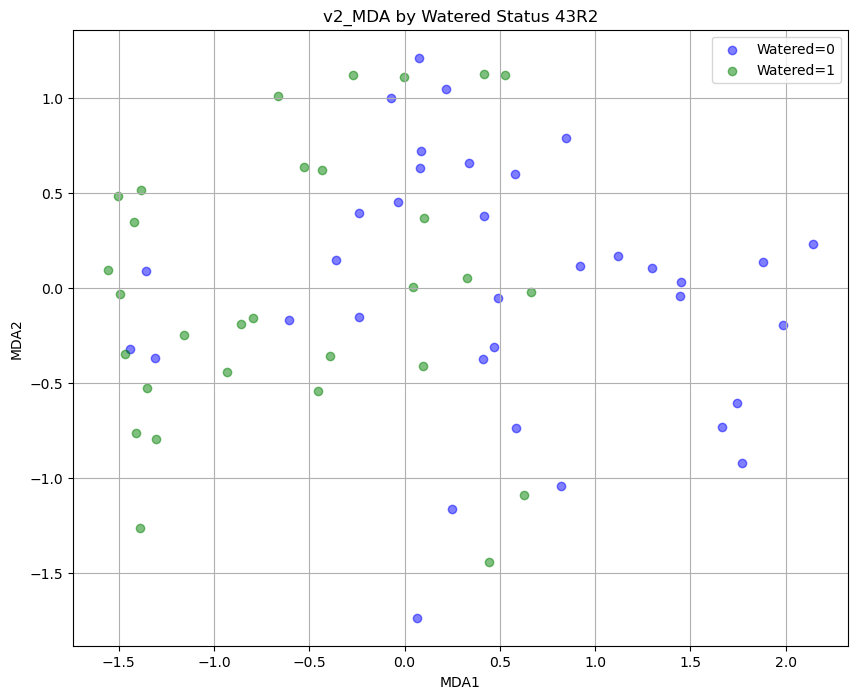

In [254]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/perday_43R2_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['b', 'g']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Watered=0', 'Watered=1']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('v2_MDA by Watered Status 43R2')
plt.legend()
plt.show()

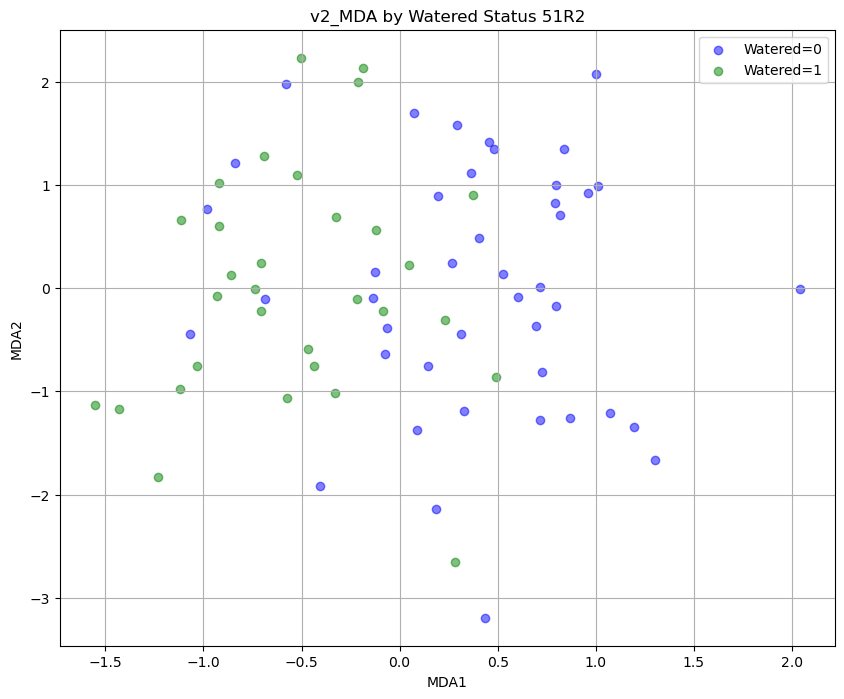

In [255]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/perday_51R2_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['b', 'g']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Watered=0', 'Watered=1']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('v2_MDA by Watered Status 51R2')
plt.legend()
plt.show()

### U-map

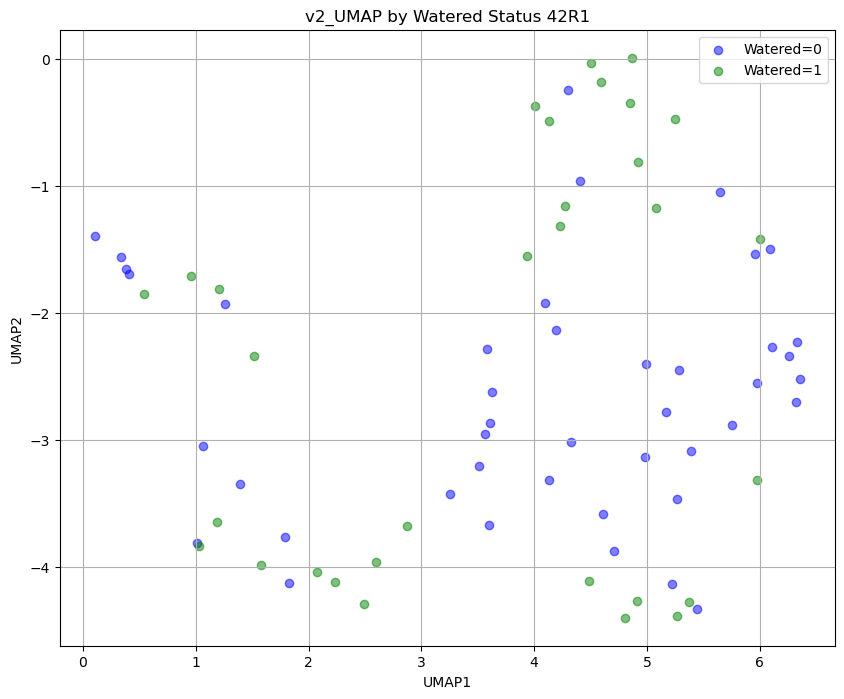

In [257]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/perday_42R1_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('v2_UMAP by Watered Status 42R1')
plt.legend()
plt.show()


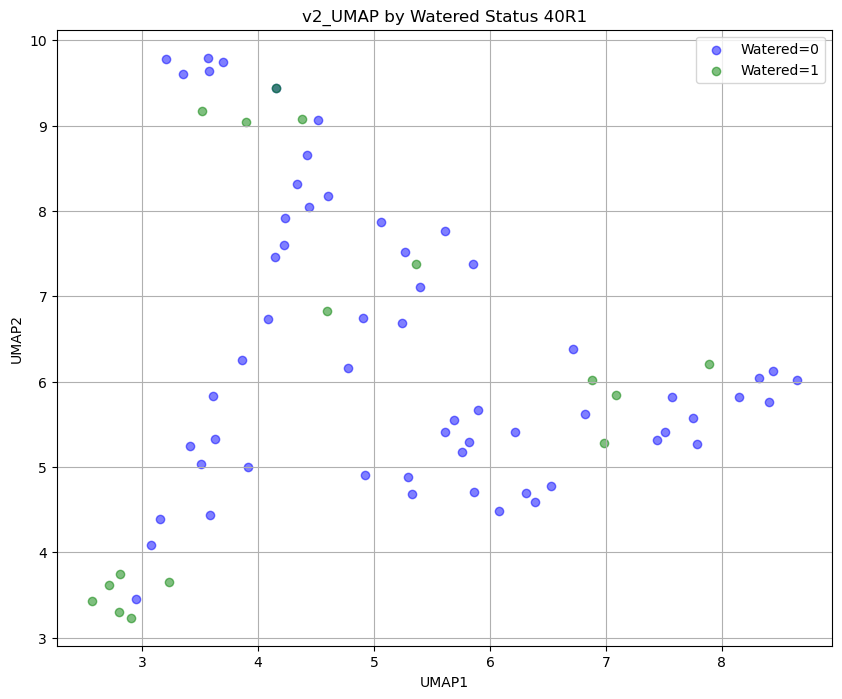

In [261]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/perday_40R1_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('v2_UMAP by Watered Status 40R1')
plt.legend()
plt.show()


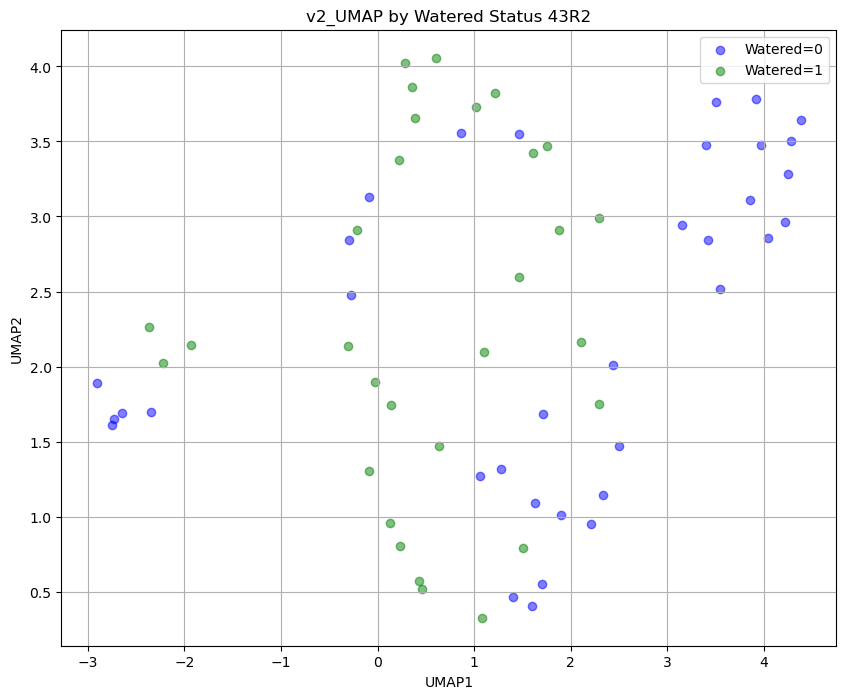

In [262]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/perday_43R2_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('v2_UMAP by Watered Status 43R2')
plt.legend()
plt.show()


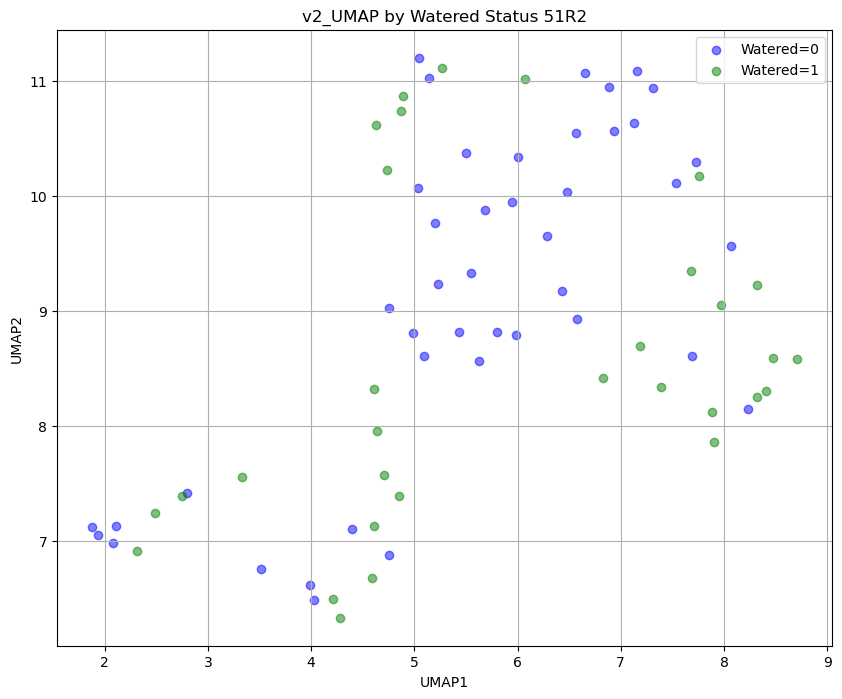

In [263]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/perday_51R2_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('v2_UMAP by Watered Status 51R2')
plt.legend()
plt.show()


### T-sne

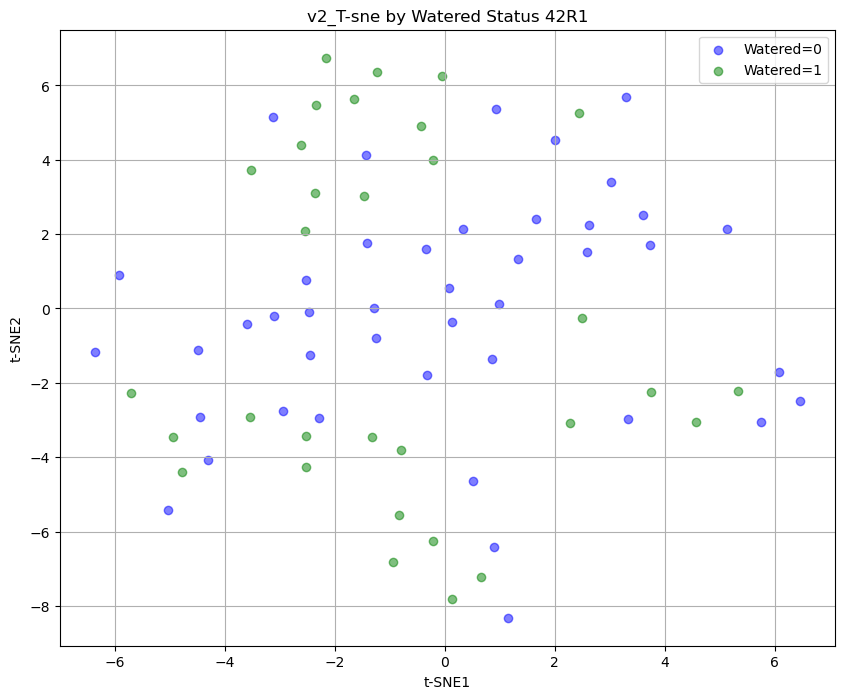

In [264]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/perday_42R1_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('v2_T-sne by Watered Status 42R1')
plt.legend()
plt.show()


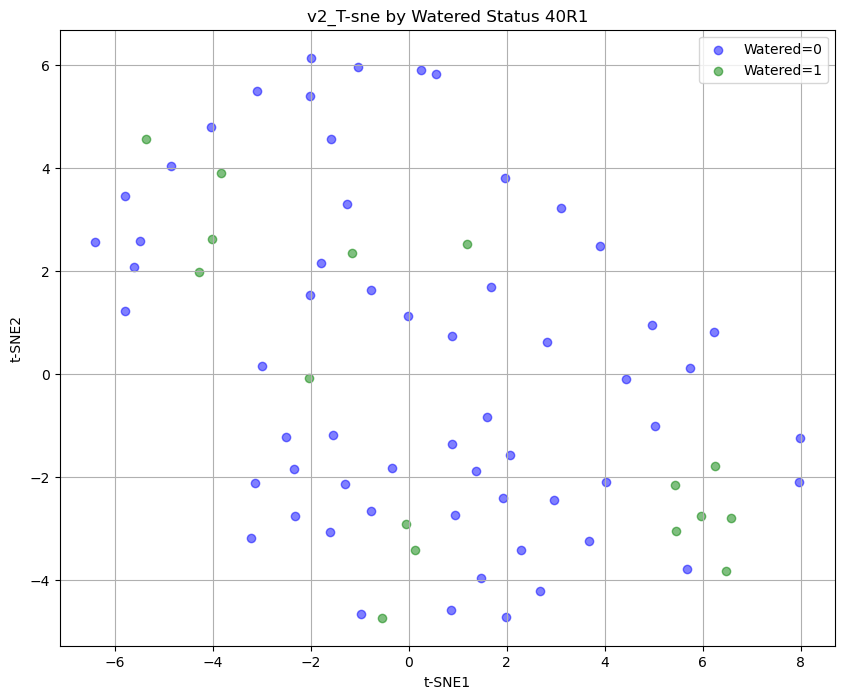

In [265]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/perday_40R1_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('v2_T-sne by Watered Status 40R1')
plt.legend()
plt.show()


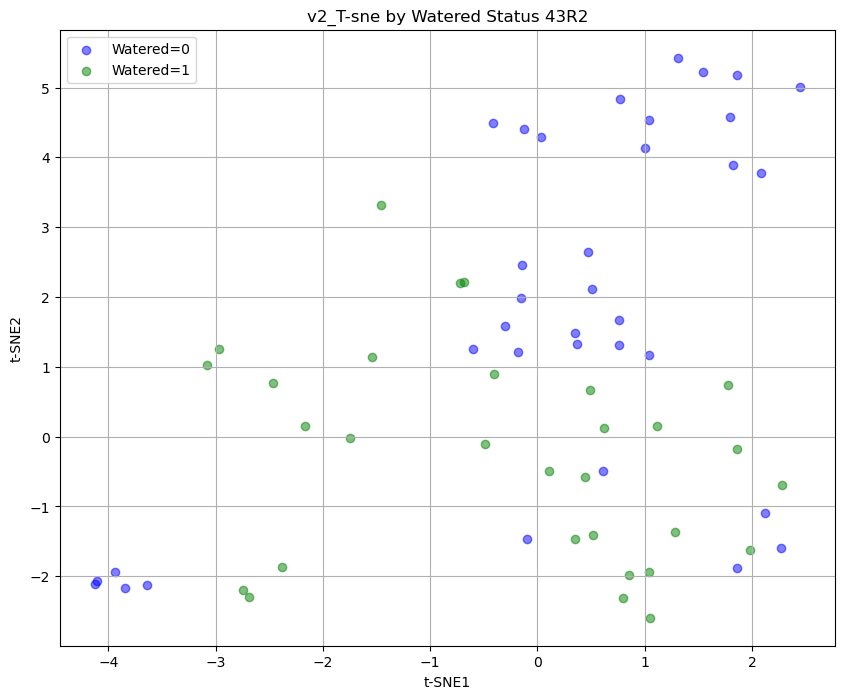

In [266]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/perday_43R2_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('v2_T-sne by Watered Status 43R2')
plt.legend()
plt.show()


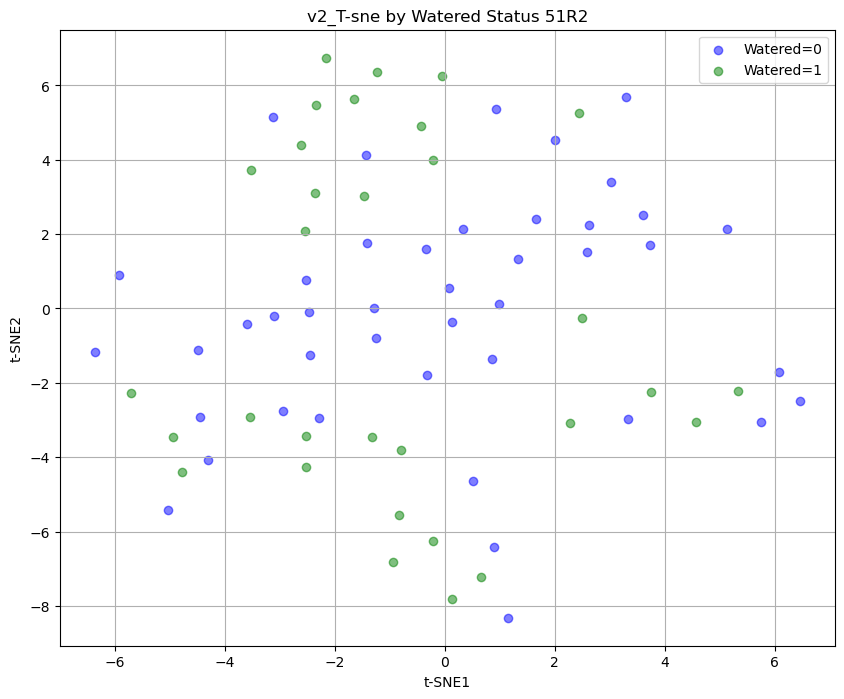

In [267]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/perday_51R2_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'blue', 1: 'green'}  # 0은 파란색, 1은 녹색으로 설정
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=f'Watered={watered}'
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('v2_T-sne by Watered Status 51R2')
plt.legend()
plt.show()


## 차원 축소 및 군집 분류 2

### 데이터 자르기

In [268]:
df = pd.read_csv('./concatraw_12/v1_43R1_79_com.csv')
df = df.iloc[115:390, :]
df.to_csv('./concatraw_12/v2_forfeatureanalysis_43R1_79_com.csv', index=False)

df1 = pd.read_csv('./concatraw_12/v1_43R2_79_com.csv')
df1 = df1.iloc[115:390, :]
df1.to_csv('./concatraw_12/v2_forfeatureanalysis_43R2_79_com.csv', index=False)

df2 = pd.read_csv('./concatraw_12/v1_51R1_79_com.csv')
df2 = df2.iloc[115:390, :]
df2.to_csv('./concatraw_12/v2_forfeatureanalysis_51R1_79_com.csv', index=False)

df3 = pd.read_csv('./concatraw_12/v1_51R2_79_com.csv')
df3 = df3.iloc[115:390, :]
df3.to_csv('./concatraw_12/v2_forfeatureanalysis_51R2_79_com.csv', index=False)

df4 = pd.read_csv('./concatraw_12/v1_40R1_79_com.csv')
df4 = df4.iloc[1142:1475, :]
df4.to_csv('./concatraw_12/v2_forfeatureanalysis_40R1_79_com.csv', index=False)

df5 = pd.read_csv('./concatraw_12/v1_42R1_79_com.csv')
df5 = df5.iloc[2376:2658, :]
df5.to_csv('./concatraw_12/v2_forfeatureanalysis_42R1_79_com.csv', index=False)


### PCA

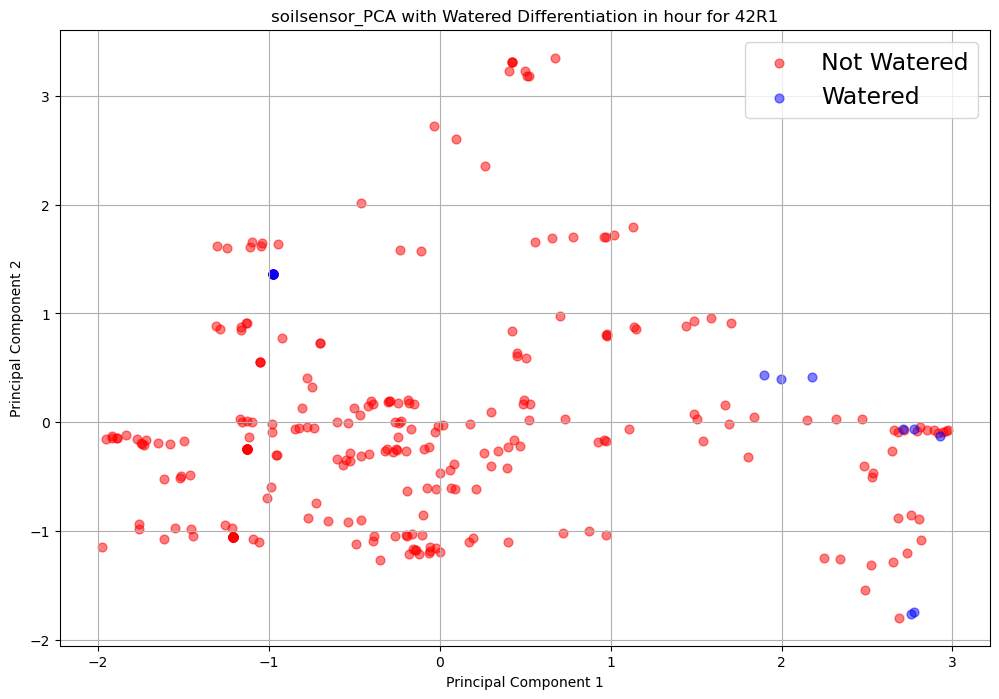

In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_42R1_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('soilsensor_PCA with Watered Differentiation in hour for 42R1')

# watered 값에 따른 색상 지정
colors = {0: 'r', 1: 'b'}
labels = {0: 'Not Watered', 1: 'Watered'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=40, 
               label=labels[watered])

ax.legend(fontsize=17)
ax.grid()
plt.show()


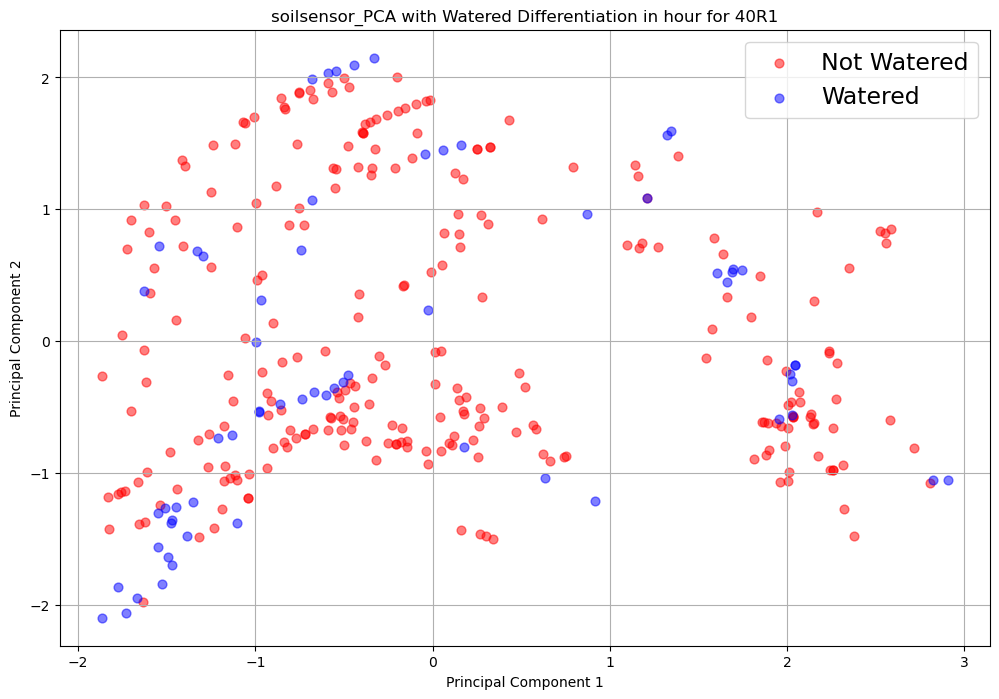

In [68]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_40R1_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('soilsensor_PCA with Watered Differentiation in hour for 40R1')

# watered 값에 따른 색상 지정
colors = {0: 'r', 1: 'b'}
labels = {0: 'Not Watered', 1: 'Watered'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=40, 
               label=labels[watered])

ax.legend(fontsize=17)
ax.grid()
plt.show()


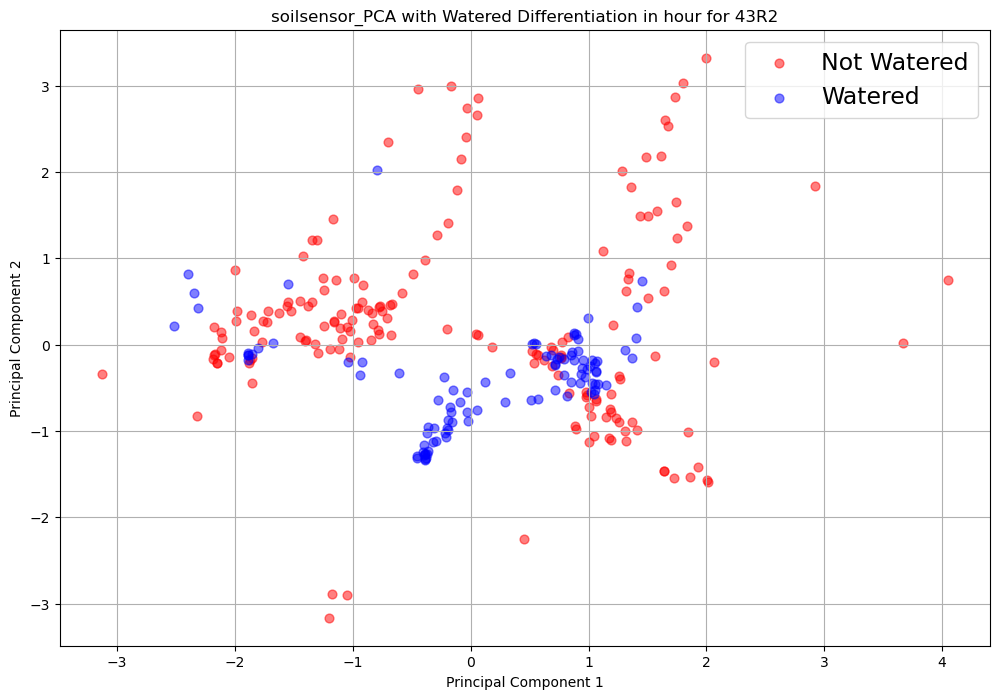

In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_43R2_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('soilsensor_PCA with Watered Differentiation in hour for 43R2')

# watered 값에 따른 색상 지정
colors = {0: 'r', 1: 'b'}
labels = {0: 'Not Watered', 1: 'Watered'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=40, 
               label=labels[watered])

ax.legend(fontsize=17)
ax.grid()
plt.show()


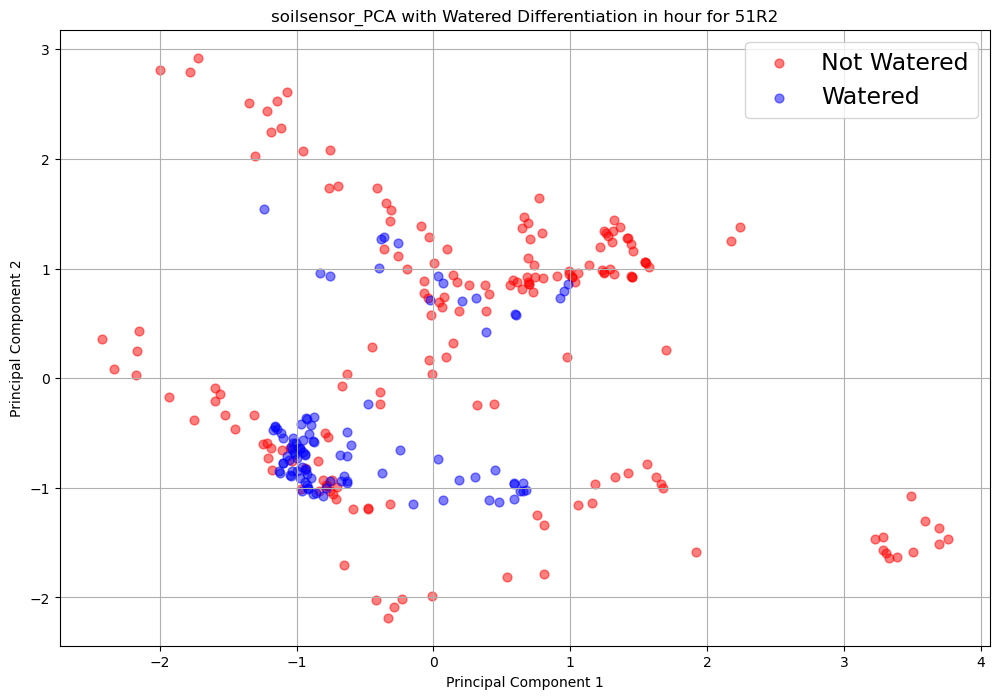

In [70]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/forfeatureanalysis_51R2_79_com.csv")
# watered 열의 값을 이진화
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 필요한 특성 선택 (이 예제에서는 특성을 미리 정의해야 합니다)
selected_features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df1_selected = df1[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_selected)

# PCA 적용 (2개의 주성분으로 차원 축소)
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=df1_pca, columns=['Principal Component 1', 'Principal Component 2'])
# watered 열을 추가
principalDf['watered'] = df1['watered']

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('soilsensor_PCA with Watered Differentiation in hour for 51R2')

# watered 값에 따른 색상 지정
colors = {0: 'r', 1: 'b'}
labels = {0: 'Not Watered', 1: 'Watered'}

for watered, group in principalDf.groupby('watered'):
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], 
               c=colors[watered], alpha=0.5, s=40, 
               label=labels[watered])

ax.legend(fontsize=17)
ax.grid()
plt.show()


### MDA

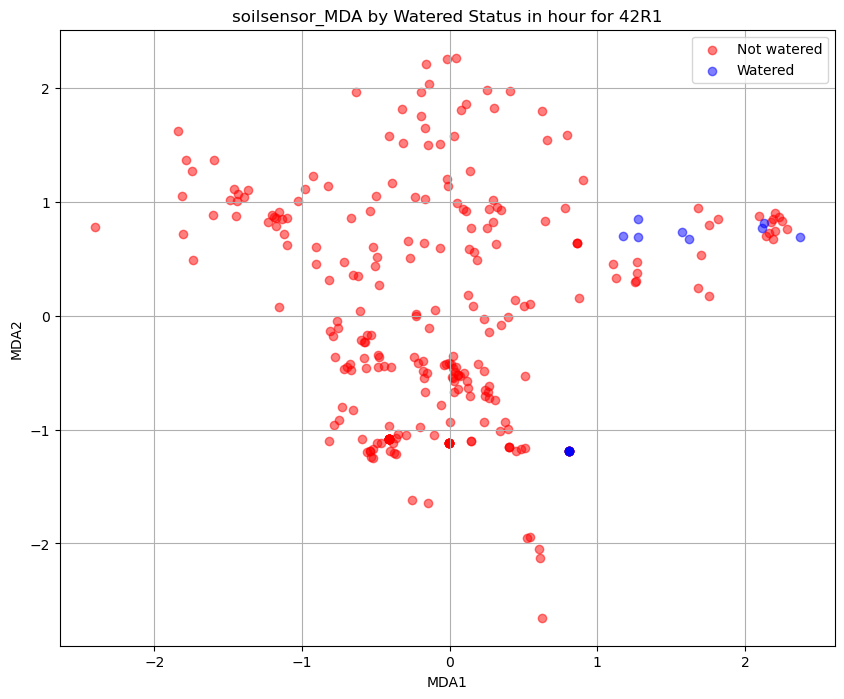

In [281]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/v2_forfeatureanalysis_42R1_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['r', 'b']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Not watered', 'Watered']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('soilsensor_MDA by Watered Status in hour for 42R1')
plt.legend()
plt.show()

/Users/kwangilkim/anaconda3/envs/scrapping/lib/python3.8/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


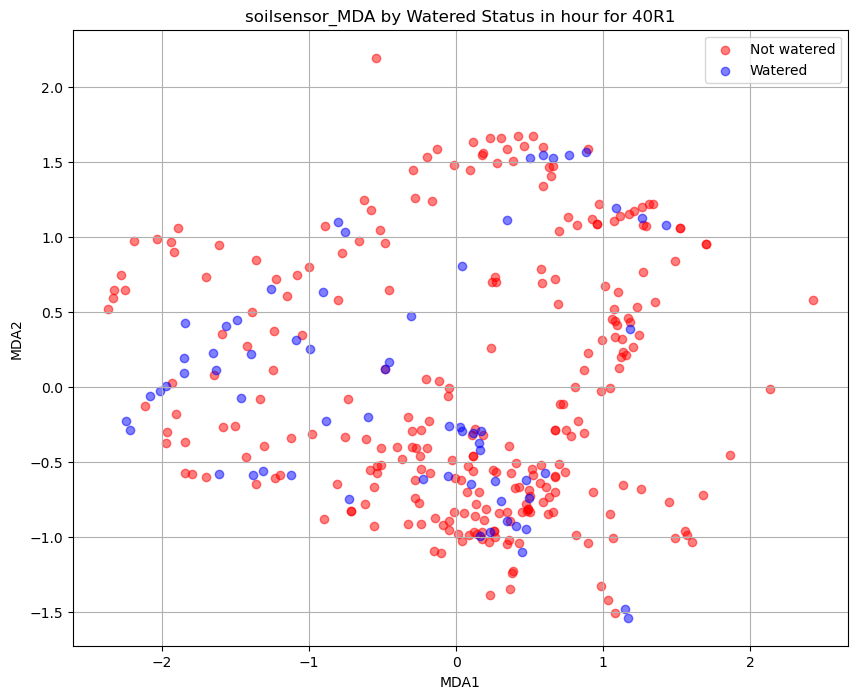

In [282]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/v2_forfeatureanalysis_40R1_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['r', 'b']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Not watered', 'Watered']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('soilsensor_MDA by Watered Status in hour for 40R1')
plt.legend()
plt.show()

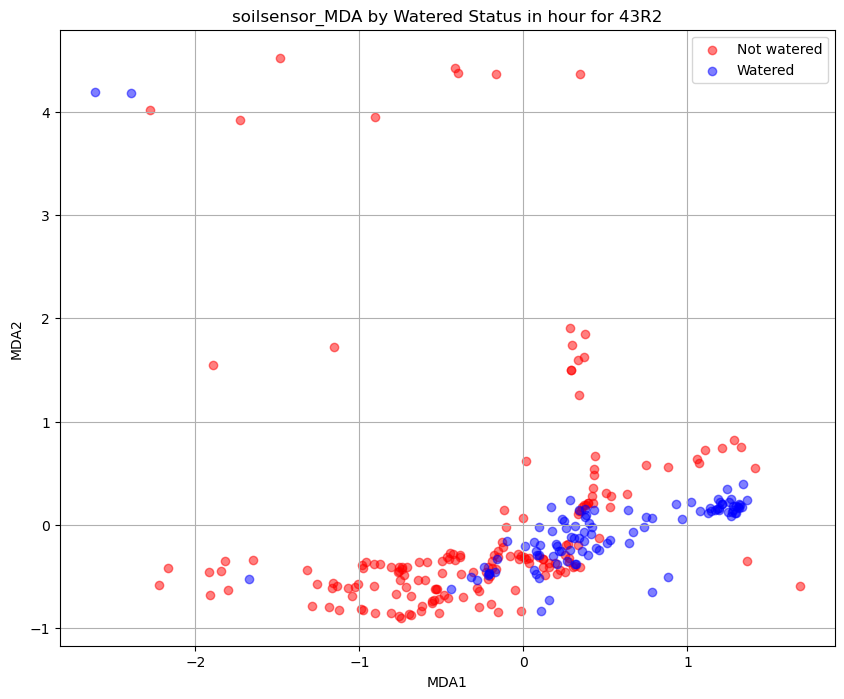

In [283]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/v2_forfeatureanalysis_43R2_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['r', 'b']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Not watered', 'Watered']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('soilsensor_MDA by Watered Status in hour for 43R2')
plt.legend()
plt.show()

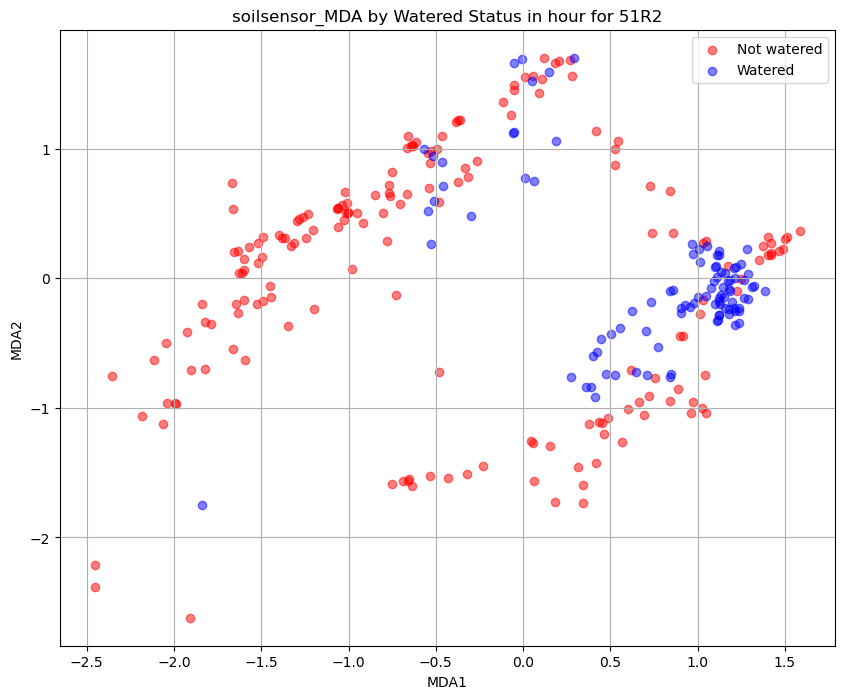

In [284]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
df1 = pd.read_csv("./concatraw_12/v2_forfeatureanalysis_51R2_79_com.csv")
df1 = df1.interpolate(method='linear')

# watered 열을 이진 분류로 변환
df1['watered'] = df1['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df1[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = df1['watered'].values

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['watered'] = labels

# 시각화
plt.figure(figsize=(10, 8))
colors = ['r', 'b']  # watered=0은 파란색, watered=1은 녹색으로 설정
labels_names = ['Not watered', 'Watered']

for watered, color, name in zip([0, 1], colors, labels_names):
    indices = mda_df['watered'] == watered
    plt.scatter(
        mda_df.loc[indices, 'MDA1'],
        mda_df.loc[indices, 'MDA2'],
        c=color,
        alpha=0.5,
        label=name
    )

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('soilsensor_MDA by Watered Status in hour for 51R2')
plt.legend()
plt.show()

### U-MAP

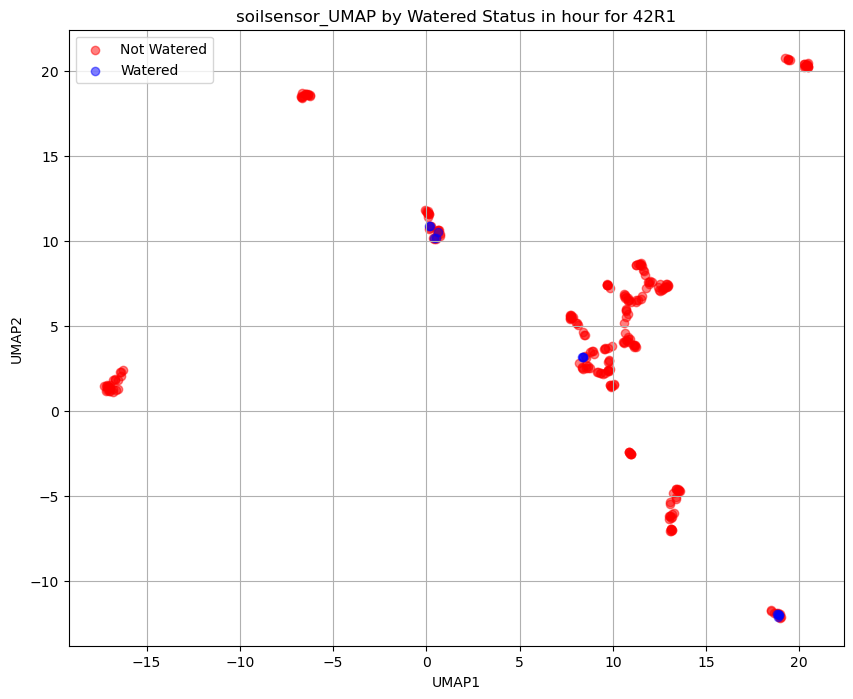

In [286]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/forfeatureanalysis_42R1_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}  # 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('soilsensor_UMAP by Watered Status in hour for 42R1')
plt.legend()
plt.show()


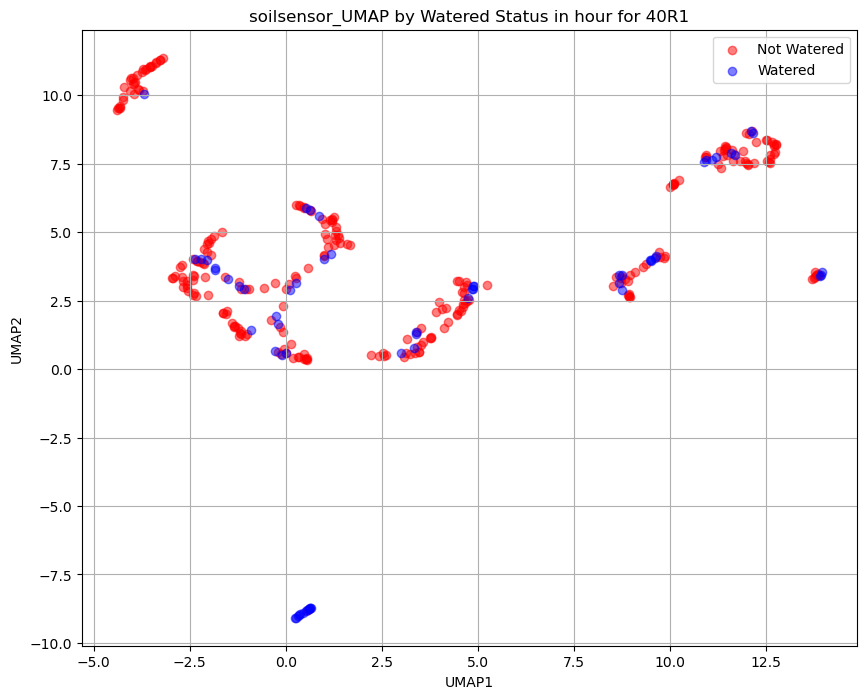

In [288]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/forfeatureanalysis_40R1_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}  # 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('soilsensor_UMAP by Watered Status in hour for 40R1')
plt.legend()
plt.show()


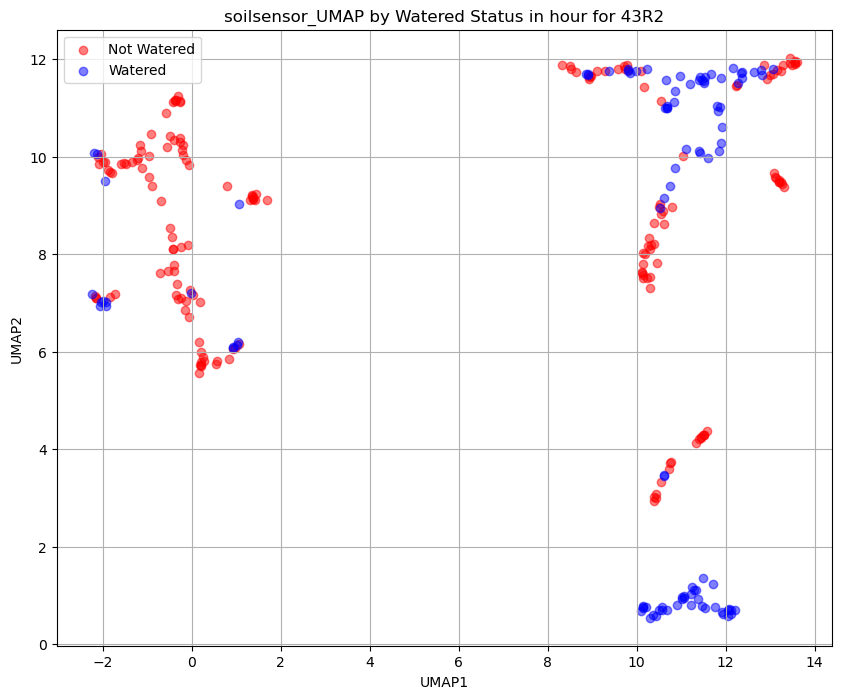

In [290]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/forfeatureanalysis_43R2_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}  # 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('soilsensor_UMAP by Watered Status in hour for 43R2')
plt.legend()
plt.show()


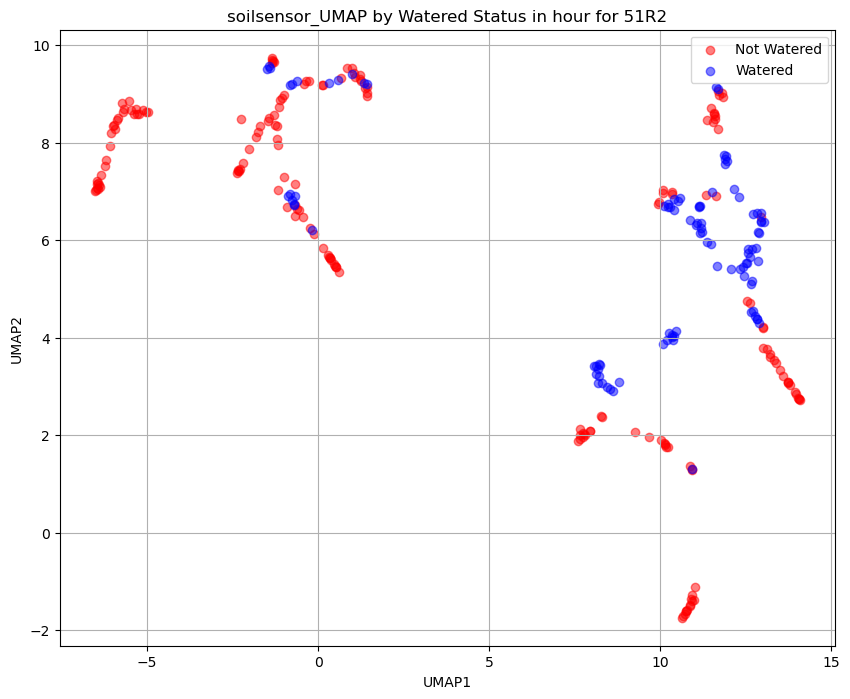

In [291]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 읽기 및 결측치 보간
df = pd.read_csv("./concatraw_12/forfeatureanalysis_51R2_79_com.csv").interpolate(method='linear')

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

# 특징 선택 및 표준화
features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

# 레이블 설정 (이번에는 'watered' 열을 사용)
labels = df['watered'].values

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}  # 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = umap_df['watered'] == watered
    plt.scatter(
        umap_df.loc[indices, 'UMAP1'],
        umap_df.loc[indices, 'UMAP2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('soilsensor_UMAP by Watered Status in hour for 51R2')
plt.legend()
plt.show()


### T-sne

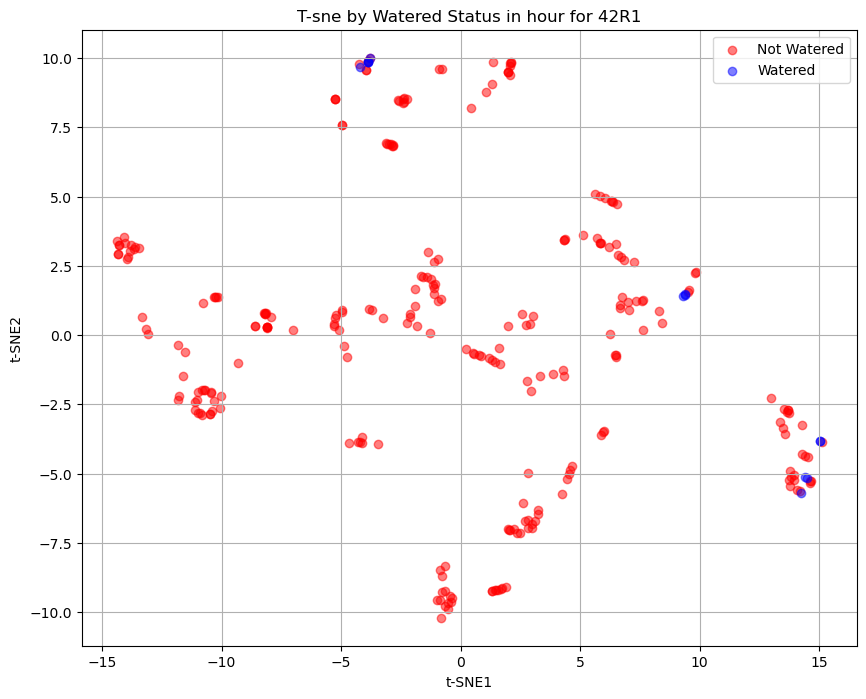

In [292]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/v2_forfeatureanalysis_42R1_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}# 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status in hour for 42R1')
plt.legend()
plt.show()


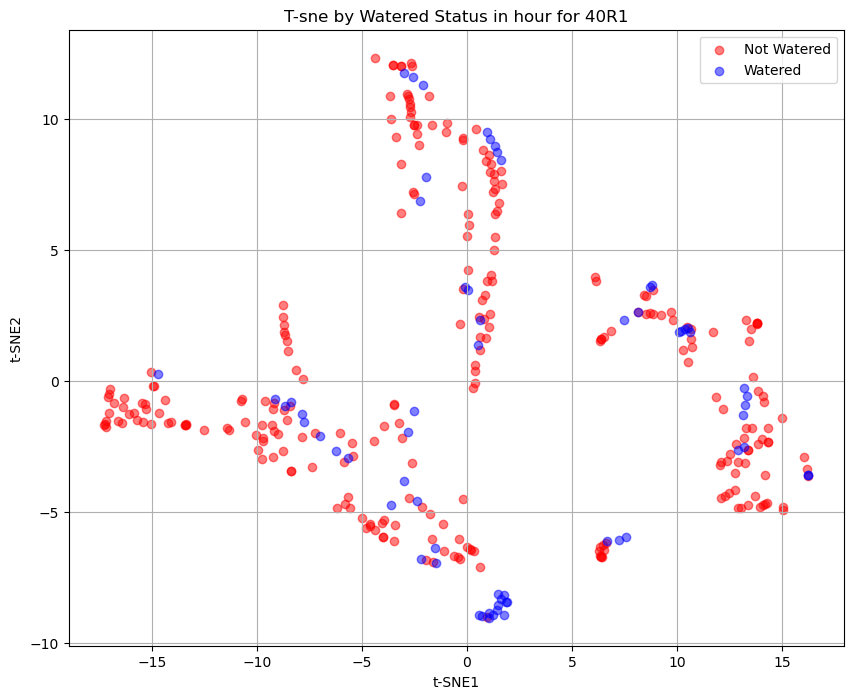

In [293]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/v2_forfeatureanalysis_40R1_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}# 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status in hour for 40R1')
plt.legend()
plt.show()


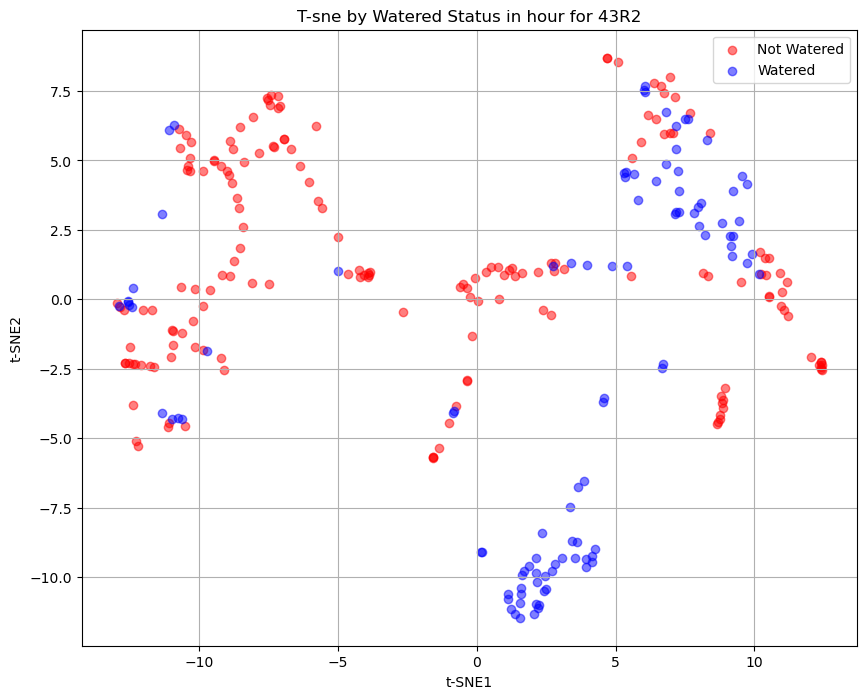

In [294]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/v2_forfeatureanalysis_43R2_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}# 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status in hour for 43R2')
plt.legend()
plt.show()


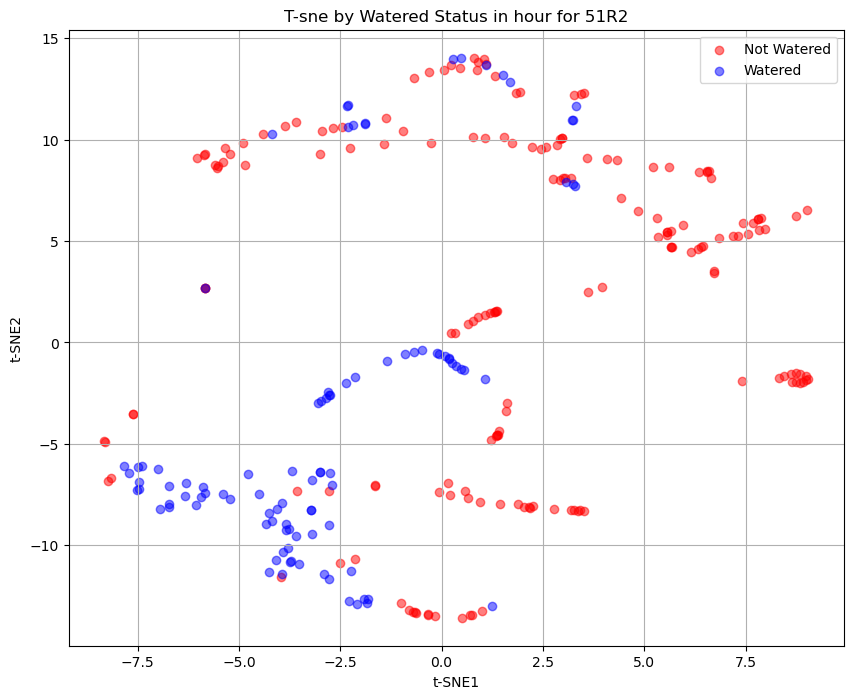

In [295]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df = pd.read_csv("./concatraw_12/v2_forfeatureanalysis_51R2_79_com.csv")

# 'watered' 열을 이진 분류로 변환
df['watered'] = df['watered'].apply(lambda x: 0 if x == 0 else 1)

df = df.interpolate(method='linear')

features = ['soilsensor','moisture','temperature','AbsDeviation-MedianFiltered']
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = df['watered'].values

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['watered'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}# 0은 파란색, 1은 녹색으로 설정
labels_dict = {0: 'Not Watered', 1: 'Watered'}
for watered, color in colors.items():
    indices = tsne_df['watered'] == watered
    plt.scatter(
        tsne_df.loc[indices, 't-SNE1'],
        tsne_df.loc[indices, 't-SNE2'],
        c=color,
        alpha=0.5,
        label=labels_dict[watered]
    )

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('T-sne by Watered Status in hour for 51R2')
plt.legend()
plt.show()


## 시계열 

###  시계열 용 데이터 만들기

In [296]:
df = pd.read_csv('./concatraw_12/v1_42R1_79_com.csv')
# 'date' 열을 datetime 객체로 변환
df['date'] = pd.to_datetime(df['date'])
# '월-일' 형식으로 새로운 열 생성
df['formatted_date'] = df['date'].dt.strftime('%m-%d')
# 'formatted_date' 별로 'Raw'의 평균 계산
result = df.groupby('formatted_date')['soilsensor'].mean().reset_index()
result.columns = ['date','soilsensor']
result.to_csv('./concatraw_12/v2_42R1_79_forplot.csv',index=False)

df = pd.read_csv('./concatraw_12/v1_40R1_79_com.csv')
# 'date' 열을 datetime 객체로 변환
df['date'] = pd.to_datetime(df['date'])
# '월-일' 형식으로 새로운 열 생성
df['formatted_date'] = df['date'].dt.strftime('%m-%d')
# 'formatted_date' 별로 'Raw'의 평균 계산
result = df.groupby('formatted_date')['soilsensor'].mean().reset_index()
result.columns = ['date','soilsensor']
result.to_csv('./concatraw_12/v2_40R1_79_forplot.csv',index=False)

df = pd.read_csv('./concatraw_12/v1_43R1_79_com.csv')
# 'date' 열을 datetime 객체로 변환
df['date'] = pd.to_datetime(df['date'])
# '월-일' 형식으로 새로운 열 생성
df['formatted_date'] = df['date'].dt.strftime('%m-%d')
# 'formatted_date' 별로 'Raw'의 평균 계산
result = df.groupby('formatted_date')['soilsensor'].mean().reset_index()
result.columns = ['date','soilsensor']
result.to_csv('./concatraw_12/v2_43R1_79_forplot.csv',index=False)

df = pd.read_csv('./concatraw_12/v1_43R2_79_com.csv')
# 'date' 열을 datetime 객체로 변환
df['date'] = pd.to_datetime(df['date'])
# '월-일' 형식으로 새로운 열 생성
df['formatted_date'] = df['date'].dt.strftime('%m-%d')
# 'formatted_date' 별로 'Raw'의 평균 계산
result = df.groupby('formatted_date')['soilsensor'].mean().reset_index()
result.columns = ['date','soilsensor']
result.to_csv('./concatraw_12/v2_43R2_79_forplot.csv',index=False)

df = pd.read_csv('./concatraw_12/v1_51R1_79_com.csv')
# 'date' 열을 datetime 객체로 변환
df['date'] = pd.to_datetime(df['date'])
# '월-일' 형식으로 새로운 열 생성
df['formatted_date'] = df['date'].dt.strftime('%m-%d')
# 'formatted_date' 별로 'Raw'의 평균 계산
result = df.groupby('formatted_date')['soilsensor'].mean().reset_index()
result.columns = ['date','soilsensor']
result.to_csv('./concatraw_12/v2_51R1_79_forplot.csv',index=False)

df = pd.read_csv('./concatraw_12/v1_51R2_79_com.csv')
# 'date' 열을 datetime 객체로 변환
df['date'] = pd.to_datetime(df['date'])
# '월-일' 형식으로 새로운 열 생성
df['formatted_date'] = df['date'].dt.strftime('%m-%d')
# 'formatted_date' 별로 'Raw'의 평균 계산
result = df.groupby('formatted_date')['soilsensor'].mean().reset_index()
result.columns = ['date','soilsensor']
result.to_csv('./concatraw_12/v2_51R2_79_forplot.csv',index=False)

### 시계열 그래프

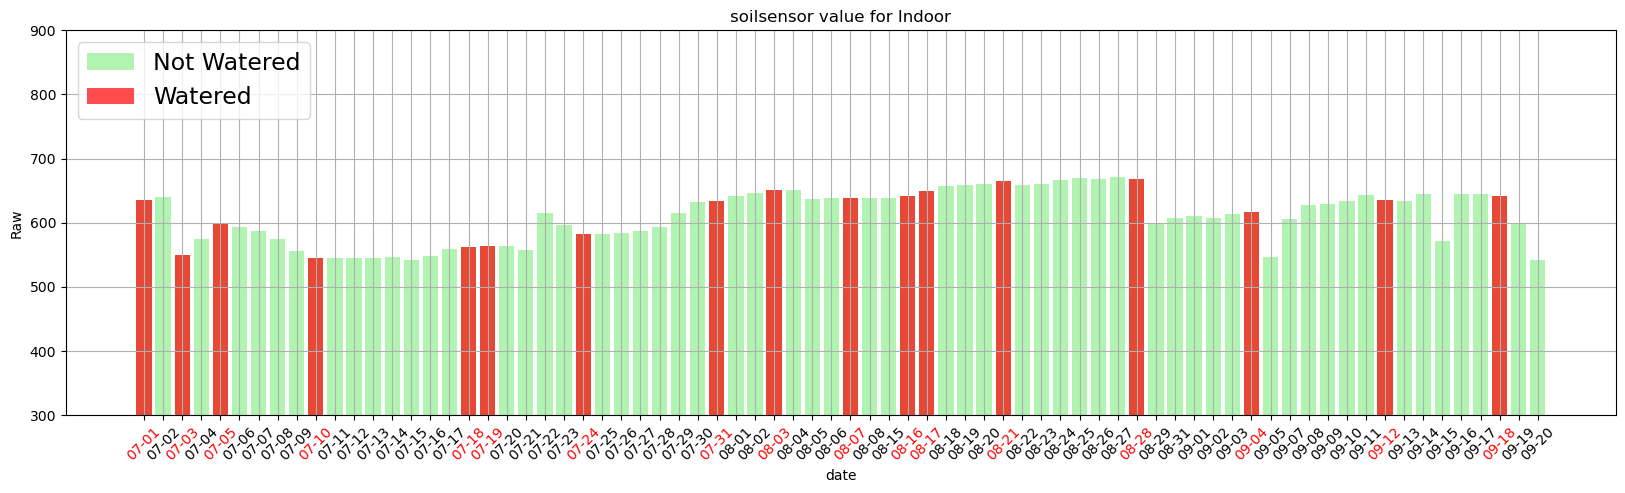

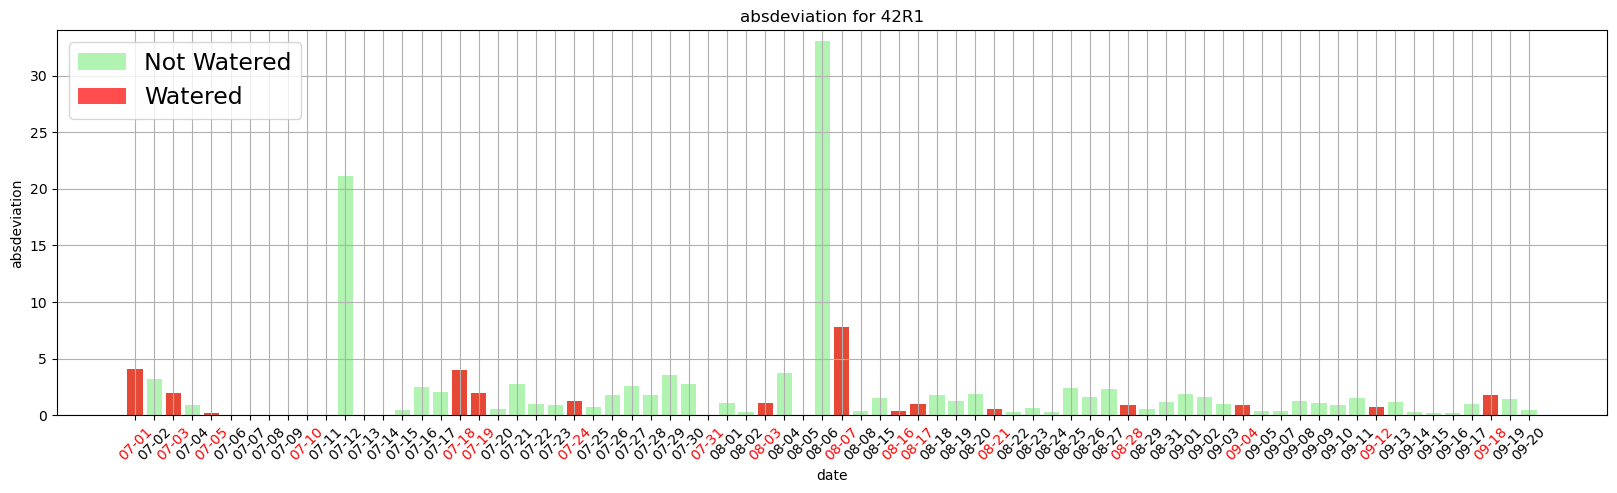

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def visualize_feeding_timeseries(base_file_name):
    df = pd.read_csv(f'./concatraw_12/v2_{base_file_name}.csv')
    df1 = pd.read_csv(f'./concatraw_12/{base_file_name}_abs.csv')

    x = df['date'].values
    y = df['soilsensor'].values
    X = df1['date'].values
    Y = df1['AbsDeviation'].values

    vertical_line_x_values = ['07-01','07-03','07-05','07-10','07-18','07-19','07-24','07-31','08-03','08-07','08-14','08-16','08-17','08-21','08-28','09-04','09-12','09-18']

    plt.figure(figsize=(20,5))
    # plt.plot(x, y, color='green', alpha=0.7)
    plt.bar(x, y, color='lightgreen', alpha=0.7, label='Not Watered')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in x:
            idx = np.where(x == val)[0]
            if not watered_bar_drawn:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7, label='Watered')
                watered_bar_drawn = True
            else:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7)

    plt.ylim(300, 900)
    plt.title('soilsensor value for Indoor')
    plt.xlabel('date')
    plt.ylabel('Raw')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

    plt.figure(figsize=(20,5))
    # plt.plot(X, Y, color='green', alpha=0.7)
    plt.bar(X, Y, color='lightgreen', alpha=0.7, label='Not Watered')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in X:
            idx = np.where(X == val)[0]
            if not watered_bar_drawn:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7, label='Watered')
                watered_bar_drawn = True
            else:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7)

    plt.ylim(0, 34)
    plt.title('absdeviation for 42R1')
    plt.xlabel('date')
    plt.ylabel('absdeviation')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

visualize_feeding_timeseries('42R1_79_forplot')


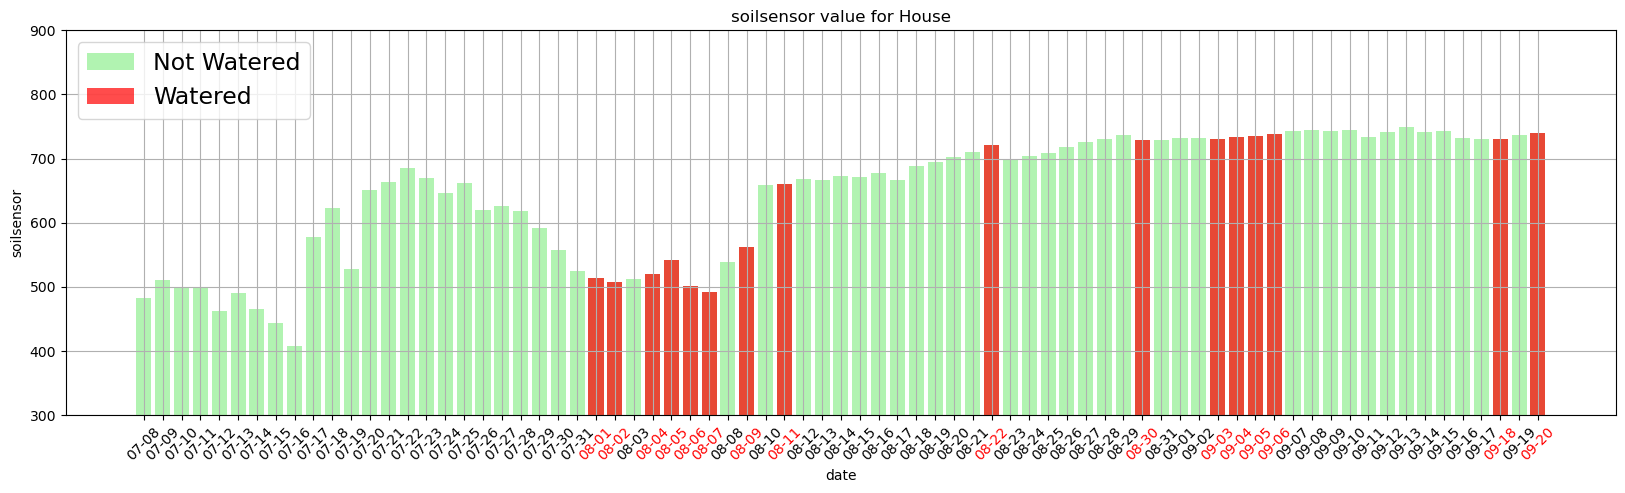

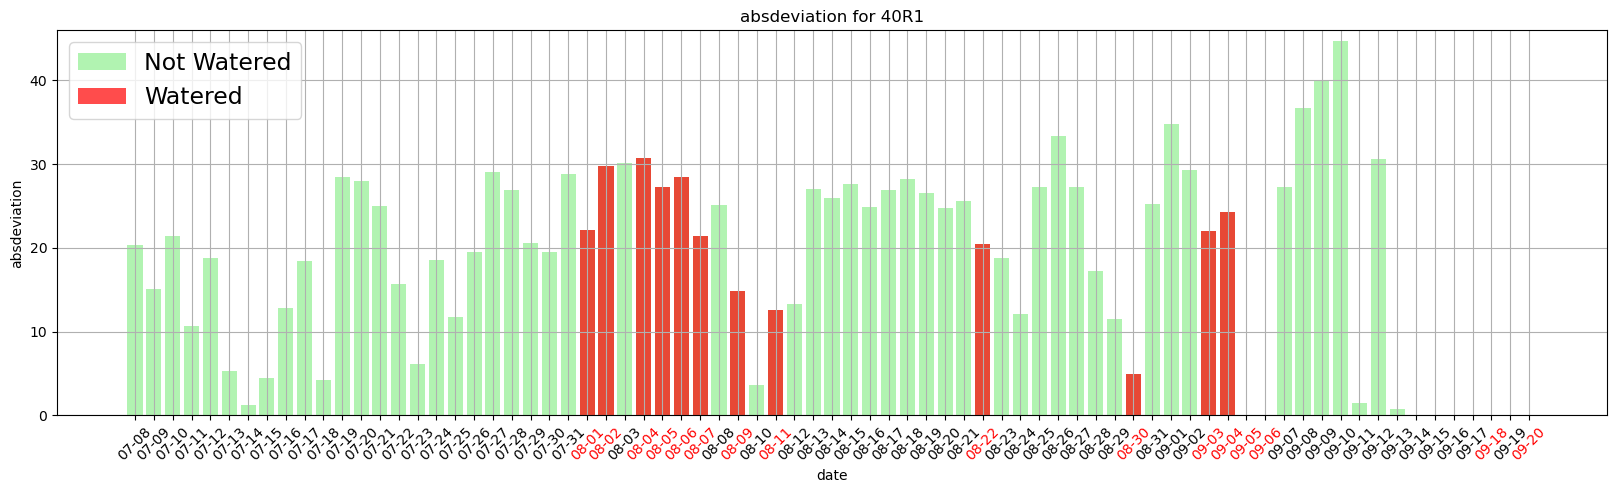

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def visualize_feeding_timeseries(base_file_name):
    df = pd.read_csv(f'./concatraw_12/v2_{base_file_name}.csv')
    df1 = pd.read_csv(f'./concatraw_12/{base_file_name}_abs.csv')

    x = df['date'].values
    y = df['soilsensor'].values
    X = df1['date'].values
    Y = df1['AbsDeviation'].values

    vertical_line_x_values = ['08-01','08-02','08-04','08-05','08-06','08-07','08-09','08-11','08-22','08-30','8-31','09-03','09-04','09-05','09-06','09-18','09-20']

    plt.figure(figsize=(20,5))
    plt.bar(x, y, color='lightgreen', alpha=0.7, label='Not Watered')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in x:
            idx = np.where(x == val)[0]
            if not watered_bar_drawn:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7, label='Watered')
                watered_bar_drawn = True
            else:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7)

    plt.ylim(300, 900)
    plt.title('soilsensor value for House')
    plt.xlabel('date')
    plt.ylabel('soilsensor')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

    plt.figure(figsize=(20,5))
    plt.bar(X, Y, color='lightgreen', alpha=0.7, label='Not Watered')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in X:
            idx = np.where(X == val)[0]
            if not watered_bar_drawn:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7, label='Watered')
                watered_bar_drawn = True
            else:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7)

    plt.ylim(0, 46)
    plt.title('absdeviation for 40R1')
    plt.xlabel('date')
    plt.ylabel('absdeviation')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

visualize_feeding_timeseries('40R1_79_forplot')


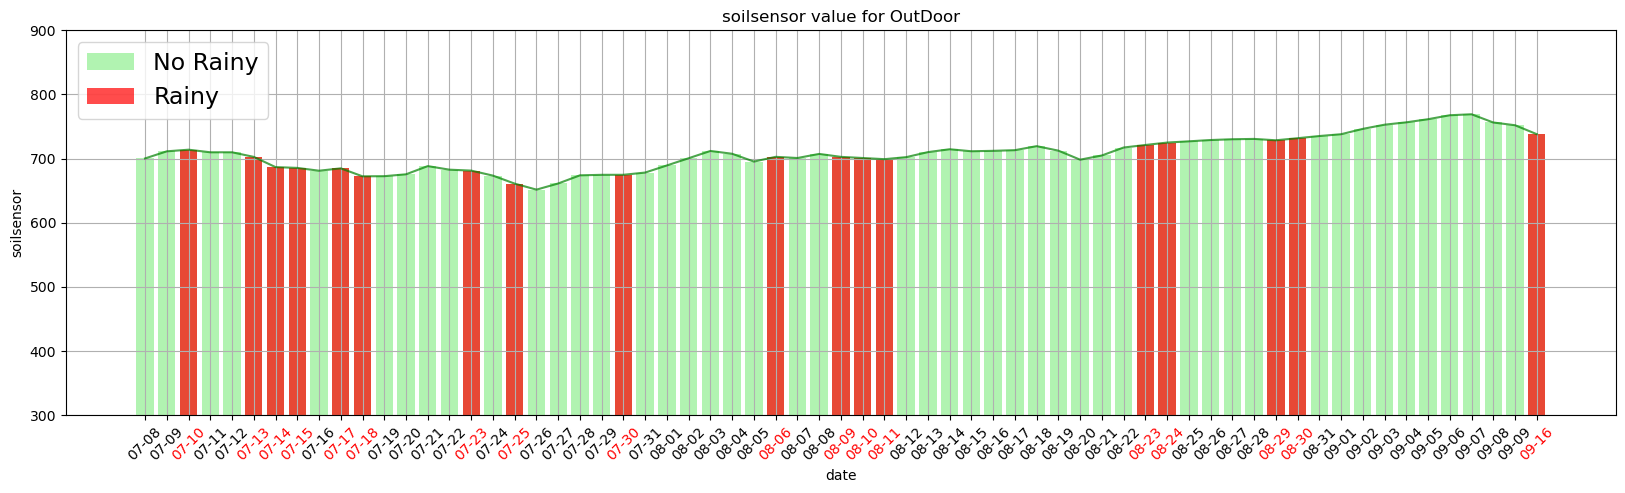

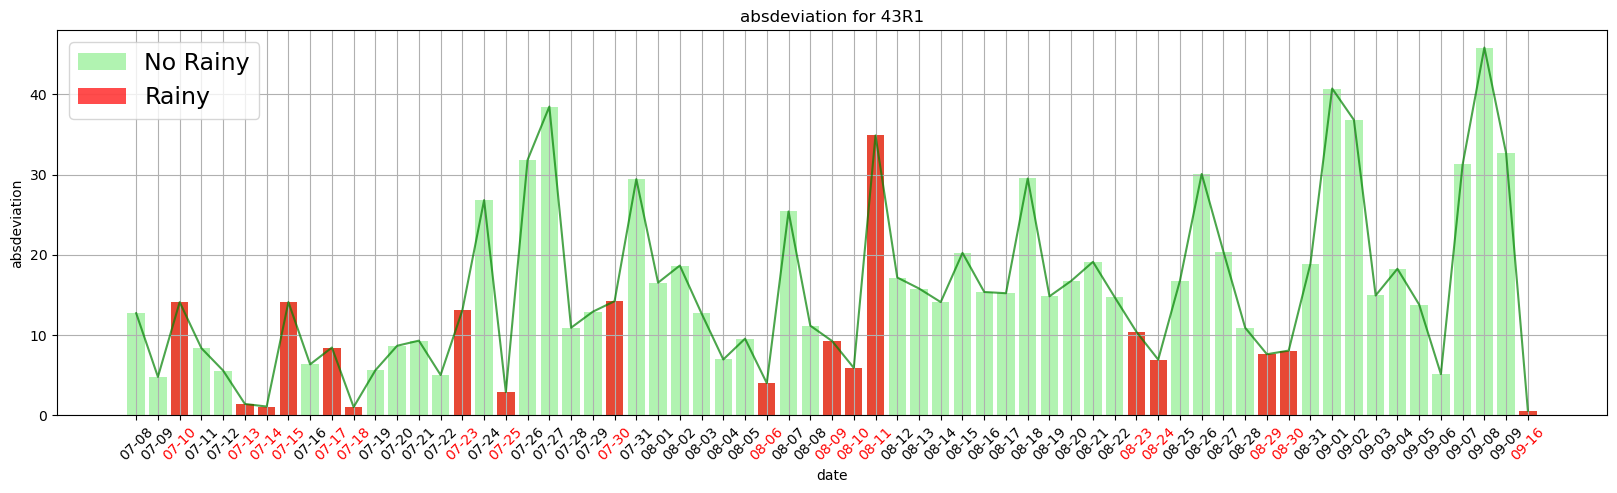

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def visualize_feeding_timeseries(base_file_name):
    df = pd.read_csv(f'./concatraw_12/v2_{base_file_name}.csv')
    df1 = pd.read_csv(f'./concatraw_12/{base_file_name}_abs.csv')

    x = df['date'].values
    y = df['soilsensor'].values
    X = df1['date'].values
    Y = df1['AbsDeviation'].values

    vertical_line_x_values = ['07-04','07-05','07-07','07-10','07-13','07-14','07-15','07-17','07-18','07-23','07-25','07-30','08-06','08-09','08-10','08-11','08-23','08-24','08-29','08-30','09-16','09-20']
    plt.figure(figsize=(20,5))
    plt.plot(x,y, color='green', alpha=0.7)
    plt.bar(x, y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in x:
            idx = np.where(x == val)[0]
            if not watered_bar_drawn:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7, label='Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7)

    plt.ylim(300, 900)
    plt.title('soilsensor value for OutDoor')
    plt.xlabel('date')
    plt.ylabel('soilsensor')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

    plt.figure(figsize=(20,5))
    plt.plot(X,Y, color='green', alpha=0.7)
    plt.bar(X, Y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in X:
            idx = np.where(X == val)[0]
            if not watered_bar_drawn:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7, label='Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7)

    plt.ylim(0, 48)
    plt.title('absdeviation for 43R1')
    plt.xlabel('date')
    plt.ylabel('absdeviation')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

visualize_feeding_timeseries('43R1_79_forplot')


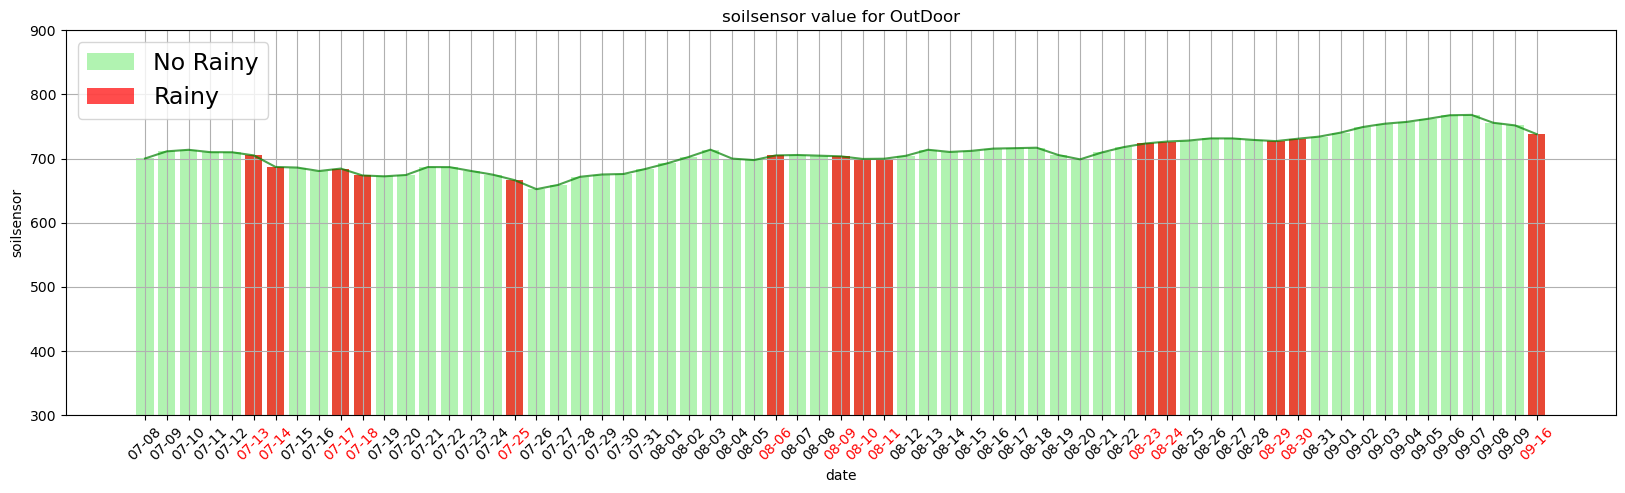

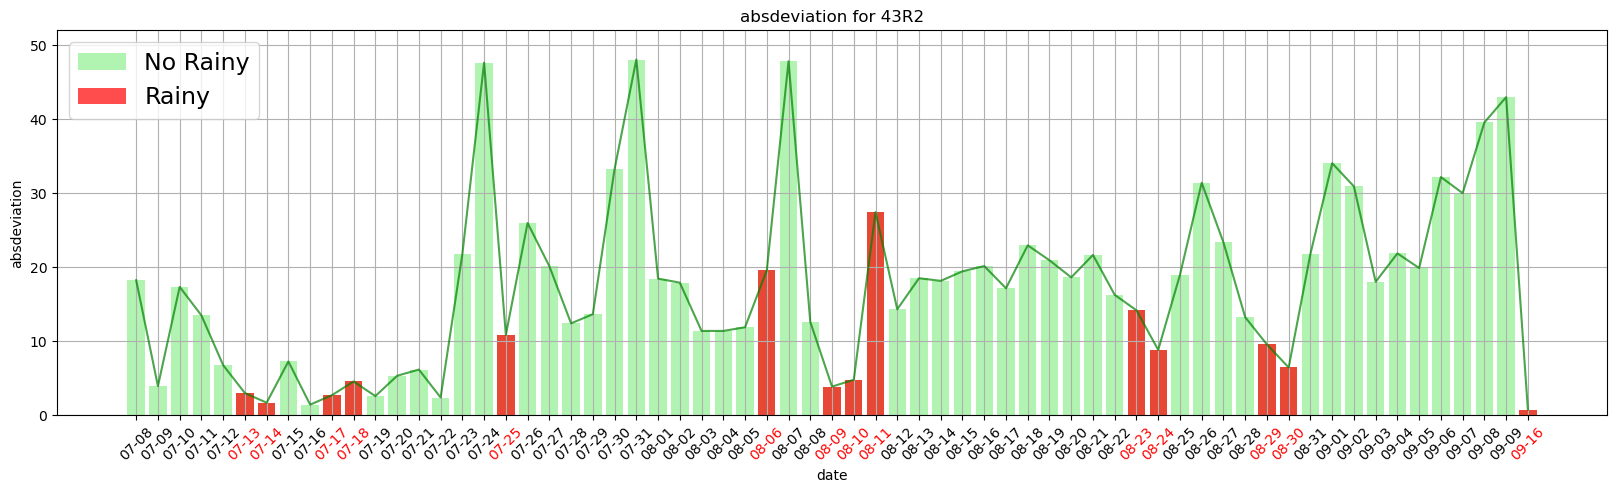

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def visualize_feeding_timeseries(base_file_name):
    df = pd.read_csv(f'./concatraw_12/v2_{base_file_name}.csv')
    df1 = pd.read_csv(f'./concatraw_12/{base_file_name}_abs.csv')

    x = df['date'].values
    y = df['soilsensor'].values
    X = df1['date'].values
    Y = df1['AbsDeviation'].values

    vertical_line_x_values = ['07-04','07-05','07-07','7-10','07-13','07-14','7-15','07-17','07-18','7-23','07-25','7-30','08-06','08-09','08-10','08-11','08-23','08-24','08-29','08-30','09-16','09-20']
    plt.figure(figsize=(20,5))
    plt.plot(x,y, color='green', alpha=0.7)
    plt.bar(x, y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in x:
            idx = np.where(x == val)[0]
            if not watered_bar_drawn:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7, label= 'Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7)

    plt.ylim(300, 900)
    plt.title('soilsensor value for OutDoor')
    plt.xlabel('date')
    plt.ylabel('soilsensor')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

    plt.figure(figsize=(20,5))
    plt.plot(X,Y, color='green', alpha=0.7)
    plt.bar(X, Y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in X:
            idx = np.where(X == val)[0]
            if not watered_bar_drawn:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7, label= 'Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7)

    plt.ylim(0, 52)
    plt.title('absdeviation for 43R2')
    plt.xlabel('date')
    plt.ylabel('absdeviation')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

visualize_feeding_timeseries('43R2_79_forplot')


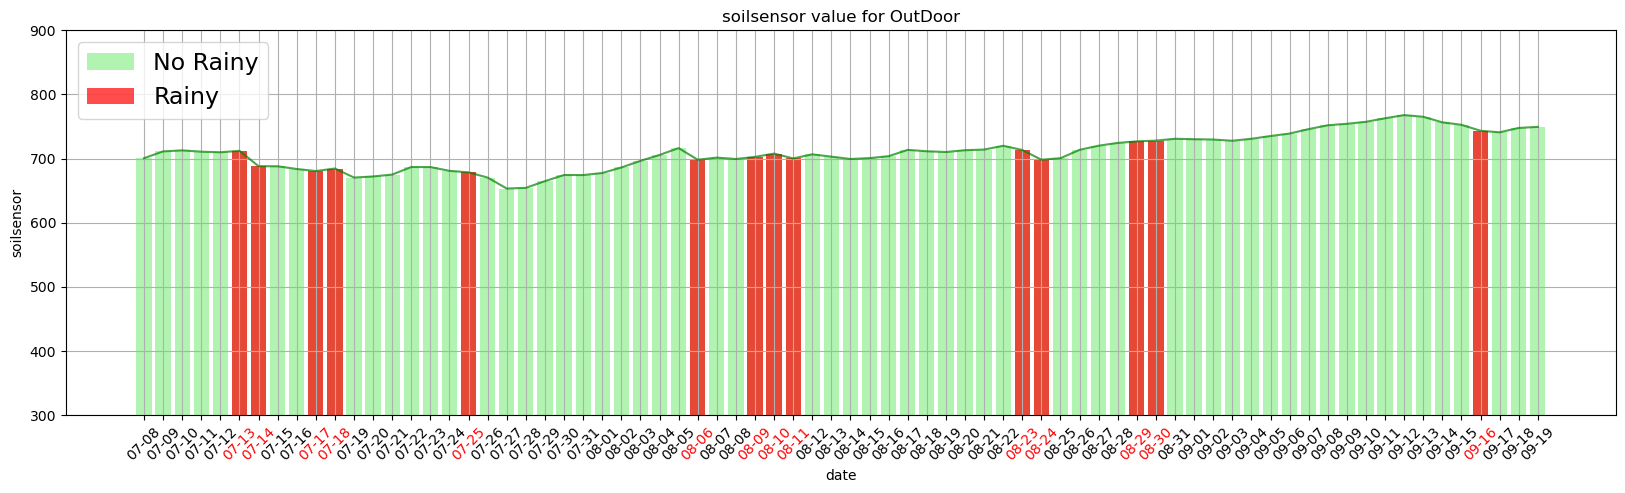

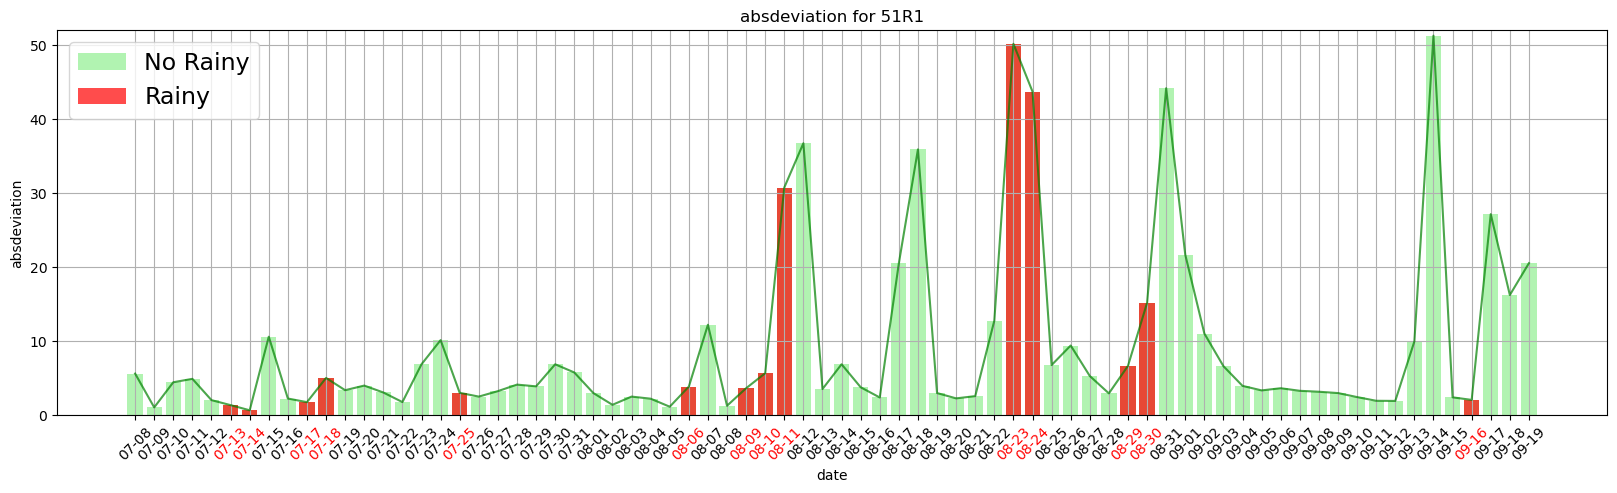

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def visualize_feeding_timeseries(base_file_name):
    df = pd.read_csv(f'./concatraw_12/v2_{base_file_name}.csv')
    df1 = pd.read_csv(f'./concatraw_12/{base_file_name}_abs.csv')

    x = df['date'].values
    y = df['soilsensor'].values
    X = df1['date'].values
    Y = df1['AbsDeviation'].values

    vertical_line_x_values = ['07-04','07-05','07-07','07-13','07-14','07-17','07-18','07-25','08-06','08-09','08-10','08-11','08-23','08-24','08-29','08-30','09-16','09-20']
  
    plt.figure(figsize=(20,5))
    plt.plot(x,y, color='green', alpha=0.7)
    plt.bar(x, y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in x:
            idx = np.where(x == val)[0]
            if not watered_bar_drawn:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7, label='Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7)

    plt.ylim(300, 900)
    plt.title('soilsensor value for OutDoor')
    plt.xlabel('date')
    plt.ylabel('soilsensor')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

    plt.figure(figsize=(20,5))
    plt.plot(X,Y, color='green', alpha=0.7)
    plt.bar(X, Y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in X:
            idx = np.where(X == val)[0]
            if not watered_bar_drawn:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7, label='Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7)

    plt.ylim(0, 52)
    plt.title('absdeviation for 51R1')
    plt.xlabel('date')
    plt.ylabel('absdeviation')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

visualize_feeding_timeseries('51R1_79_forplot')


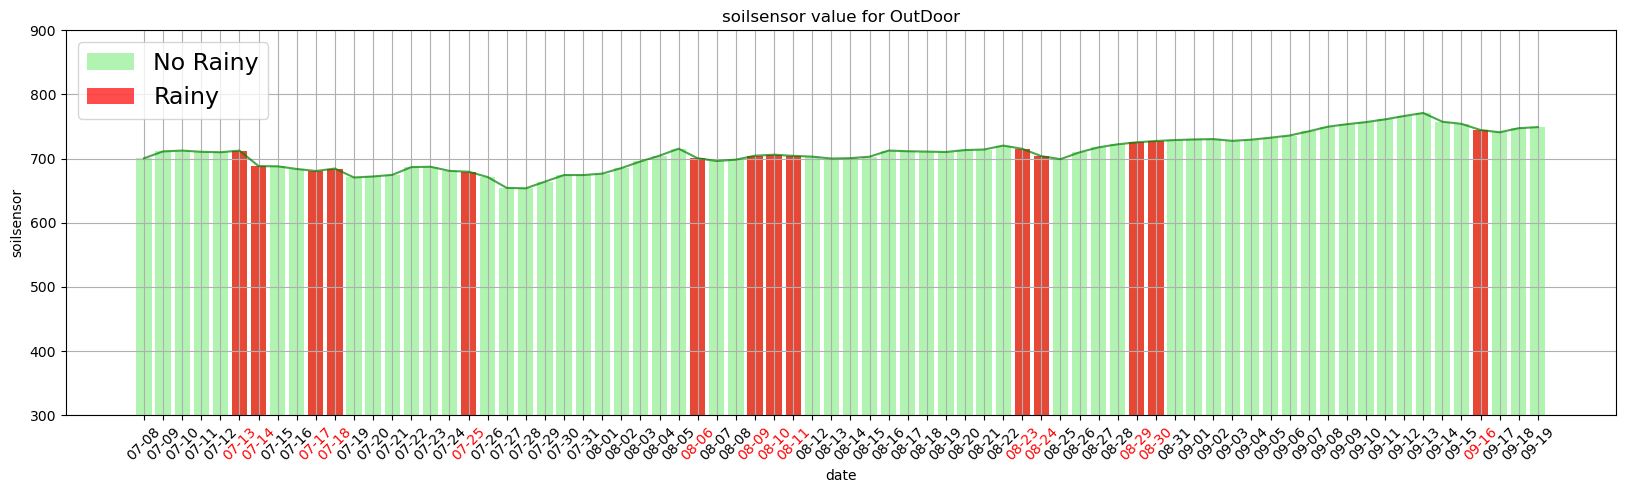

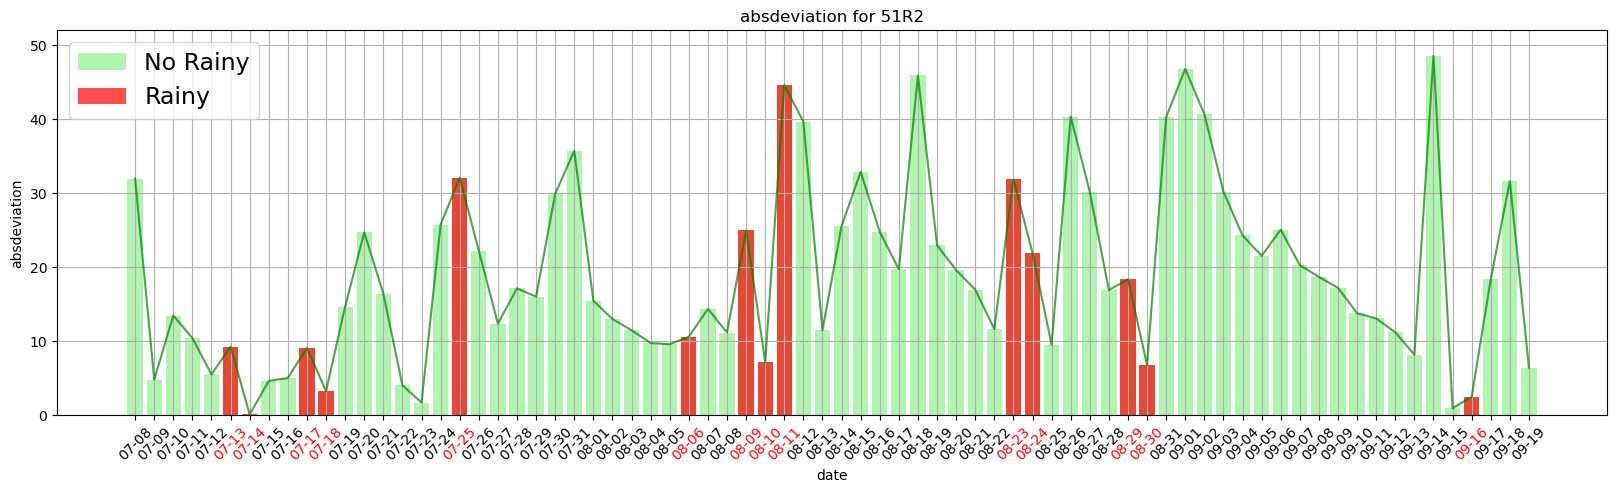

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def visualize_feeding_timeseries(base_file_name):
    df = pd.read_csv(f'./concatraw_12/v2_{base_file_name}.csv')
    df1 = pd.read_csv(f'./concatraw_12/{base_file_name}_abs.csv')

    x = df['date'].values
    y = df['soilsensor'].values
    X = df1['date'].values
    Y = df1['AbsDeviation'].values

    vertical_line_x_values = ['07-04','07-05','07-07','7-10','07-13','07-14','7-15','07-17','07-18','7-23','07-25','7-30','08-06','08-09','08-10','08-11','08-23','08-24','08-29','08-30','09-16','09-20']
    plt.figure(figsize=(20,5))
    plt.plot(x,y, color='green', alpha=0.7)
    plt.bar(x, y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in x:
            idx = np.where(x == val)[0]
            if not watered_bar_drawn:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7, label='Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(x[idx], y[idx], color='red', alpha=0.7)

    plt.ylim(300, 900)
    plt.title('soilsensor value for OutDoor')
    plt.xlabel('date')
    plt.ylabel('soilsensor')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

    plt.figure(figsize=(20,5))
    plt.plot(X,Y, color='green', alpha=0.7)
    plt.bar(X, Y, color='lightgreen', alpha=0.7, label='No Rainy')

    watered_bar_drawn = False
    for val in vertical_line_x_values:
        if val in X:
            idx = np.where(X == val)[0]
            if not watered_bar_drawn:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7, label='Rainy')
                watered_bar_drawn = True
            else:
                plt.bar(X[idx], Y[idx], color='red', alpha=0.7)

    plt.ylim(0, 52)
    plt.title('absdeviation for 51R2')
    plt.xlabel('date')
    plt.ylabel('absdeviation')
    
    # xticks 색상 변경
    ax = plt.gca()
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in vertical_line_x_values:
            tick_label.set_color('red')

    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left',fontsize=17)
    plt.show()

visualize_feeding_timeseries('51R2_79_forplot')


# 11월 14일부터

# 분류 예측

### 이전 v1 정확도를 표로

In [14]:
df1 = pd.read_csv('./concatraw_12/v1_KNN_accuracy_79.csv')
df2 = pd.read_csv('./concatraw_12/v1_RNN_accuracy_79.csv')
df3 = pd.read_csv('./concatraw_12/v1_CNN_accuracy_79.csv')
df4 = pd.read_csv('./concatraw_12/v1_DecisionTree_accuracy_79.csv')
df5 = pd.read_csv('./concatraw_12/v1_GBT_accuracy_79.csv')
df6 = pd.read_csv('./concatraw_12/v1_RandomForest_accuracy_79.csv')
con_df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

df = {'index':['KNN','RNN','CNN','DT','GBT','RF']}
df = pd.DataFrame(df)
# concatenated_df의 길이가 index_df의 길이의 배수라고 가정
con_df['index'] = pd.concat([df] * int(len(con_df)/len(df)), ignore_index=True)

# 'index1' 열을 인덱스로 설정
con_df.set_index('index', inplace=True)

con_df.to_csv('./concatraw_12/v1_79_accuracy.csv')

## 고사목 정상목 분리

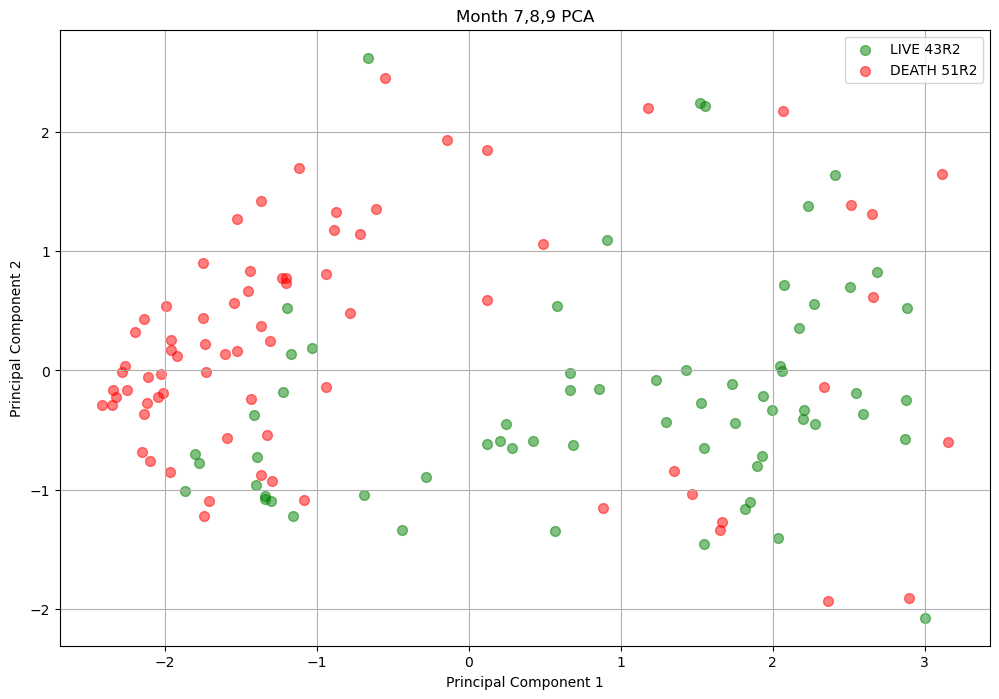

In [41]:
## PCA
# 데이터 읽기
df1 = pd.read_csv("./concatraw_12/perday_43R2_79_com.csv")
df2 = pd.read_csv("./concatraw_12/perday_51R2_79_com.csv")

df1 = df1.interpolate(method='linear')
df2 = df2.interpolate(method='linear')

# 두 데이터셋을 합치기
df = pd.concat([df1, df2])

# 필요한 변수만 선택
selected_features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']
df_selected = df[selected_features]

# 데이터 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# PCA 적용
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

# 결과 DataFrame 생성
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# 데이터셋 정보 추가
labels = [0]*len(df1) + [1]*len(df2)
principalDf['Dataset'] = labels

# 그래프 출력
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Month 7,8,9 PCA')

colors = ['g','r']
for label, color in zip(np.unique(labels), colors):
    indicesToKeep = principalDf['Dataset'] == label
    ax.scatter(principalDf.loc[indicesToKeep, 'Principal Component 1']
               , principalDf.loc[indicesToKeep, 'Principal Component 2']
               , c=color
               , alpha=0.5
               , s=50)

ax.legend(['LIVE 43R2','DEATH 51R2'])

ax.grid()
plt.show()

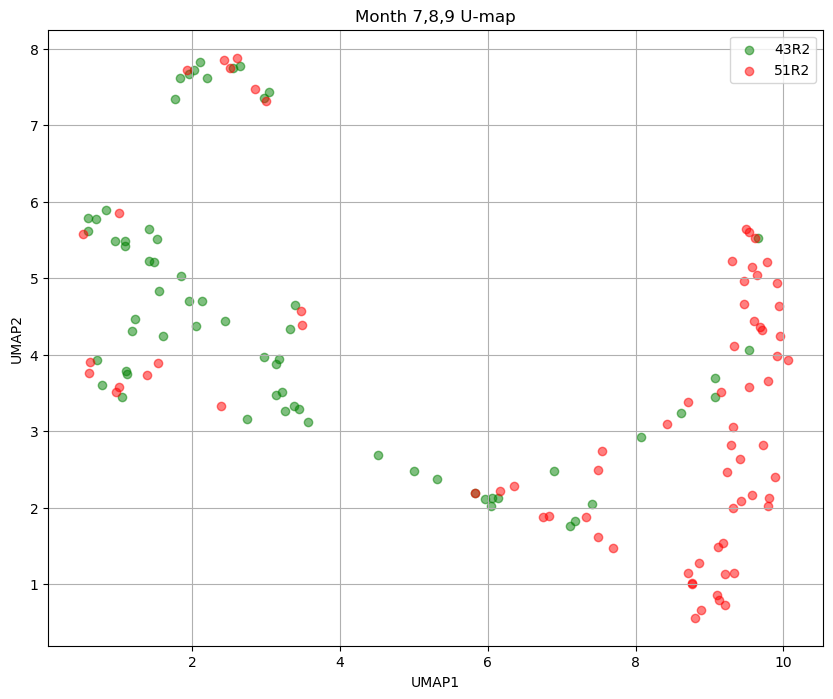

In [40]:
## UMAP

import umap
import matplotlib.pyplot as plt

df1 = pd.read_csv("./concatraw_12/perday_43R2_79_com.csv")
df2 = pd.read_csv("./concatraw_12/perday_51R2_79_com.csv")

df1 = df1.interpolate(method='linear')
df2 = df2.interpolate(method='linear')

df = pd.concat([df1, df2])
features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']  # 실제 특징으로 수정
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# UMAP 적용
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embedding = reducer.fit_transform(df_scaled)

labels = np.array(['43R2'] * len(df1) + ['51R2'] * len(df2))

# 결과를 DataFrame으로 저장
umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
umap_df['Label'] = labels

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = ['g','r']
for label,color in zip(np.unique(labels),colors):
    plt.scatter(umap_df['UMAP1'][umap_df['Label'] == label], umap_df['UMAP2'][umap_df['Label'] == label], c=color, alpha=0.5, label=label)

plt.grid()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('Month 7,8,9 U-map')
plt.legend()
plt.show()


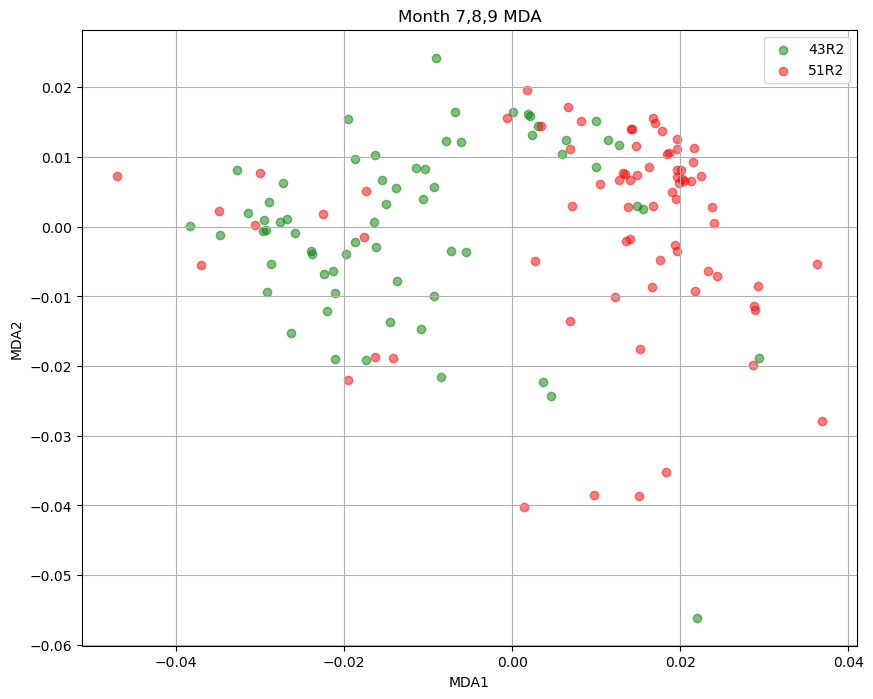

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 함수: MDA 계산
def compute_mda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_vectors = {}
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    
    for cls in classes:
        mean_vectors[cls] = np.mean(X[y == cls], axis=0)
        
    overall_mean = np.mean(X, axis=0)
    
    for cls in classes:
        scatter_within = np.zeros((n_features, n_features))
        for row in X[y == cls]:
            row, mean_vec = row.reshape(n_features, 1), mean_vectors[cls].reshape(n_features, 1)
            scatter_within += (row - mean_vec).dot((row - mean_vec).T)
        S_W += scatter_within
    
    for cls in classes:
        n = X[y == cls, :].shape[0]
        mean_vec = mean_vectors[cls].reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    sorted_indices = np.argsort(eig_vals)[::-1]
    W = eig_vecs[:, sorted_indices[:2]]
    
    X_mda = X.dot(W)
    
    return X_mda

# 데이터 읽기 및 처리
# (데이터 경로는 예시입니다; 실제 경로로 수정해야 합니다)
df1 = pd.read_csv("./concatraw_12/perday_43R2_79_com.csv")
df2 = pd.read_csv("./concatraw_12/perday_51R2_79_com.csv")

df1 = df1.interpolate(method='linear')
df2 = df2.interpolate(method='linear')


df = pd.concat([df1, df2])
features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']  # 실제 특징으로 수정
df_selected = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 레이블 설정
labels = np.array(['43R2'] * len(df1) + ['51R2'] * len(df2))

# MDA 적용
mda_result = compute_mda(df_scaled, labels)
mda_df = pd.DataFrame(data=mda_result, columns=['MDA1', 'MDA2'])
mda_df['Label'] = labels

# 시각화
colors =['g','r']
plt.figure(figsize=(10, 8))
for label,color in zip(np.unique(labels), colors):
    plt.scatter(mda_df['MDA1'][mda_df['Label'] == label], mda_df['MDA2'][mda_df['Label'] == label], c=color,alpha=0.5, label=label)

plt.grid()
plt.xlabel('MDA1')
plt.ylabel('MDA2')
plt.title('Month 7,8,9 MDA')
plt.legend()
plt.show()


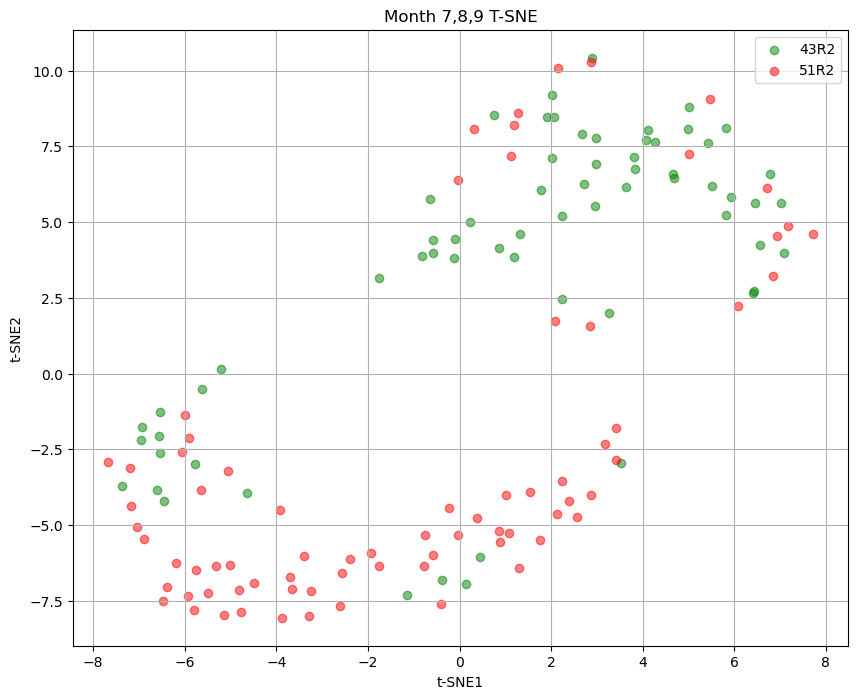

In [39]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 읽기와 전처리
df3 = pd.read_csv("./concatraw_12/perday_43R2_79_com.csv")
df4 = pd.read_csv("./concatraw_12/perday_51R2_79_com.csv")

df1 = df1.interpolate(method='linear')
df2 = df2.interpolate(method='linear')

df = pd.concat([df1, df2])
features = ['Raw','AbsDeviation', 'Raw-MedianFiltered', 'CenterCurve']  # 실제 특징으로 수정하세요.
df_selected = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# labels 리스트 생성
labels = np.array(['43R2'] * len(df1) + ['51R2'] * len(df2))

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_scaled)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['Label'] = labels  # 이제 에러가 발생하지 않아야 합니다.

# 산점도로 결과를 표시
plt.figure(figsize=(10, 8))
colors = ['g','r']
for label,color in zip(np.unique(labels),colors):
    plt.scatter(tsne_df['t-SNE1'][tsne_df['Label'] == label], tsne_df['t-SNE2'][tsne_df['Label'] == label], c=color, alpha=0.5, label=label)

plt.grid()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('Month 7,8,9 T-SNE')
plt.legend()
plt.show()


## 못 센서 분류 예측

### GBT

Accuracy: 93.86%


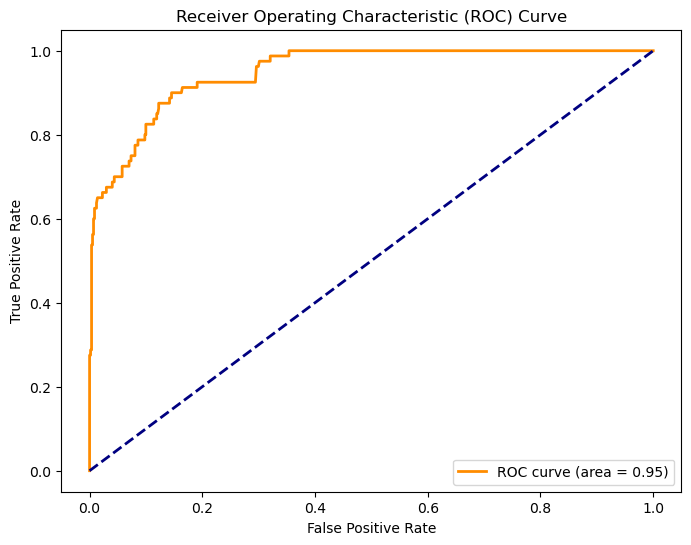

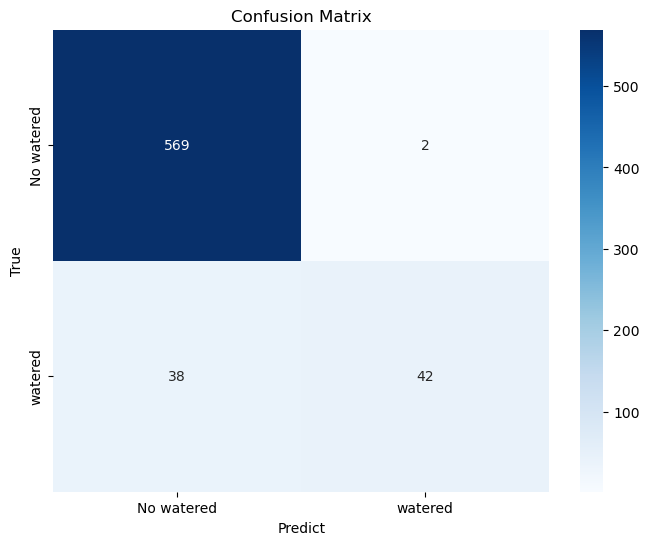

Confusion Matrix Accuracy: 93.86%


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import seaborn as sns

# 데이터 읽기
data = pd.read_csv('./concatraw_12/v1_51R2_79_com.csv')
data = data.drop(columns=['date'])

# 특성과 레이블 분리
X = data.drop('watered', axis=1)
y = data['watered']

# 데이터를 학습 및 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GBT 모델 학습
gbt = GradientBoostingClassifier()
gbt.fit(X_train, y_train)

# 테스트 세트에서 예측
y_pred_prob = gbt.predict_proba(X_test)[:, 1]  # Positive 클래스에 대한 예측 확률만 추출
y_pred = gbt.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No watered', 'watered'],
            yticklabels=['No watered', 'watered'])
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predict')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Confusion Matrix의 정확도 계산
confusion_matrix_accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f'Confusion Matrix Accuracy: {confusion_matrix_accuracy * 100:.2f}%')


### DT

Accuracy: 92.93%


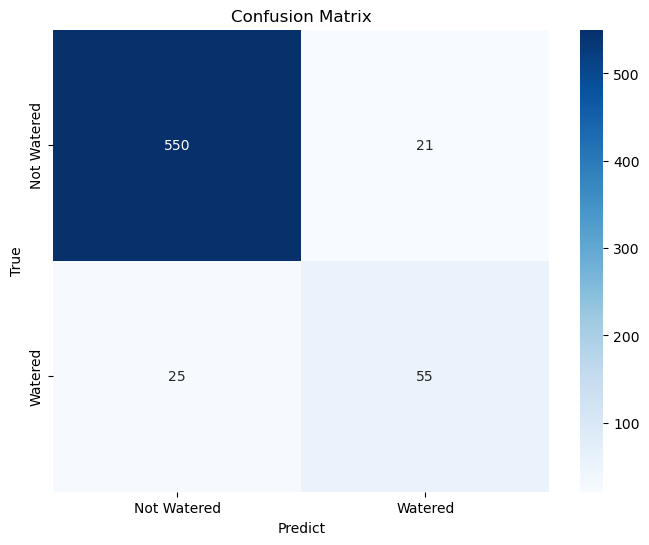

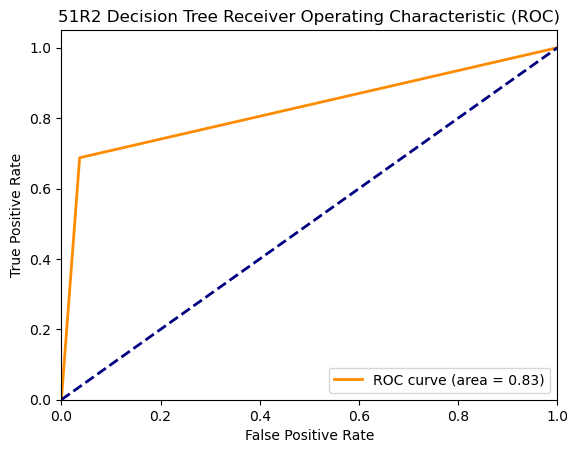

In [55]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 데이터 프레임 선언
data = pd.read_csv('./concatraw_12/v1_51R2_79_com.csv')

# 'date'열 제거
data = data.drop(columns=['date'])

# 혹시 모를 결측치를 '선형 보간' 방식으로 채움
data_imputed = data.interpolate(method='linear')

# train, test 데이터 분할
# watered열을 종속변수로
X = data_imputed.drop('watered', axis=1)
y = data_imputed['watered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTree 모델 학습
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = clf.predict(X_test)

# 예측 결과, 실제 결과 비교
accuracy = accuracy_score(y_test, y_pred)

# 그 정확도를 출력
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Watered', 'Watered'],
            yticklabels=['Not Watered', 'Watered'])
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predict')
plt.show()

# Decision Tree 시각화
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Not Watered', 'Watered'],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.view(filename="51R2_decision_tree_graph", directory="./", cleanup=True)

# ROC curve를 위한 필요한 값들 계산
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

# AUC (Area Under Curve) 계산
roc_auc = auc(fpr, tpr)

# ROC curve 그리기
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  # 대각선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('51R2 Decision Tree Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### RF

Accuracy: 95.70%


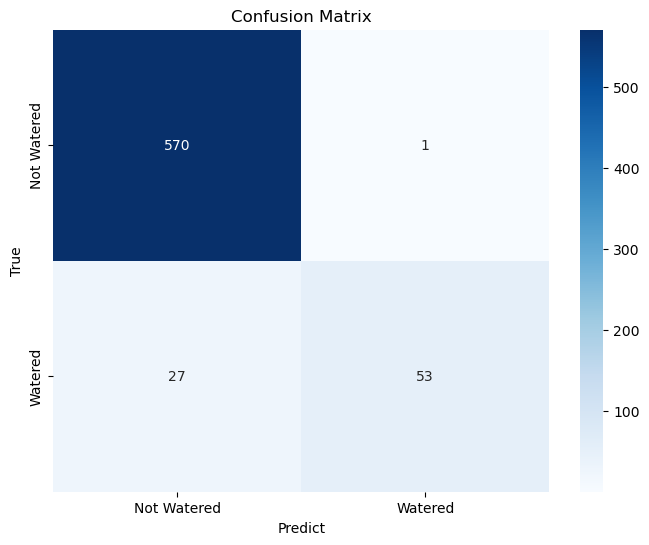

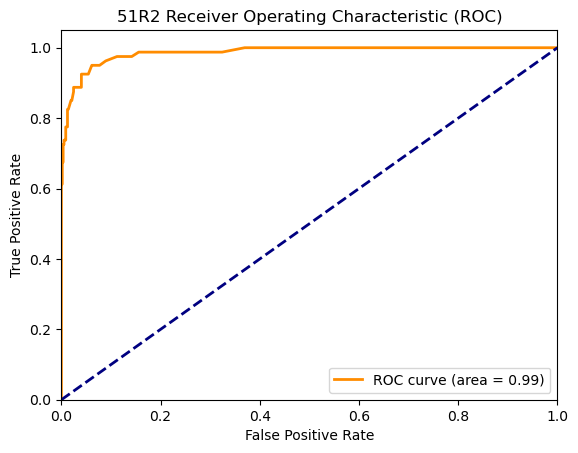

In [56]:
import pandas as pd
import mglearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 데이터 프레임 선언
data = pd.read_csv('./concatraw_12/v1_51R2_79_com.csv')

# 'date'열 제거
data = data.drop(columns=['date'])

# 혹시 모를 결측치를 '선형 보간' 방식으로 채움
data_imputed = data.interpolate(method='linear')

# train, test 데이터 분할
# 'watered'열을 종속변수로 선언
X = data_imputed.drop('watered', axis=1)
y = data_imputed['watered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류 모델 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 모델 기반 테스트 데이터셋 예측
y_pred = clf.predict(X_test)

# 실제 결과와 예측 결과를 비교하여 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# 정확도 출력
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Watered', 'Watered'],
            yticklabels=['Not Watered', 'Watered'])
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predict')
plt.show()

# ROC curve를 위한 필요한 값들 계산
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

# AUC (Area Under Curve) 계산
roc_auc = auc(fpr, tpr)

# ROC curve 그리기
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  # 대각선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('51R2 Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### KNN

Accuracy: 93.39%


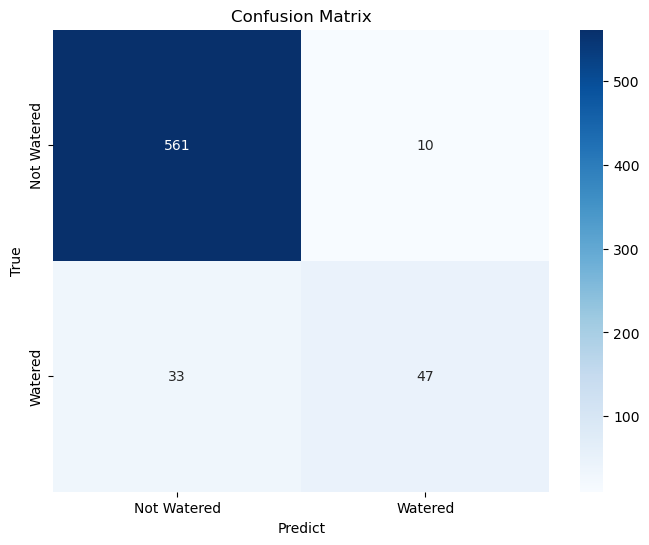

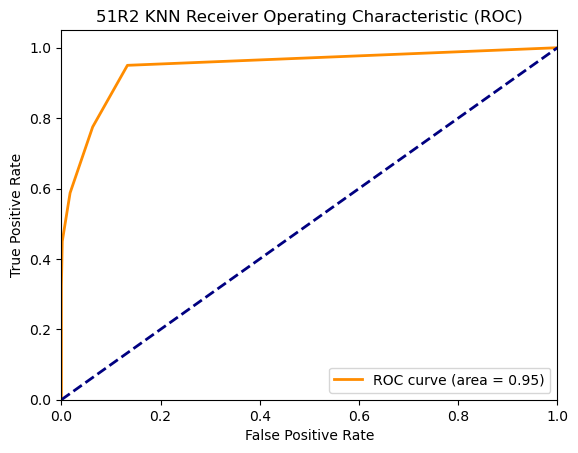

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

# 데이터 프레임 선언
data = pd.read_csv('./concatraw_12/v1_51R2_79_com.csv')

# 'date'열 제거
data = data.drop(columns=['date'])

# 혹시 모를 결측치를 '선형 보간' 방식으로 채움
data_imputed = data.interpolate(method='linear')

# train, test 데이터 분할
# 'watered'열을 종속변수로 선언
X = data_imputed.drop('watered', axis=1)
y = data_imputed['watered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 분류 모델 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 모델 기반 테스트 데이터셋 예측
y_pred = knn.predict(X_test)

# 실제 결과와 예측 결과를 비교하여 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

# 정확도 출력
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Watered', 'Watered'],
            yticklabels=['Not Watered', 'Watered'])
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predict')
plt.show()

# ROC curve를 위한 필요한 값들 계산
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])

# AUC (Area Under Curve) 계산
roc_auc = auc(fpr, tpr)

# ROC curve 그리기
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  # 대각선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('51R2 KNN Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### RNN

Epoch 1/10
74/74 [==============================] - 0s 2ms/step - loss: 5.2995 - accuracy: 0.8350 - val_loss: 1.4634 - val_accuracy: 0.6858
Epoch 2/10
74/74 [==============================] - 0s 807us/step - loss: 0.7779 - accuracy: 0.8406 - val_loss: 0.6478 - val_accuracy: 0.6322
Epoch 3/10
74/74 [==============================] - 0s 782us/step - loss: 0.4858 - accuracy: 0.8603 - val_loss: 0.6179 - val_accuracy: 0.8851
Epoch 4/10
74/74 [==============================] - 0s 772us/step - loss: 0.5748 - accuracy: 0.8423 - val_loss: 0.3448 - val_accuracy: 0.8621
Epoch 5/10
74/74 [==============================] - 0s 792us/step - loss: 0.4583 - accuracy: 0.8637 - val_loss: 0.4616 - val_accuracy: 0.8812
Epoch 6/10
74/74 [==============================] - 0s 752us/step - loss: 0.4273 - accuracy: 0.8662 - val_loss: 0.3574 - val_accuracy: 0.8851
Epoch 7/10
74/74 [==============================] - 0s 774us/step - loss: 0.4351 - accuracy: 0.8701 - val_loss: 0.5882 - val_accuracy: 0.8851
Epoch 8/

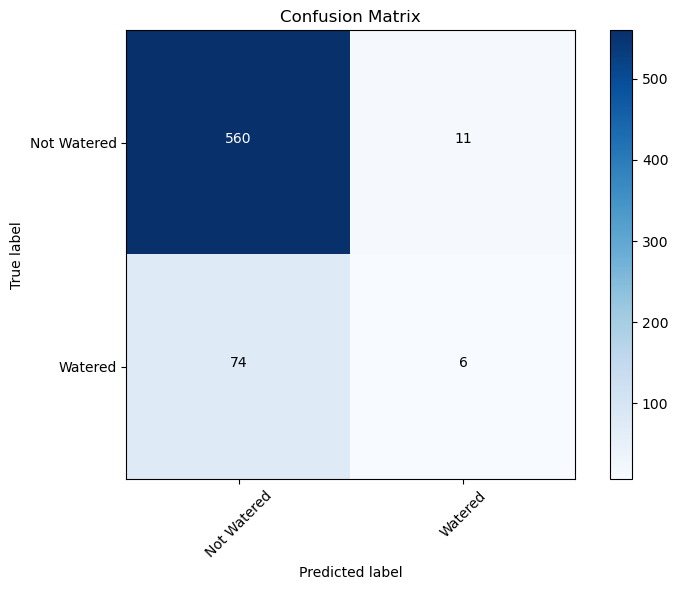

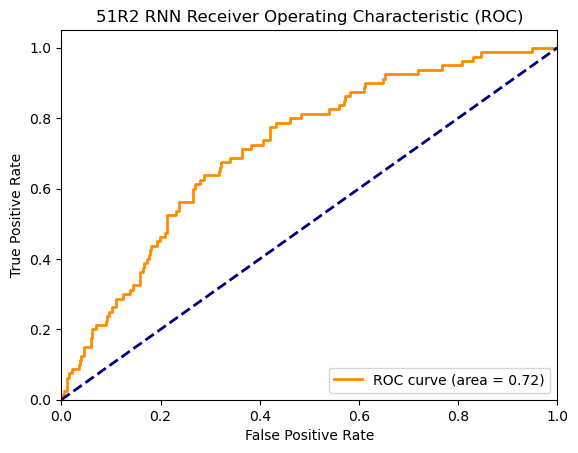

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import itertools

# 데이터 읽기
data = pd.read_csv('./concatraw_12/v1_51R2_79_com.csv')
data = data.drop(columns=['date'])

# 특성과 레이블 분리
X = data.drop('watered', axis=1).values
y = data['watered'].values

# RNN 입력 데이터 형태에 맞추기 위한 reshape
X = X.reshape(X.shape[0], 1, X.shape[1])

# 데이터를 학습 및 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RNN 모델 정의
model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix 계산
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Confusion Matrix 그리기
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Not Watered', 'Watered']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# ROC 커브 그리기
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('51R2 RNN Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### CNN

Epoch 1/10
19/19 [==============================] - 0s 4ms/step - loss: 3.1594 - accuracy: 0.7974 - val_loss: 0.8482 - val_accuracy: 0.8659
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 0.8122 - accuracy: 0.8342 - val_loss: 0.6819 - val_accuracy: 0.8851
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6247 - accuracy: 0.8607 - val_loss: 0.6147 - val_accuracy: 0.7701
Epoch 4/10
19/19 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.8628 - val_loss: 0.4698 - val_accuracy: 0.8429
Epoch 5/10
19/19 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.8714 - val_loss: 0.4586 - val_accuracy: 0.8851
Epoch 6/10
19/19 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8808 - val_loss: 0.4084 - val_accuracy: 0.8429
Epoch 7/10
19/19 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8868 - val_loss: 0.3915 - val_accuracy: 0.8046
Epoch 8/10
19/19 [==

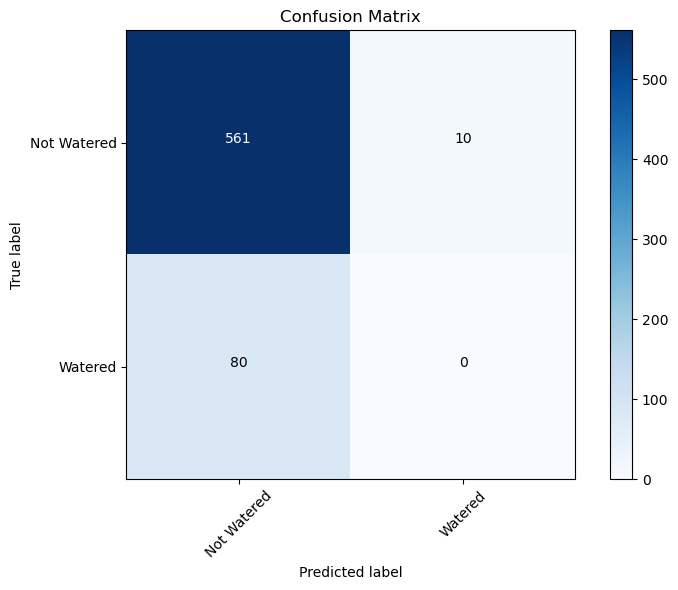

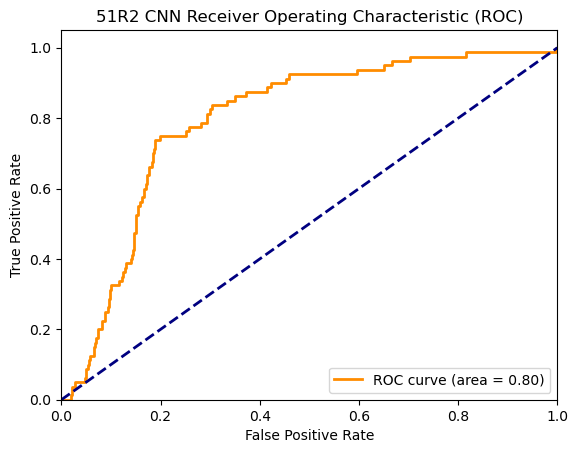

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# 데이터 읽기
data = pd.read_csv('./concatraw_12/v1_51R2_79_com.csv')
data = data.drop(columns=['date'])

# 특성과 레이블 분리
X = data.drop('watered', axis=1).values
y = data['watered'].values

# CNN 입력 데이터 형태에 맞추기 위한 reshape (batch_size, length, channels)
X = X.reshape(X.shape[0], X.shape[1], 1)

# 데이터를 학습 및 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN 모델 정의
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix 계산
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Confusion Matrix 그리기
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Not Watered', 'Watered']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# ROC 커브 그리기
y_pred_probs = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('51R2 CNN Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## 토양센서 분류 예측

### GBT

Accuracy: 91.71%


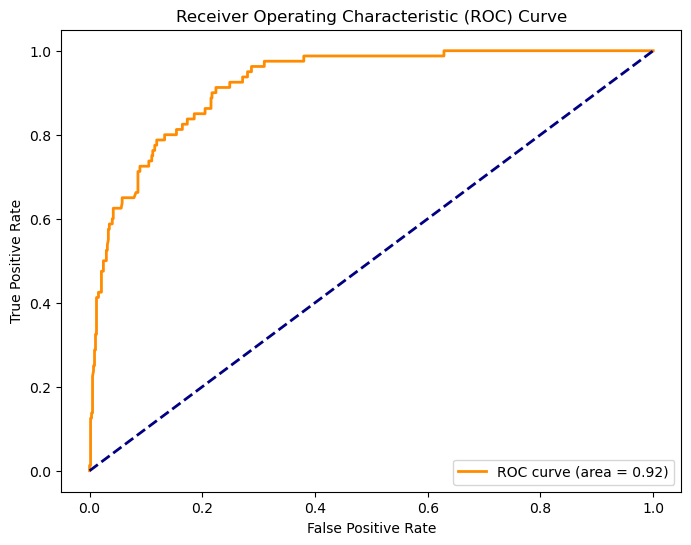

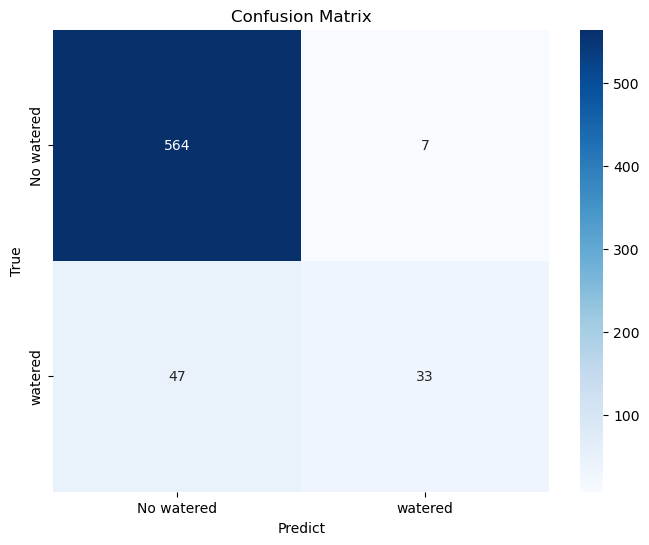

Confusion Matrix Accuracy: 91.71%


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import seaborn as sns

# 데이터 읽기
data = pd.read_csv('./concatraw_12/v1_51R2_79_com.csv')
selected = ['date','soilsensor','moisture','temperature','AbsDeviation-MedianFiltered','watered']
data = data[selected]
data = data.drop(columns=['date'])

# 특성과 레이블 분리
X = data.drop('watered', axis=1)
y = data['watered']

# 데이터를 학습 및 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GBT 모델 학습
gbt = GradientBoostingClassifier()
gbt.fit(X_train, y_train)

# 테스트 세트에서 예측
y_pred_prob = gbt.predict_proba(X_test)[:, 1]  # Positive 클래스에 대한 예측 확률만 추출
y_pred = gbt.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No watered', 'watered'],
            yticklabels=['No watered', 'watered'])
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predict')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Confusion Matrix의 정확도 계산
confusion_matrix_accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f'Confusion Matrix Accuracy: {confusion_matrix_accuracy * 100:.2f}%')


# 시계열 데이터 (비온날, 안온날 평균 계산 후 퍼센티지 차이로)

In [155]:
def timeseries_percentage_raining(base_file_name):
    df1 = pd.read_csv(f'./concatraw_12/{base_file_name}.csv')
    print(f'{base_file_name}')
    mean_norain_1 = df1.iloc[1,7].sum()
    mean_rain_1 = df1.iloc[2,7].sum()
    # mean_rain_1 = mean_rain_1/3
    per_0 = mean_rain_1/mean_norain_1
    print(per_0)

    mean_norain_1 = df1.iloc[4,7].sum()
    mean_rain_1 = df1.iloc[6:9,7].sum()
    mean_rain_1 = mean_rain_1/3
    per_1 = mean_rain_1/mean_norain_1
    print(per_1)

    mean_norain_1 = df1.iloc[8,7].sum()
    mean_rain_1 = df1.iloc[9:11,7].sum()
    mean_rain_1 = mean_rain_1/2
    per_2 = mean_rain_1/mean_norain_1
    print(per_2)

    mean_norain_1 = df1.iloc[14,7].sum()
    mean_rain_1 = df1.iloc[15,7].sum()
    # mean_rain_1 = mean_rain_1/2
    per_3 = mean_rain_1/mean_norain_1
    print(per_3)

    mean_norain_1 = df1.iloc[16,7].sum()
    mean_rain_1 = df1.iloc[17,7].sum()
    # mean_rain_1 = mean_rain_1/2
    per_4 = mean_rain_1/mean_norain_1
    print(per_4)

    mean_norain_1 = df1.iloc[21,7].sum()
    mean_rain_1 = df1.iloc[22,7].sum()
    # mean_rain_1 = mean_rain_1/2
    per_5 = mean_rain_1/mean_norain_1
    print(per_5)

    mean_norain_1 = df1.iloc[28,7].sum()
    mean_rain_1 = df1.iloc[29,7].sum()
    # mean_rain_1 = mean_rain_1/2
    per_6 = mean_rain_1/mean_norain_1
    print(per_6)

    mean_norain_1 = df1.iloc[31,7].sum()
    mean_rain_1 = df1.iloc[32:35,7].sum()
    mean_rain_1 = mean_rain_1/3
    per_7 = mean_rain_1/mean_norain_1
    print(per_7)

    mean_norain_1 = df1.iloc[45,7].sum()
    mean_rain_1 = df1.iloc[46:48,7].sum()
    mean_rain_1 = mean_rain_1/2
    per_8 = mean_rain_1/mean_norain_1
    print(per_8,'\n')

timeseries_percentage_raining('perday_43R1_79_com')
timeseries_percentage_raining('perday_43R2_79_com')
timeseries_percentage_raining('perday_51R1_79_com')
timeseries_percentage_raining('perday_51R2_79_com')

perday_43R1_79_com
1.004625171067971
0.9482839614983787
0.9958137966701242
0.9622890677626476
1.0204614420201819
0.9946543170620797
0.9619598924953484
0.8460014197969074
0.8909296370518817 

perday_43R2_79_com
0.9940215407082876
0.910917662476805
0.9865705435752402
0.9535542429014873
1.0323082700953266
0.9428877088560813
0.9563467709759643
0.8998875920512839
0.9245699991501594 

perday_51R1_79_com
1.0012216845058877
0.9728837574799581
0.9888846869276985
0.988816260939434
1.0105771900084461
0.993068940275554
0.9988672041768651
0.8574141456744647
0.8236000779237646 

perday_51R2_79_com
1.0037238175536047
0.9281771417248141
0.9850834516799274
0.9693361943656124
1.0173614755320854
0.9785559571885867
0.9970274797961519
0.7069732632139396
0.6764561216230931 

